In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df= pd.read_csv('df_US1.csv')

In [45]:
df.columns

Index(['Unnamed: 0', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Year',
       'Month.Abbr', 'Day.Name.Abbr', 'Weekend', 'Make_class', 'Airport_Class',
       'Fatal_binary', 'Serious_binary', 'Minor_binary', 'Uninjured_binary',
       'Target_binary', 'Target_column', 'Total_passangers', 'Airplane_size',
       'survival_rate', 'Aircraft_size'],
      dtype='object')

In [46]:
df=df.drop(columns=['Unnamed: 0', 'Investigation.Type', 'Event.Date','Country','Injury.Severity','Model','Air.carrier',
                    'Report.Status','Weekend', 'Make_class'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30772 entries, 0 to 30771
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                30772 non-null  object 
 1   Latitude                30767 non-null  object 
 2   Longitude               30772 non-null  object 
 3   Airport.Code            30772 non-null  object 
 4   Airport.Name            30772 non-null  object 
 5   Aircraft.damage         30772 non-null  object 
 6   Aircraft.Category       30772 non-null  object 
 7   Make                    30772 non-null  object 
 8   Amateur.Built           30772 non-null  object 
 9   Number.of.Engines       30772 non-null  object 
 10  Engine.Type             30772 non-null  object 
 11  Purpose.of.flight       30772 non-null  object 
 12  Total.Fatal.Injuries    30772 non-null  int64  
 13  Total.Serious.Injuries  30772 non-null  int64  
 14  Total.Minor.Injuries    30772 non-null

In [57]:
df.isna().sum()

Location                  0
Latitude                  5
Longitude                 0
Airport.Code              0
Airport.Name              0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Year                      0
Month.Abbr                0
Day.Name.Abbr             0
Airport_Class             0
Fatal_binary              0
Serious_binary            0
Minor_binary              0
Uninjured_binary          0
Target_binary             0
Target_column             0
Total_passangers          0
Airplane_size             0
survival_rate             0
Aircraft_size             0
Make_class                0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [48]:
make_counts = df['Make'].value_counts()
make_counts.head(15)

Cessna          8518
Piper           4876
Beech           1816
Bell            1136
Robinson         880
Boeing           533
Mooney           524
Air Tractor      491
Grumman          391
Cirrus           378
Hughes           270
Maule            259
Aeronca          241
Eurocopter       224
De Havilland     206
Name: Make, dtype: int64

In [49]:
top15 = df['Make'].value_counts().nlargest(15).index

In [50]:
df['Make_class'] = df['Make'].where(df['Make'].isin(top15), 'Other')

In [51]:
df['Make_class'].value_counts()

Other           10029
Cessna           8518
Piper            4876
Beech            1816
Bell             1136
Robinson          880
Boeing            533
Mooney            524
Air Tractor       491
Grumman           391
Cirrus            378
Hughes            270
Maule             259
Aeronca           241
Eurocopter        224
De Havilland      206
Name: Make_class, dtype: int64

In [62]:
df['Latitude'].values

array(['26.1525', '60.866667', '42.852222', ..., '373829N', '282825N',
       '341525N'], dtype=object)

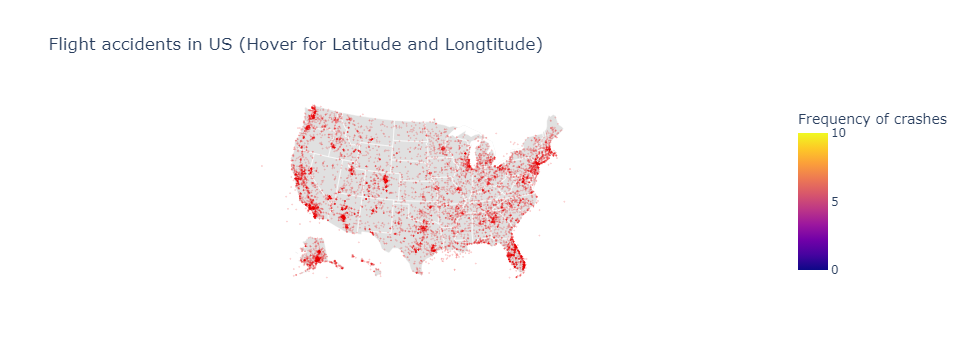

In [61]:
# MAP plot of the location

import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=go.Scattergeo(
        lon = df["Longitude"],
        lat = df["Latitude"],
        text = df["Location"],
        mode = 'markers',
        marker = dict(
            size = 1,
            opacity = 0.2,
            reversescale =False,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='red'
            ),
            colorscale = 'Reds',
            cmin = 0,
            color = '#21143b',
            cmax = 10,
            colorbar_title="Frequency of crashes"
        )))

fig.update_layout(
        title = 'Flight accidents in US (Hover for Latitude and Longtitude)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "#e0e0e0",
            subunitcolor = "#ffffff",
            countrycolor = "#ffffff",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig.show()

In [53]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import geopandas as gpd
from geopandas import GeoDataFrame
import json

In [59]:
def animate_map(time_col):
    fig = px.scatter_mapbox(df,
              lat="Latitude" ,
              lon="Longitude",
              hover_name="Target_column",
              color="Target_column",
              animation_frame=time_col,
              mapbox_style='carto-positron',
              category_orders={
              time_col:list(np.sort(df[time_col].unique()))
              },                  
              zoom=10)
    fig.show();
animate_map(time_col='Year')

TypeError: Could not convert 26.152560.86666742.85222235.14472241.30027837.6833333040.18444430.49361130.07111143.20166732.75805637.28388928.902533.21416743.7839.48833330.637537.38055661.23222333.6537.03083435.63638930.67138940.68333331.86666736.21027861.08277859.96583337.29555540.63833332.69722239.34055531.37416739.28333359.93305653.9639.05972239.76222236.1344.44944430.51777839.74666643.74777741.38777738.00972262.33333321.96666734.91777824.90222241.37416732.42694561.74583332.29666639.83916642.36833418.01666733.91833462.46666733.91833435.92138942.58527732.83222317.99638945.67138928.82694528.82694530.37543.51027829.61805626.30555635.60583327.18305626.9238.25777830.49166627.98888932.81555637.33277838.95472233.71694533.71694535.61027864.65833333.75555631.61916741.14638942.88166743.40083335.46722332.57222360.77722326.15416736.41666739.12277846.20833335.58222340.02444526.19722228.10277864.17861131.19166626.07277833.17527864.42533.43777735.64111142.36666763.14611147.56944534.12305633.11444440.79535.27027828.76666738.46833443.38638930.7858333338.36666734.56833432.11638927.26277829.46666742.212534.47536.86666738.71361133.87555632.57222332.95805633.817530.97472321.89666660.47611141.32083442.9635.02194537.48277839.56666759.70027834.02166760.46666729.63555535.41694534.10944438.98583361.58333333.74666625.99536.21166735.06722333.817532.560.60694428.91666718.43944441.23861130.53305642.55833339.37535.752535.27333438.44083342.36416742.71694542.36416727.64972247.38722232.19166631.75916730.20472229.11388941.14916628.36541.66694562.78638962.32055634.99138962.14555539.49388943.94916641.58333333.26916739.31805638.41561.17527826.08194537.50305658.67694561.98333333.52722338.30277829.53333363.33138933.81666732.2538.30472259.9569.11666729.6944.65083329.38916627.07166742.18416634.84805541.52361135.19722239.29638930.62305632.95472237.95111130.14888939.3260.147541.58916629.43333345.61805640.89138934.657533.95305638.22805660.47611142.37222340.45638942.39777727.49537.65944464.81361134.16083338.57861138.80416736.36666747.46666738.46388938.63540.75777832.73361136.89333332.73361135.44527740.40555638.89388929.50611118.262529.73861135.08694463.559.68333340.80944437.99388934.43194532.120.08333332.99555536.21166734.26555632.57083461.18944439.99444442.58555547.79166632.89638934.73222333.94777732.75972236.22027829.35944430.67888947.47638939.55083340.77561.43333327.49539.76666761.61694564.78333338.58694441.97138918.31305662.86944534.24138921.9565.03222356.21666760.01666735.49555533.18444436.21166734.25972241.98611142.96277834.14444438.22666735.01805636.00361138.98666625.64777740.89666634.73388938.36666736.90611138.26611135.45944434.57944530.312534.73388936.38166738.81694543.2526.06722340.36944527.07138932.57916736.51416720.88277837.88333334.25694441.91529.78611160.12694530.28777741.39972243.01722334.84861134.19666635.22638935.16444443.572541.03333340.92083440.30666759.64555558.18833361.18694435.92027837.42833443.87888933.63638960.16666733.4536.5538.95805641.09222226.152559.21916735.67277832.82611156.7534.872543.11444438.26032.83833341.24638939.22888964.33361160.48333339.13444435.43361132.11611135.947561.757536.66277833.46027861.58333338.3438.58694439.83416636.66638936.03333361.45444437.65944439.98333341.50972263.86666738.92833461.757541.90888927.93333332.78166733.9538.95055645.13333341.98222327.46055663.36666741.3626.78583328.529.71444439.94833340.46777828.28972237.61888926.37833436.08083434.66666737.15416735.03555518.007561.57555628.97777838.1540.35972259.46666766.06083342.46083335.7533.17527844.66527844.82666757.56666742.94722261.757539.36777844.82333433.28561.21444434.91805637.67916740.71555629.30111135.72416733.30537.562543.39722235.91916738.00666738.43472243.987538.41666736.338.72416743.76833433.71666739.08472235.23694461.54055533.9559.18972259.18333343.98944441.12833440.09361133.92277842.82722331.36666734.20083362.01666760.56666741.60611142.17138931.12138942.80111133.97694538.49944430.27777830.27777833.62694539.34472261.9547.11666726.152559.18333362.01666741.02861159.06666740.96916742.02472339.64694431.5535.14194434.33333338.58694436.13888960.24166630.72833461.05111132.16472239.18472233.632563.742.99194435.76305630.36944539.48333340.88333338.75472238.58694434.52805639.67916729.67083462.51777844.35111140.74555568.71166760.48166733.87194543.21722333.92568.63222338.93666664.48333332.96583338.54527761.41666761.38527743.43333330.53305661.30222235.98861129.33694456.76944556.33333336.152539.44583332.12777844.61527835.9560.907566.83333333.58333338.39138939.10333339.19666632.98055645.09777761.232.89638932.89638940.02444533.97611129.70444431.51555630.92055635.40562.357561.58333333.17555632.93111161.58333334.85055634.76166729.62222334.76583340.83083433.972540.82535.15555660.53333359.96666760.56666762.15805660.82564.42444561.40277832.75027837.69166643.45138930.68805538.21527841.66916740.16861142.50138937.14611144.32055630.24722240.36888936.83361131.05583339.01805639.01805639.222561.80833340.09194462.20444464.26277839.14111164.81361164.81388937.537.26833445.32333461.80833359.84361144.32222358.67694529.0863.28333347.05083339.85972261.53333368.13361140.38055660.03333333.52534.78361142.69722239.45138926.922561.459.4539.78416635.21388968.56666732.11666748.31527830.87305628.53333356.90833365.17944544.20333334.50888962.86694563.21666739.73472233.12833441.56722364.76527865.13333337.49472262.370.33333335.76111134.12333439.57805637.88472239.00472261.21444434.25555644.86972333.32638937.23532.262519.64055541.51888930.20527842.722548.532.89111142.66666744.85222232.35722228.81555660.7560.38333341.80361135.06277840.84166637.03138940.84166633.17833435.6353433.36666734.30666740.38916633.57611141.53666634.73333332.512537.31527842.32805660.77833443.34972230.40722261.16861129.29611144.62027834.66361130.73527733.42027837.357539.91694533.335.45638940.89666633.26916733.26916736.08333327.95277833.72944536.15888933.4542.90027866.90916735.15722227.95027831.25194429.99536.47534.87944533.88055639.17444533.94833332.7934.65444438.94444432.82694536.36277856.95944439.27527831.942540.98444437.35277833.58541.20694433.34583336.16138933.18527746.8545.48666635.717536.09166646.84194429.6942.91388929.46777842.17583440.35583342.40444427.39722240.80111133.25666741.41055641.86194444.30222232.43861139.97888939.07777833.35694434.69888930.73694438.57805626.33333335.23694433.97222329.71333330.46166727.08305633.37194535.05944441.16166739.9941.52222341.28583333.63666633.63666632.11666732.51972344.68333332.40138932.05888938.03722226.24722235.97277835.13861136.06666731.63777736.06666734.65444433.25166734.14611133.31333333.81777838.60472233.88333334.07166736.35972234.657525.93388933.45555644.41111134.93416632.35388941.2142.36416721.277536.67138933.637542.08333331.53333334.09166631.51777834.45722230.50611135.87444543.04611132.28583337.86166735.25944433.82416761.236.7834.88333331.71944534.229.70444429.05555644.04833333.33333327.65555633.34222334.01305629.58888940.75138961.17944541.97972343.87611135.22638934.25083333.51944536.63055637.92541.18222341.37138941.11361126.06277825.79972234.88583345.95805629.98027827.97527835.26666739.66722333.86944532.96361140.09361127.91638918.31777841.63555526.74194448.28333339.052533.14527737.5537.31666725.87361147.44916635.13527729.62222361.21444435.10138939.12222335.43388930.45472246.302529.43166736.15638937.24444430.90555659.27388933.31388928.03527731.07666741.5148.21166727.76547.77333438.9538.72138927.39527737.62388930.637536.73361141.897544.53333343.81944561.17444537.37777840.34305526.43305618.4534.26138932.41666736.59722247.15055636.5540.07861140.46611141.98861139.43638937.13555546.74944441.39111130.71666727.7457.92694547.10666733.68166733.9269453632.687561.26722362.32305633.62277833.87777838.13333329.66805660.96666738.92972335.46916743.93194541.56535.91666729.137531.42111126.68916625.79305545.772528.05722235.02166730.21388926.68111140.82472366.88555526.68333328.9939.95888941.57777836.64138941.34416630.07027848.52972332.09722234.17277830.24361136.13194534.34722237.362535.64333333.81833440.74194438.26666764.64694427.61861137.29944436.92777833.08305660.57555633.27666729.30166728.43333348.45666734.09722227.49533.78055644.77861132.15277832.70527843.50563.03111130.18027839.98305640.16361132.838.25777832.41555631.61916740.16361136.11611132.82555640.61944539.87777831.99638928.29416629.46388936.07055632.88527760.77722370.61694537.18111134.89027736.23333341.81666747.26805640.08333332.13305633.56472232.11583340.85972234.58333338.95083339.71666743.9529.85055635.0434.70388935.04027764.81361139.47027846.937.08805535.51222236.19833333.48277841.76666732.427544.35722232.61583332.427538.29361140.16444438.06666723.24555529.37547.96666747.80361161.17444540.09561.17444540.22027841.95333359.03388940.37694535.04027732.7143.51833433.55888958.93916626.07277828.75277837.17888930.45472233.31277839.26388935.21916735.03666639.49361148.01111134.21361126.37888929.69416642.47777841.04111140.32861138.67540.58833334.64548.52555643.27916739.79527731.62777838.81388928.10472231.35055661.93694436.21166731.66638961.39444438.37666732.93638926.15388934.15055642.59138942.89111126.15416735.21416735.77222333.26916734.27305633.97833429.50222235.94722230.57833427.90166733.82972344.0639.94277728.86611133.68833335.23166730.39861129.21111139.21333345.187536.81666733.42694542.90833333.64527.992527.992535.8583334632.64305527.992527.992545.55083336.52194538.00666744.697547.46388926.92027833.17777829.17194531.47194536.15138929.10083341.26583332.96055634.99972236.42194558.35833346.41666740.50833332.84694461.18333339.53555526.78541.74861132.38388935.54111141.46666735.29888940.757535.05472233.62694534.62944527.8533.63305634.7557.23333329.6933.82861118.39388939.48333330.36277841.61666733.31277826.00138936.29444437.48638940.87472331.86027834.84861141.45388946.60694440.79611140.61722332.43861133.00555634.657543.91666744.01666734.74111138.22777830.81361137.28722243.36444428.00888939.10027835.04027726.74416631.29972233.87888938.98444435.79083340.44972226.46666735.04722243.94888946.30944429.07805640.42833440.35166732.98388934.06277833.34638927.33333336.26666731.36472236.85694438.96638940.8537.10777840.97416735.26583339.17527841.535-24.335.72694531.88111139.457529.74527744.86083343.76944543.162539.667530.67888941.00861134.66539.75694432.5135.13833335.947541.51805637.27166738.512531.84361139.04611135.04027740.85222242.19055540.84361145.06194441.63833336.41222229.06666764.81361147.15222232.57222339.66722333.25888929.52444537.01527841.78583332.847.45444434.60694433.48555561.18694433.62916737.52111133.22305634.27694559.24805537.83916630.782535.83194528.34722245.41583343.56027832.81555639.91666732.35416762.13333363.2764.75916733.96111131.252530.41055642.98555533.21972331.77972340.01944561.83333338.25222237.88333341.66333342.20666739.43638933.62277835.06611135.53416648.07861132.09583332.21527834.11916760.47611147.5327.39527734.887532.24472237.70111142.73333333.10861137.61638942.52916719.634.79805529.98888932.70083334.37555626.107533.96666737.38333331.62534.71722341.15083366.81666762.312539.23777729.66916737.56055633.79333318.00805647.86388934.82555613.48333339.45138940.52416735.50305635.50583361.86555646.37166745.6542.28333335.25944436.17833437.63527729.46722336.42805629.30111142.66638939.38333326.43305633.88027833.64548.30805647.47694540.07972333.63944436.26833441.59541.72333427.39527740.27666730.60222235.08055644.05222234.74722247.46111139.70555643.52972336.81388938.20833361.21444444.09694440.83027839.72694534.08333336.02277833.64527738.36333328.04722244.88055632.95529.30111138.21666734.72944534.76777834.85416728.12722338.13944433.92027834.84861139.04611140.72111127.642564.74027732.33222338.70472235.97638932.93111140.21916770.11666759.03055634.33166737.73111136.02166740.66777864.36666742.42531.43694433.20527840.232545.71222239.49944440.94805531.58972235.51666733.62111139.122560.86305642.26722331.80666741.73333339.90833340.643.36805660.77972327.26277846.38833336.01805634.657539.77194562.312564.81361130.99972232.36472245.54536.212561.928.88333339.45916744.934.51833433.68833332.54472230.07027830.64666638.78416633.81388958.63333340.76861142.54861138.92888931.38222339.29777735.63527733.93333346.60694441.40222237.40888936.7335.40277862.9541.47833438.85194438.52055645.89611142.37166761.18694462.32055637.93583362.33333347.10388940.35444431.80666737.95388935.12666730.27777855.3555.3526.15666754.54944441.06666743.68361139.70777818.13527718.13527733.63083434.7345.06194434.90472234.26361133.03833346.56916743.80027848.09222235.62027843.52972331.942541.98527761.34138965.50194437.36777834.01305641.13722236.19833336.04861161.63055643.51444436.13416636.240.03333336.74138958.70361132.74694430.03333341.92444532.25194430.1739.90861126.74416660.70444446.88111148.46277828.77557.05666734.04666647.557538.239.91694530.53305638.49083344.11777863.61666776.30416762.46666744.72888927.07472332.51055630.52222330.48722248.16083336.82583446.98333344.88888936.077528.18777736.12444540.32861128.20138937.44222237.30277844.83333361.59472234.87333439.65416740.60111139.78638938.94583341.19583339.77472361.53361161.66666734.55833334.55833332.26055639.02545.87333437.10777830.21861130.54833340.19444433.44138943.73333348.05861148.98583332.89777735.58333335.68333329.64527731.15138936.19562.36611142.89111143.4536.07666744.28722247.19527739.36777842.49666629.46722327.35305639.26333343.3541.72388943.66055641.9463.29361134.08333336.0541.59361144.22861145.81638942.77539.122532.85055635.20583338.74194432.712543.60666745.04222240.96666734.2533.88333321.39166641.69027731.61111142.95388957.56722360.2538.93666633.19472239.57027838.09611147.96666733.4538.14888945.54944440.94722234.81638942.4539.5141.12861142.25972234.11916759.96666745.6536.8541.02833428.34722258.30138926.38111160.12666747.07583436.77694540.36611134.84861120.78694530.50111131.71972340.53555541.61027843.62916760.53333332.14972234.97972344.20416741.53277833.88166735.43805543.53138934.51861137.98972244.236.45027861.59805543.61833427.3139.22388944.35777833.63638948.28027864.79611134.26805641.19583339.68333339.68333337.81416732.37361140.13333360.536.25638933.04972230.06611135.15222244.48027840.03388932.11611132.91611140.31277839.26166738.95888942.07222335.04027737.13888937.85666743.42666742.19583346.53194538.90083341.53277843.5545.08111140.05222232.37305640.80166739.5743.98416640.46777842.49027732.65638948.15166734.90472247.82555669.27472340.81583340.35694445.88527.26277830.36388937.55388941.11666758.33333342.3433.46083335.66666728.71805633.46083337.43611125.94888939.66666739.03361141.98333357.03166739.65166732.63638934.65444439.07111135.08055643.68544.46166743.73333341.60277838.26361121.57861133.29361160.228.797540.77722347.10388947.82861137.43333330.71833426.17583438.90388944.53666641.2136.71666743.98444464.840.29972264.846.98833340.35416738.51611141.71666733.48555561.440.43583334.51833438.30833328.839.0726.19722236.45972267.95444465.47138940.08777739.80861144.53638945.32361133.44472238.33333334.6542.69166633.41527847.21166739.35472240.87277834.70916741.32444531.7929.4831.77555642.88333343.45805634.90944443.53638939.93194533.90111146.38333342.127561.83333362.15472243.84972241.37138936.941.247527.992534.58055643.53194539.97888930.23472235.04583353.0832.79916639.09972241.13722237.21543.2538.80138938.19540.37861128.34166661.10666738.37305631.29722226.19722244.85888943.88472247.33722245.99138941.43333336.39722232.95533.76666731.71972338.73111141.01916741.19583341.8561.96166740.32916727.97527836.22805641.12805643.572560.83305640.63972235.85027839.34111144.99666648.75666743.11888941.14305545.29055542.02388926.74416639.78666661.78777734.26388945.73833348.25138945.16666739.90861148.17777859.37083460.47611161.9531.267546.941.68833334.39194434.91666734.22611138.35972240.01694544.08888947.28055643.58138941.28333334.89027741.19055540.30111141.68527740.7461.08333338.20416727.91555638.35222245.32361141.682544.25166761.58333355.3538.78305655.3543.63333334.68638930.95888940.01027839.90861135.04222229.52444536.33611146.66222242.27305641.00611135.17833439.535.13538.71527836.96222248.61055661.7533.4545.62222338.67611133.4533.35722262.56361170.2146.59666635.93944435.2435.68333349.35166742.2542.73138948.667538.99416641.68527738.152527.48277839.29166634.79833335.14722264.81388957.64611145.11666740.21138933.44027739.93527755.42559.43333343.46666738.00972260.59305527.98111134.23530.81527840.75138940.25277829.98888933.31166738.042538.45277844.69166644.49722225.74027736.8844443236.230.71805632.14083342.53333361.36666742.46027827.49528.728.77916736.20333361.4560.11166728.22805632.11611139.58111132.08333328.537559.92562.09694442.86666740.16305643.10557.56666746.89361133.18333341.7833.11166745.06166764.997562.8457.77972338.39444442.21166739.530.64583336.19833332.29361139.91472232.33472244.8838.54194442.46027842.53111140.56916726.41944536.6643.087536.90305639.61638940.80638936.2536.83333340.16361133.96944535.537543.60361141.61472234.20083356.9536.00083340.99666640.21416747.63333348.15666739.16544.85388942.59166644.77833438.727532.33583335.902536.00277757.83333363.76666741.01666747.82138934.39166639.58888925.79333339.66666741.91638934.512540.14138964.239.03333338.79666638.37222344.28944439.12777842.49111133.87555641.5942.70333365.83055642.48388941.5939.41666742.90722230.87027832.73361135.60166741.27611142.48583332.82611132.50416744.01805665.83055633.12833433.12833432.04444438.78527734.21777828.22111160.76666744.88888935.87222344.96777835.83694434.902532.937.96555629.37277830.15138930.10166741.48544.88055637.32194548.48333333.7530.63138937.10111144.67540.48416641.25944435.66666727.66666741.69444435.44972233.25833336.231.42111144.90543.63138935.08166745.81277848.57583436.73222327.56416742.40277834.84555542.51527847.61861143.35333333.71611134.452532.78166738.727535.38166745.30305642.43333330.4629.06694537.37277833.922538.917546.83916659.17055641.92055639.51583342.24545.94972239.66527841.35833344.12333441.85861129.57305641.43027835.83194535.24555541.93361139.67694537.90083334.11888932.96972341.75055633.457536.02777845.41388936.02972348.227.96194429.45833331.942539.90861132.46027845.00833334.84861140.042542.4533.2523.43305637.53833336.34861134.26861137.241.517539.78527736.55083361.17444536.03972261.57555629.33694438.65666745.51527843.83388947.86638940.65388936.21166739.92916734.98166733.68666646.60694435.23694433.83333326.2472224.16805642.66666736.34861139.5738.65138933.10194444.99666645.06666747.64444438.91472229.33694438.09833340.27166737.65944426.44194425.9556.16805638.48444440.78833340.28444434.20972230.55833339.78527733.32532.14305542.37542.83444442.3561.57138934.502534.79194433.25138934.03333339.58861130.782529.34166644.53305636.61055636.07666760.77972339.07777860.77972317.98333338.86666731.552530.70583340.79944440.07722341.97944527.65555627.46055634.16805661.18694436.85222226.33583339.84083342.57222326.33583361.81555633.98333332.68111132.75166757.53333364.81416721.51777832.75166761.41666732.70277839.5840.12166730.202530.91555635.89861132.62111130.61166736.56611133.89777729.7961.435.77638932.51055633.56472233.81777838.72277838.37666733.26916739.90861160.18333364.835.19535.52888936.83545.74277729.97666728.42888933.67555647.96694533.71666735.287536.63333332.73694433.13472231.88333340.88861136.60333335.22472344.26666744.01805641.26333361.21444440.77722331.29472234.2537.69222235.32777833.91833437.90583333.97055636.77972333.62694533.86666733.74861145.03194540.947541.787541.33777738.15416728.54555534.26555634.72944545.29472243.11944540.87527840.87527835.95194434.87361135.947546.9938.09055539.22361142.26666737.72540.49361130.042544.92916734.49777733.26535.68666640.61222238.77535.330.19388933.56666729.73916641.97972346.12388930.30361139.64166643.63833345.19944442.46027837.65055646.03666637.09333332.22534.34722227.992528.34166637.63638940.04972232.79611137.82083447.28805541.68388938.61805640.83055636.95333337.15111140.357537.89694436.16166733.16805636.16555644.8847.95805634.8546.2548.27472338.51833435.27027837.79027738.36559.78333360.47611130.37527834.13222337.93722234.27277836.14166632.36972346.15805634.75888947.25722242.43333334.542.3539.10333336.27194533.16972325.79972234.45361139.46388934.12526.55611118.45111130.47333433.61666732.9534.687539.642536.71694539.543.30361138.72138931.92055639.32694556.830.49388935.2533.10888934.51166742.25972247.51666725.86777833.68333333.83444448.06361142.16861139.08611137.06305660.46666761.2557.61944531.77972338.13527741.522529.52444532.82194534.26555632.97534.57638935.78972242.01805635.98527746.66722335.543.55888943.457535.86166735.90055626.002540.18333342.65166740.91611130.39638940.14166636.18333334.26138937.15138962.86666730.31666732.95388940.33472240.97111133.88333340.31805628.26666727.23666633.81138933.35111132.21527832.14138938.28333341.53972243.4528.27472332.59305531.43166726.17538.89027726.53805528.10277834.57916736.17638928.10277838.067537.95388940.79916641.44583341.31416742.13888942.44694436.17638931.63972240.86944544.74138943.11444431.05527835.30583333.36694534.1535.77555635.77555633.04972232.37611129.2538.97333434.65444428.10277840.76777825.85611134.14416640.96166735.48611132.89777720.934.14416634.13333340.78833347.27638938.79861136.84194437.12777848.30666747.33111133.8526.15305643.98444440.6397223330.41666739.6540.59666639.71722329.41777847.91972339.32222341.62666734.03333336.7843.572531.68361148.70194428.92638930.52083446.89111140.77833440.77722340.967541.63666629.7959.93305635.17361141.88472238.56111137.27777838.28888926.58333357.53805531.05111128.102534.13027831.35833339.76666739.76666742.42666733.08777738.99166621.16666744.8239.59583325.84861130.61361133.66583340.00944447.01666733.81166730.33333335.35638941.51541.87222332.31388961.89888933.74638941.5588893535.11805636.87833444.62777826.06416746.21222245.15611133.8183343334.23777742.88083426.19722260.80833328.51388938.46055630.042548.15416748.48277838.73333335.13861132.99722238.03138926.20611136.867534.27916739.76777845.19555542.735.137.277534.69277747.91416741.287530.06944529.85027831.32138936.32555663.21666743.40722235.307557.04722260.47611126.24722232.43833339.37055635.21444444.86694526.072543.83444440.34444437.1942.46666739.22305643.99111139.00805649.137.627538.57055637.07305627.85305636.17916725.71833431.86916731.01527834.58333343.12833430.782534.33472240.48194545.48166741.88972224.61666733.62694532.41111129.002540.89166628.34722234.98472233.36138938.33539.66666734.35111128.3534.74611132.82611138.81722328.77777847.11777843.23472225.94972228.82472339.24666640.137532.71638940.63972240.77027840.07972333.79166626.59138938.93333359.7541.34944433.26666739.11666742.50305634.24861133.64027736.427542.01194442.21055630.432.51444466.88472237.64944433.52722338.68333329.10111141.78027836.457543.91027827.23333345.85722238.07722343.84888930.38666630.652529.43333332.61111133.38888934.81666735.16611133.15416741.25472240.80138932.58694439.24666629.52138938.57333439.7538.84861135.38527734.28361135.32805631.80666733.62416735.04305564.73333345.35277840.617533.51694533.61666738.81416737.96666734.53638918.13777738.70666739.48472233.61166734.64527747.44888937.50535.61916733.31305641.51527833.7239.40333337.66861132.51055643.447534.29555542.63333333.35055631.29972237.70111145.62277843.50805633.63111126.78333340.44111141.90777843.53277840.04333361.78544.22138939.09666635.91527834.63333333.26666764.7534.99083333.86666729.07805630.21194442.49666639.90111142.77638937.62388934.21638929.9355553640.01027844.12333431.99166634.86388959.43333335.24972246.60666729.56638936.74111142.35083347.1426.152541.13138936.13888934.93444440.77777839.14916639.77833430.84055538.03916639.60805641.51777836.09666635.99861131.30638935.56666731.10555640.80833337.51194461.28333346.04916630.59277732.687545.53333336.24805542.70333336.43694425.00861136.21166738.54916627.98888941.18972260.48333361.01666744.81111136.05361127.56194427.98888933.33333343.53083427.98888941.97972331.95111147.26777841.87138932.24527740.52444526.79111132.82611140.65138927.98888934.88333333.11666742.53694432.45277836.29305538.30388933.83333327.88361132.51083333.05111161.852538.30388938.28888935.2534.21694512.62222347.45277844.74055545.45416727.97944536.33333333.94222232.507537.647561.18833345.95472239.58055633.35472241.57277827.72722326.70083326.70083338.66805641.17833437.56611142.60666741.12833431.29555539.76194461.17444537.72444538.95805634.31666733.45833340.51548.79543.97833437.77805642.3334.47277839.46666746.30555641.81972328.10277840.10861145.31722339.42888945.16277842.68111134.97888939.78527763.31666734.84138940.21444432.987534.27027832.89777742.37833439.85833337.09138937.207540.61944566.86666732.89638948.15388948.79972228.03944440.78833340.24166642.11416740.58027830.83333340.78833358.33333346.48944447.34333343.36861142.15027830.35194432.33333361.39444446.03333340.23833337.54534.14694438.70055644.72027831.9533.74388948.09538.57833432.61583331.38222339.85833342.08333335.947541.95972246.527561.59611141.53138940.51694536.11805630.6352777.317534.887536.21166742.43527736.457535.93333341.27055647.31277835.95222233.62277839.00333329.62222338.94583338.94583339.19722229.87277840.23333348.72833445.02666746.25944444.20194439.862540.64527726.58333334.23333341.60833331.25888937.80777841.70138927.91055642.92416736.69166648.79666635.83166733.15694438.21305634.13222332.44166633.04972232.30055662.539.57027843.3341.50972246.60444442.73333334.66666733.89666642.94611140.20526.58833340.92833434.54583333.38333347.56666734.13305642.36694532.00777838.63555548.5535.03546.56916736.612543.56527830.21194429.65611136.62583440.89305543.34111128.47361141.60166729.68666637.32527831.50194434.73361132.03555531.00542.51416733.7535.20583330.35166740.09361140.06611136.47527844.91555648.54138942.08194539.16833441.32361141.132529.90305634.21388932.38388935.28888944.78805543.25833331.80388947.04916646.59083329.33694431.51555639.16666760.58333360.58333333.04722244.09416634.25666745.88305630.97472335.13888937.66555633.26888929.81805642.24611134.9147.38333348.487538.63388939.26361135.76833430.53305631.15416744.38277846.12777829.09222245.102539.26361133.68166737.40166741.12611140.77722339.66777839.50555640.77722339.69611140.07611135.14583325.64777720.5729.29527727.80916730.71666733.20833338.80083347.33333345.335.22111140.61944534.14166644.89194438.42833436.68534.98333339.2534.752545.94722241.18472229.69444436.92611142.71111141.25944437.28583341.03222328.00027843.66277846.82694538.96111135.95222248.07361133.34027764.837539.78361162.87888921.30722239.84722234.26888933.38666661.43694428.32083448.61472232.35333337.69333329.81805641.04027742.75138956.95833340.64555537.74972219.73861133.45638945.25638945.25555638.88333335.65888930.3532.69833332.08888939.60222240.04611132.90888933.95194434.75833327.91055636.234.26361138.33333342.93583341.90777833.65111139.86388934.15722235.85444439.86388944.84444439.41833430.38444437.7877773044.99833343.69638941.97138930.81944546.46666743.19138941.70944433.38888934.26138946.82305641.07666738.58694439.46531.96666761.1834.06916746.50138948.25555642.79583335.28333331.59388936.76222244.52027842.13055640.72388942.94722243.76944541.90777848.42638942.71166738.52666734.65444431.69361128.08694434.98694435.20944436.00194465.40611134.98055633.68833333.08527733.75527863.39388962.83333337.04611140.17055638.22777833.68833339.68333361.39444447.342530.47166730.51666731.15166729.10861146.90111145.6543.80027838.017529.23333332.95472238.90916729.8833333561.10666744.77638932.68722232.91666732.77944543.55138933.88055638.68694435.61694533.24472243.42222338.45416761.7533.68805536.02972333.43416639.83833347.61611146.74916626.43305629.46722330.06166738.845.14536.40416732.52583446.97611140.37972341.18555544.29472240.72305635.23916619.31666747.48888940.78972230.39333328.29388939.16333336.23361133.52972346.92361146.46444433.36972345.09972236.04166635.21666726.326.328.10972239.02027839.85555630.49888945.90166741.48027835.98333335.53333339.57027834.69027742.257547.20777842.49972242.78916646.39777742.35083342.61540.82444535.32277845.17138935.93583343.80833343.07166736.77777829.95083329.28361135.9542.30722234.83333335.76694539.94277732.30555633.77805637.86611127.97555642.36416734.11277838.04944445.91861145.457543.25529.27361135.81138959.58555559.75638936.777541.90833338.77805659.76527845.32361137.26027843.08333326.74472236.89333321.11666733.86888937.73305642.91694540.36527838.91444442.78166742.50027842.79694443.45638944.80666747.13333346.85694441.87416736.25777834.58333339.3635.23194541.19111140.86805639.7757.63305659.117540.58777738.87277838.52666739.362533.81805637.1541.36534.56777839.47666755.91388935.97277833.234.81666737.48138933.972542.22527827.81666726.829.45222239.56722344.48547.45972235.3540.26333340.61722339.22722341.5443.962541.09333335.02777842.71666741.16666736.38055633.61277857.09777747.49166646.61916747.45333339.31666759.44861145.31666744.85222234.53305642.23472244.062548.07944547.90111141.16805636.06527837.20333344.76361134.75722236.62583439.31861145.93944444.36666740.83541.16666736.66694520.00222240.44611139.56722339.21722361.47138942.16111140.90541.07944532.133.68805528.91666735.33638958.09611161.53333328.917533.21416741.98972248.67388940.17544.787546.06638961.17444561.58166726.18111166.88555546.46666741.88722233.68833339.68333341.15083348.1530.73888939.96388959.35361138.727542.01666748.84388948.16083340.24416637.60972233.26916761.75694433.75444440.91611137.69333343.00722258.43111139.16833439.0737.97777833.6261.57166741.01861148.63055632.09861144.32361145.54888947.73472243.86888934.72944542.91083348.02833433.56388939.33166744.9547.97444543.51444434.82805639.78361162.32055645.73361140.37583441.97972328.01388929.17972329.17972332.93111129.97666741.79055546.15972248.62166741.637534.88222342.76055636.307540.33527742.54305541.43333327.23833328.70694436.13166737.69333342.74194442.96555666.94333327.71944533.79333335.10111140.95944445.81666744.64861140.57083455.86944561.18694443.65027861.53548.20805633.85527839.68333336.42305648.07416741.31583341.02472347.51444441.15805638.03805522.07027848.57611147.90805637.08361137.69333344.58944442.79583341.69027726.00138928.86722334.97861138.24888942.66388943.10534.3448.12194536.52583447.39888941.92694536.92222340.85083333.88583337.56888948.08722236.21111145.44888943.31555645.67722328.18805545.58055645.77055642.56972343.9856142.087540.14611126.58666636.28333327.59533.36972334.47361136.6534.51833439.062541.17533.57611161.261.71333343.98444443.98444433.64027761.21444438.31527826.91416730.38472230.24361134.17305642.93333341.07138943.98444440.73527745.98611138.73555535.50666740.73361135.63527741.33777744.52527837.32583418.4537.39027744.8640.152532.28444443.28544.30472242.14277760.01666759.20055636.4528.54527741.78416639.9540.21722356.41666763.85333345.61972332.336.6560.88333337.377541.59111139.15888959.46694545.61166737.36666739.162538.66194427.59111125.93333344.86638935.13611160.96666742.88333343.73888938.58333343.61083346.37416726.74416642.40694428.42555.36666743.16194435.88305642.58694430.86111140.637558.66666739.54916647.02166743.34111126.84527726.84527731.19333340.16361147.43333340.99138944.992546.25444443.84972243.88888961.83333370.982534.272535.23611129.95972229.53361136.28694460.88333321.31861134.65444441.51805630.73222343.16944543.62194544.36111135.55694443.39361135.93444440.82777841.17194546.03888943.58027828.18722238.46833448.97944543.87888941.40361139.72861136.11666762.06472260.66666727.98638934.51666732.11611126.17527842.04861146.31111139.94277731.21305667.844.95333344.95333343.57805640.61638940.61944530.236.35027833.20833341.77194542.97666737.6535.1639.85861145.66972339.45527833.95194433.03305641.11833441.66083360.839.58525.79305543.73861135.86666737.90555633.28722232.15305630.61666764.78083432.81555644.03444444.66916741.60972226.92027843.87888937.67916734.76638947.83833343.69472241.92055640.64333337.41083344.04527729.172536.92194540.74333334.15416744.67083442.0535.307559.90833339.95833336.28333336.812543.74166635.87722336.47532.23527738.63388933.97472343.1544.99194445.41666718.30777840.86722340.63555538.72138938.13333342.66527839.05333333.81805661.81722343.61472230.90166732.68333360.332547.66666740.77545.16944547.21666718.10833340.62583442.85333370.0548.00638933.7536.74111138.45055641.44833336.89888964.50444460.91666738.529.68533.99611145.4737.32611136.69805533.43805536.45805644.35166739.84166643.14222245.02555661.71666764.91666744.92611128.2897221936.58944422.9530.35638931.41611135.78333346.72472340.69611145.80888928.057534.14694468.47611160.63333325.49861140.72166743.00166739.98583336.89444428.44111134.43083437.41527840.71666736.32888933.33027860.63388944.64527743.76277845.50861132.12333459.6127.09333337.77722327.23333335.81638962.08333333.18333330.04222239.07833435.04305559.98333333.80166748.49888934.1538.74777733.35694460.160.72542.37916741.80555632.48583364.07722362.71916727.41138948.72833426.97388930.33333336.60972229.35222243.73861138.92111139.86666733.05805635.98530.11166743.19555533.43416636.27166741.51777831.13694433.05111133.90555636.66638938.42777837.66888941.24833336.212536.212565.58333364.46333347.49916642.117537.70111133.56472260.08194529.81805629.95083345.14833361.92666741.81972327.49544.79166640.77722340.39666639.94388936.19194441.44916633.31194434.73361137.82111142.492534.16666748.58361144.88972242.46972332.212538.03805533.56972347.16805633.67555661.21361134.63666646.11666746.52138934.26527836.32111137.70111130.75777833.94611133.452547.51666748.57888929.33694440.75166734.83277839.61055638.0242.56194440.79111134.48111134.13861138.11666742.99027731.80666742.36416741.235.633.56472233.56472233.41916740.62861135.96666727.2534.7436.33333343.572531.07972332.47861137.61888937.61888935.7336.58527728.70888930.5534.64027738.58694441.66944539.79027727.94777738.78333336.25111148.56333338.31527832.98833342.40416748.51027843.06111161.53111128.41833433.57611132.82611131.88083455.35555639.21833429.55944433.62277834.21388932.28944433.56388961.60833338.93083439.85833335.61388939.10333336.33305637.89416638.57277833.63111135.73805533.16083344.062539.12222346.03472241.98944441.69611138.84666631.86388926.58388938.55638931.942529.47972341.61027841.44805537.33305638.55638934.78666639.64666640.03583336.43555544.48527734.45666735.58361164.75916742.74805527.97194532.69333329.76805647.08666646.00222239.53416642.807534.73361145.77638929.61222244.28694441.21583325.84861125.84861132.81555636.84361133.19166639.07805633.4608334635.88555542.53333339.862534.97833428.10277846.09166635.87722327.76972320.317537.68166741.78138939.85861143.06666735.70194431.86388928.85694446.22111133.14722232.81555632.81555634.25944438.25777836.73222335.31777842.43722234.98416645.42388941.58805526.64638935.40666739.78527742.20916732.81555634.90027843.06666744.28694429.2666674234.26555637.48944441.867544.50166735.02194529.16666735.30361135.06861135.91277835.14527738.50166739.24444436.71111139.53083441.80555635.24694440.49194432.97611144.74138936.24805548.02944534.86361160.76666740.23194534.36666738.067533.46083345.07222333.23666644.807535.1746.21222241.07666739.56861133.26916733.807533.807536.31722340.88555533.56277861.18694434.26666747.00388943.3343.64166646.46666740.87472341.83472239.09333342.15777835.02194535.36111161.73472240.87472340.31666738.26666765.17333436.22777842.11416734.40388931.35777832.76861145.04888940.79533.43472264.73611134.10555637.61888934.25944434.20972228.47333429.30083334.84194434.69222241.46722336.31861137.82166741.4672232129.35555632.36833440.41222244.83333333.26916739.12166741.93888929.17972332.78138943.44638930.45527848.65333337.06277833.68833332.46722328.54555529.91333346.69388933.98222334.25777833.32166744.92611135.74111133.88888943.85416739.60833341.52916732.65533.65111136.77388958.35540.50333345.81888929.99333333.11916741.742545.12666735.23722233.94722230.302535.29888934.87530.39166657.8547.71083339.85833338.03361132.26222240.73222328.00027845.04722240.63972240.79972235.60194433.55222233.85333333.34666639.86138939.86138942.66527837.81416729.44472232.81555631.42666734.84472236.24916633.29972228.33416661.33333340.37444536.94944444.8537.52361127.91055633.91361147.36666740.88805538.72416730.06166761.18944432.81555641.03583330.67777829.61972332.14222233.41638942.94027745.25888936.21388957.542.78333339.162528.29166626.22861125.79972234.12305634.91138932.17583438.26472245.97055633.90027836.93777734.07027834.72083418.33722233.51666734.65444444.777535.81222227.14722240.8543.50472224.72611121.48361133.33333341.70666735.58638939.90138929.12555628.03333337.33277839.04611138.19666638.60666733.38305636.25694435.06531.88333336.08361135.58361145.90861128.86777838.22777830.37138932.54277737.12083430.75472235.09444444.93444446.942.23777740.89777730.117539.287534.71805624.5533.37638945.82277836.20166742.55722233.87194538.37694533.55777843.067540.88527734.236.48055635.94444435.61666741.98361140.09972233.73527735.18055633.80111133.80111134.13166738.14611137.32444544.09472242.11416759.05472226.63333342.09416633.8834.32833448.09666632.89916639.93527764.87611130.07055626.08444435.65194437.86166734.08444440.54722232.53166735.9335.16833437.30277861.61694533.22083435.15111141.36694539.00277840.93805534.17888932.93111141.80305636.73222339.262540.42083448.62944538.37694532.81555638.707532.99027726.7537.86555647.25638932.37333447.96541.2127.7532.95472233.62027832.08638941.60472232.76555635.12833438.35722235.12833427.9902783438.50888942.91111127.06027827.99027844.04527736.36388932.11611137.07138942.72083421.844.82722347.44833337.86694527.48583339.21694534.2533.46083338.28916637.10638938.98333332.81555635.96861133.84944426.59055527.65555633.8942.48333333.39305542.51805639.00027834.81388960.96611143.39388944.83888933.17388943.63027829.70944438.36555638.72916740.91611135.12083425.31861133.70111119.95666740.49666634.56666733.41666733.42888926.43305632.61666739.417533.69166641.65027836.68222339.61555637.86166733.4536.62388943.21166738.57083433.06333344.93722240.20388934.97055641.53542.18416641.81277859.50833344.25666760.53361127.4533.61333343.82361131.52027830.63388943.83388938.80416736.89333333.46083339.50472242.92722333.46083334.11138940.05333345.35833333.95166741.14611126.152529.50194418.15194443.03166721.31861139.302539.05539.07833440.35416742.04611135.76833438.28972237.68333333.44138938.04444437.79722220.89861140.44722229.0833.25027829.33944426.59305536.98861136.08027830.78416635.39305544.12861125.78333346.13194526.19722239.12361145.19916633.36388928.22138941.60861136.21777827.39527730.88305647.237540.96166734.72611132.06722345.70527842.22027842.21222247.44888938.12583441.98916634.71666742.25972234.86583345.5440.15055639.91666730.242531.357546.88361141.36444442.69055532.04305541.12388942.38222337.45333332.11611134.63333340.64166636.47611161.70777847.28055629.10833342.61944532.30055647.26888926.19722236.17638938.533.82027864.75916739.85861139.85861133.64027730.36666739.66722337.9529.526.74416639.417538.97638940.30833337.97972336.18222336.12444542.40194434.84861135.99537.74666647.49027737.86666735.88555532.95805637.16666733.14388926.072538.16138929.46722329.84472236.89333361.426.08333336.58138941.35194432.08861133.56027844.47694546.44544.18888938.333.62805628.38530.35166737.88527739.14083329.26527832.86666734.01544.31666729.17277831.78944439.69277729.10222238.72111127.88777732.16611135.75531.942543.14548.09944440.80138930.27166726.58888946.68333342.93805547.49277737.17888935.23333339.90833341.24138937.18333370.13388936.89361138.66944531.39888938.80666762.97559.142.19027746.88611142.45138938.22777837.22166733.31944542.60777846.38333330.68472239.90833339.90833340.72861134.09166630.34544.47388940.38916635.567532.74611145.44916630.87305632.28083448.46916741.58916645.77694534.09138941.19583345.93166748.23972248.23972246.04666641.93888948.777544.40916742.23472233.942535.15222241.33138935.3531.1530.67388937.15166732.36530.60777843.722553.90027826.74416639.12222340.637546.23944432.70277840.82541.73055638.83083439.5540.96666739.422533.60194436.92611134.65416739.78527734.84777741.69027742.157537.08166738.03694442.57166742.57166740.49027739.85861145.72527848.5291676041.16333326.20972226.27666737.362530.81361129.07777838.74777764.81527839.85861133.817539.11361140.08472233.50833341.38611133.22777828.60833337.97535.65539.73833342.56583339.52333429.07805627.98888935.736.19027742.01666727.24194428.33027836.244.69777761.73333345.69055547.91277824.55611136.932540.03944442.20666738.80583327.99027739.00027819.240.96166741.83888936.31861134.57416737.65916761.57166734.24722227.9132.46694538.14416641.68388933.85666737.15166731.357533.817529.72333445.06166761.66666743.58138934.27305635.28833340.22544.72194543.05694427.50611131.672535.93333338.30472238.91527862.561.12416735.23333344.87416734.20583339.22333432.843.90722243.93166735.04222238.06333338.26666742.46333330.68472235.03534.01861144.01805647.38333338.917540.07972329.72333433.332533.94833344.25388941.87416726.14722269.46666745.63583333.95166733.68805539.97538.61111130.46861132.76666745.18194533.13194559.35222235.40972234.77138933.96916740.65222231.33888928.18611140.64416646.68277841.98944434.10111138.94583340.23944427.34194435.46111160.842.10583336.08305631.54444443.0563.00722248.072528.86722339.60472234.88027830.91555639.5741.93166742.96539.34888940.85083346.10666744.53555530.67861130.67861143.3545.82777832.78833329.07805633.13888934.65555659.36888928.88694433.87555642.78916642.00833326.644.96583347.23361144.65833341.60916739.02555632.14222235.28888933.79083346.35083337.39611134.88333334.66666735.58333336.02333435.07277839.18666638.80138930.35194438.60833339.36833441.64361136.18472229.64055547.69527748.65416742.34972225.84861135.877558.18555546.79444446.79444448.06666726.00138944.933.26916738.50833333.35722245.00361135.26777844.86166757.48666631.37534.39583327.06916737.69333334.58888933.92277837.69333335.83166726.27027855.26166739.27559.09666644.12833447.26666741.46222241.69666635.947534.69861129.43277833.87527843.18111141.282543.97888940.30638933.25444435.39861138.16972334.7540.94111161.21361141.392532.59777735.79055544.74138938.74777742.55388920.55555635.67277829.51944541.63472245.852548.54944444.11666742.26722332.76111133.61666736.89333329.69638941.42555644.58944461.21361138.50888933.81166738.95472240.64166635.65055632.74138933.55138930.88388938.02111133.56722342.6361.17444547.36666743.78555543.66305642.54611144.07972341.26305639.00027860.57305640.49944428.22916735.45194437.24444435.45194445.61666734.8844.12888941.86944543.11027837.6535.45833336.84194443.647535.23888937.89166626.22833433.92166734.55638941.14888942.49777744.23805544.50083345.24777737.79861147.65972234.65027859.06666727.95361139.497534.17305640.24055544.04527746.17944526.80027836.17472348.72555635.541.33138932.2938.77583440.88333329.32111131.61194447.48472247.32833442.66666729.97833432.57916732.89138939.79138941.51777836.40083361.59916638.28333335.54277739.36361129.35416733.80055633.52083439.5738.84543.04111131.71361134.86138961.9537.97861128.86722341.19583340.61944557.76166736.78138942.42222344.08333345.64388943.58138944.11666733.33083443.71361163.1745.93333339.19694438.32111138.70472229.79972237.32611143.28333341.022541.78277838.90916734.61833434.01305638.87444543.06638947.23472229.06694538.32333438.08944435.69722230.29027761.21361147.38333346.48333343.97888941.73611140.73527730.78888940.48166742.47638986.94722247.96833442.22472339.84027730.15694444.22166744.8645.78944426.19166629.97666745.77805633.46083329.33694435.67305664.81388929.75555646.41666733.62277836.022560.16666762.98722234.04472233.52694543.43333339.93527736.0530.36777841.38222333.01222233.847.90222243.64444438.0532.95472236.13888930.90833361.41666738.97638929.35416744.48333342.88361127.01694542.932542.932533.53055639.64277740.82138941.33027836.13361133.70055643.64611139.74916634.52666734.63333346.82472343.741.15083344.32027833.83916645.62333440.26027840.572541.00861141.72777842.29055532.56545.69805538.05138945.59543.36888939.27416741.28527741.53544.32305642.83027861.443.50555639.07833431.62542.94722242.70861142.80861134.517533.78083444.48416620.02055635.5947.17666730.61166759.41166743.42277843.96305648.16083348.38536.7834.38138943.16305647.30194448.1534.52916732.15277836.74166640.08388926.15277834.452534.10194426.152535.48638932.7532.51666762.16666748.1543.84361140.8239.3642.58472238.26305638.26527834.57527835.15111138.95277843.22222343.04583333.87555665.54111166.91527835.297546.2534.41833435.99027734.25972229.60055618.0836.74534.41694535.55611161.58333344.85166739.90333359.88333335.30111143.98611121.97583444.997541.51166748.60833343.56444445.83027837.33277835.08694433.69305533.11166744.01638961.93416640.48416626.15222227.26277833.03611133.01805637.74444441.36277836.06444461.28027837.53333337.13833329.63361139.85166735.472540.17444531.3931.60694447.15526.19888934.08694433.98277830.41833430.35166738.94666629.58888939.52638945.19888961.34333338.05638938.66833443.88694429.64083337.25166766.88555548.09805546.55027829.06694532.81555639.00027836.75361130.44537.74535.07305647.19416648.07777843.74222240.617537.66777824.64861138.99944439.38333340.53305647.5334.05541.36833440.00361139.83472242.25083343.85277843.61472244.15833340.83666640.0534.26361143.56305626.59305542.88083435.36833442.38527742.60777839.323559.50333339.712537.49138940.68333360.77388947.05166736.85611140.18666627.71194428.97305637.13361143.73333343.17861148.99777731.727529.66916742.34805544.25388948.64944446.50416733.99083333.99083333.55555643.96666734.91055648.01805643.13972240.04833331.10527825.61722336.62277840.88416642.62916727.39555548.03111130.33972229.63944530.35638939.22305643.722565.697533.33472232.77694538.66222233.52694531.29444438.83083460.76388945.25472233.80333338.93805541.29722261.21361161.57543.32583446.89722242.33472240.96583340.96583332.21527861.761.57166731.00416739.85111137.39027740.56611141.33833333.29861137.85805643.60055644.62535.65111144.44972233.20055639.56722338.49888933.62027830.29861137.20305641.44611138.24888947.6542.46555641.39277725.64777745.42472329.70444437.31666745.967547.53027821.31861160.51666740.19861147.36666743.6541.97138924.62166738.96722341.71944540.15548.34805539.01277840.10861141.71944560.11666739.09111120.89861135.15722235.06805643.846.74861145.61805640.08166739.98194543.14305542.50305637.04416647.78888946.97777836.02777840.08166730.39888933.62277829.70444429.812546.77416743.61222261.64611125.96305633.942529.09944434.26361134.11138937.08694435.77277843.25138931.09444445.12333439.79166640.452546.2639.46361138.22777838.95472236.80277835.14833342.62944537.66527835.9561.18694434.03777734.03777749.4543.35416745.42833441.832542.43972243.887542.38833330.21194426.59277732.5434.23055641.78166727.07138946.30944431.92055635.82083458.61666763.45444443.58138939.00833329.50611163.17222338.37694439.65555634.24166638.23638929.21111144.66361133.87194534.62638934.62638940.92833438.58694435.30222239.26333340.0144.62777848.18861143.1538.02166731.80666734.25972244.50694429.53222360.49194431.24277744.84777739.45027829.52111130.83166740.3545.21444436.80916643.72166748.342.71694530.60138936.767530.22166733.20833340.82530.97138961.21361163.66222248.97222338.17444518.33333332.02805638.80537.24555541.61638944.6540.86944541.47277836.19666664.15833359.912548.12222343.30472241.07666732.35722236.212542.63694440.52444544.17538.81333335.3860.7563.84444437.277545.39666665.4438.37305633.47305642.90833342.78166742.20833334.01194432.89777726.96555641.13138941.12861146.02583433.04138934.61638925.64972229.6930.06916745.95545.61972341.47861137.61888927.89972234.97861128.80833360.33333360.5730564434.7442.50542.0518.45666733.01472247.26361145.03166742.88444438.65111146.02388944.40972242.40916733.942536.58694428.97305640.62583432.30055628.057531.81833429.95083340.14138928.80861162.68333341.97861119.73861130.15083336.01805663.88611138.26277834.75444436.8538.88333338.83111142.91111140.07694533.4543.20472238.54305537.99583329.10805641.33027847.53194537.52638948.31694557.04722233.19138932.33277845.93194534.17111135.13861140.75861142.25972234.67444548.597532.69833346.19305558.56666730.64527730.30722237.40638941.562.08333321.99666633.16666734.20083338.746.64833338.59166634.58666664.6533.87555639.58388939.90888938.00555661.17944548.59583333.07666732.28694437.66888962.36194445.54055538.50888932.01416729.81833459.24388939.83305639.83444446.60416743.73333341.75535.21361118.49333334.06666739.90861135.81166742.37416728.97888931.41777835.61666747.59138947.48138926.24694434.85222240.21388933.287535.62083431.93333342.03111136.89361133.91333340.30138937.31805642.46027842.90777861.18694444.08333339.91388937.66666761.17444542.80861143.172530.87166738.5544.82722361.2535.88555539.25888939.25888942.11833440.74583358.66666741.28472260.14916629.63333335.02555640.35416755.2545.25138931.92055632.30722264.83333339.76805638.72416733.03333345.82305645.017541.51833438.65055632.61611133.942532.86833441.67111130.08694461.60277861.22638932.02805635.7544.04777730.36277845.80777845.7934.26555644.86583333.45972232.60888934.45194462.37888938.48722220.68027847.57333427.96194418.45666733.20055638.66222233.76666747.38472342.07555633.93888930.41805646.02388938.77611145.40833334.426.21944535.68333346.90083340.80944433.46083339.51555633.91666735.31555639.08361127.46138932.56861136.70611137.04416639.53638918.45583332.83416635.97277832.41111140.63333332.00638932.89666633.64638941.29138938.94444427.59861141.98944437.25666731.55861142.55416744.04333339.87194540.69166635.46222232.29083330.23583338.25777831.88111142.16833430.62638934.99305547.00194438.37666738.28333361.9541.92055640.38416630.27722328.73527736.212533.06333335.31277861.9562.32305630.47333435.25944437.08166741.42194534.83583339.65638933.4541.74388941.18444440.6233.942526.00138928.94888929.07777843.587524.48527733.79533.29861136.80027836.3234.93361135.38333328.48333329.50916741.70722232.38944441.44027744.10538.70777841.42555635.89611133.4527.34194429.24972228.777528.70111133.88305642.40555643.56444434.19972236.03944436.28833338.57611138.37305634.69916625.90722234.58111137.61861144.25694428.84333332.841.36833436.89888942.82555634.52305642.94722243.86861137.15111140.24583334.56694543.89805535.20388934.267529.53361140.16361140.45166735.02083433.35694430.21277832.23916642.20861135.37333433.4341664244.62777834.64027760.77972332.28944439.40166738.2429.22805637.88333340.10861143.10944436.00888943.97111139.827528.32472334.33333329.60138938.45083339.16666734.65444440.61777839.91694531.23444433.47666733.89777737.25111142.75833342.42583435.76548.19333337.26194444.66638938.51111140.57027841.41166735.55388939.87194538.66444440.8536.67166732.35388932.06538.95972237.18333330.637535.08111140.65055644.73416645.56666725.93388934.80444434.01583326.17583439.5741.40722245.88805539.70555634.17305647.49305530.5561.17444547.08694427.49543.3527.49531.739.88972235.10666730.50972238.73305621.30722240.27666736.27916735.98611131.51555630.67527829.70722245.65138934.63944448.17833426.25111139.5463893434.05027837.52833435.66555634.42611133.40833341.70861161.08333330.44444440.14833365.99277732.90888960.90583327.98888933.83916636.0333.51222228.73333339.55611147.90722241.56666735.76944540.17166740.51666740.78833333.88805629.41722340.66535.14543.93833341.72388941.88388932.13888947.90694441.73833338.07694547.38333333.68833337.95333359.75388940.82777843.8346.97194533.37972326.12111146.52138942.99805530.05888933.57194530.20194431.73555535.47561.17444540.04111140.52444539.73555546.257536.34555537.94972234.12777826.13666637.76638941.58555541.62638942.5791676237.46111147.65361132.95472233.62666741.56526.74777733.91416734.99083333.06666734.82194532.32944533.81805638.02555633.25472234.05944433.81805632.14194435.88611132.58166745.42555645.80861139.36777832.89527732.60138938.78361128.837534.72666736.28361131.84777728.592534.62916741.81861130.34527732.82611145.50972230.936.46361137.66027842.89833348.67444539.12083433.46083329.727.98861135.13333334.20805626.25888928.76777838.31534.12416739.04611139.20833334.9536.11666737.58583330.40722229.33694432.95472234.34444434.34444441.037530.06166734.33305641.78833340.24222260.135.43805545.68805533.86527846.37972329.08027819.45583333.1129.53361161.53805531.77833434.48333332.52027834.88222326.92027839.35138945.11555639.71972360.54138933.26916733.62388939.12305636.24666639.5744.19527733.52694539.482541.96666747.44888929.172534.53540.12541.95166733.98277836.24777740.45166747.10416748.07805643.51444433.74305542.70333345.14531.32722344.27416732.67333441.93861141.60277830.82527833.58222332.93583341.06555645.14542.55777838.92972320.81666739.28388939.70527839.22833435.39555526.00861147.16527847.90694460.28222337.26305633.63944448.40472237.59611139.83083430.36777839.95540.97833441.67083433.942518.49472229.98944432.33305629.31666739.11361134.5528.79166659.93305665.30666738.65361142.62527827.95472243.35583331.628.22805633.26916736.26666762.49083338.26638938.28694442.81548.28166733.236.85972229.78333332.58333334.49611160.62555628.46722321.30722221.97611136.32472345.61861129.0840.14166642.01916729.13333326.84527733.18777735.637543.66472243.56027846.92055635.22583461.96666735.30222261.1841.132564.3534.037518.43916637.69916640.69861126.19722227.94333332.43416633.92530.228.96666730.27777836.05611135.71361145.36166744.38530.441.00861136.22222339.95222225.91166737.11555643.90722235.20333334.69833335.78166742.36444447.30888928.34138937.51361134.20055632.5463.29166658.72722330.19444434.48361140.8532.40944439.417532.56534.26916735.28916639.417564.51222231.75111132.01416743.35166730.33638945.13305643.09805539.75638933.30777833.61888939.27472334.51222242.93166746.99027745.18027842.91722318.45666733.62666732.56805634.67194547.23333354.69583330.60916630.60916629.48472234.25944438.41805629.16666740.53694432.40944435.13861136.73805561.13444464.640.692538.16805640.692530.21222233.62027830.06166726.407535.21388938.94111125.49861142.32805638.05194431.57777832.21388961.30833354.83833336.13555538.15111135.86666733.817533.56666733.62666733.26666747.30972234.67666741.897526.68305642.70083337.0538.66777833.97472333.26916748.72861132.71166745.22533.97472340.87888940.43694433.81777864.81527841.63916642.98527726.67694538.36555640.73222348.65361132.90888941.20027825.86166733.9836.74111135.12083463.65277827.06194437.31666740.8541.73027840.61611141.36222235.35777842.562543.17861146.25527832.21527834.68638960.76666740.58833344.49722229.90333334.57111140.51027833.22694534.82888939.05027842.62944542.54333340.35416740.39916655.56666740.02722342.23472236.63666639.90833342.37416748.25944444.09472236.16111137.30333344.03388942.22305638.72666747.3544.86666729.0835.15222239.157529.44166633.18333337.56166741.92138941.47277840.85083361.46666761.21361132.80541.86583339.01861133.97472337.65916735.51111126.60222218.24530.80194429.17638928.29388933.68805536.43666639.66888945.44444427.98833334.65444433.35083339.577539.727542.687528.40388936.76222262.96861159.96752841.86666740.20388939.07416739.57222348.4848.4541.162531.79361134.18305634.27694561.57166734.26805627.992530.24305542.25972242.80611135.65527841.48333426.242535.32472339.842538.19722239.98722248.31138942.962533.97472343.22472340.16361132.58805529.07194519.71944533.89777741.08694439.56666746.51694525.55861130.53194535.36166743.03666641.70861161.239.86138937.45666732.98666633.98305661.26146.13222348.96861138.60027838.53277829.97666738.69194461.57166761.231.67694528.79416631.72944532.95472261.17444529.52111161.24277735.36722341.56388944.4839.0535.43333364.81388945.60472238.52666734.42666737.68888930.28555531.58555527.97277835.98333346.77277844.52972348.14083334.1539.36777830.67388946.78972236.212543.64611134.21388935.20055635.95222232.11535.23333342.11416761.43388960.05694427.48333339.51638934.88138940.71416741.97138931.79361127.98166764.61472259.64555546.02666747.86388944.88055644.88055642.41666740.95027840.88833339.86666740.88111137.262538.01805646.91638929.95361139.9939.96666740.5537.60222239.20111138.52944543.16861146.76777828.94083447.10388943.93305638.22333438.58333333.52694535.33611132.13583337.08166729.93533.30722259.03333339.71166739.35888926.38472232.22305659.03333333.79194420.78333330.50416736.18388940.79527733.62277831.942532.08333339.86166739.86166732.11611130.140.26388940.35444429.98416638.28916645.23055642.23805545.88333333.467529.17444533.40534.20083343.45222235.28888943.74194443.88194533.14527740.57222329.817537.20333338.99138943.64444442.91083333.42111127.88555529.43194533.37194541.11333334.42611134.84861136.22583439.47805643.10545.28944430.40444440.03333334.57916764.41111133.97545.53333330.242530.242530.31666729.98666635.817531.52583335.37083441.45916742.49194435.76833441.42555637.43527735.38361135.98333342.70333334.50555635.87305658.99027747.61944527.14916642.92916745.70305627.50277726.58527729.13694440.14305533.04972230.57277839.76111136.02333434.62944539.86138939.76111145.40194439.69694435.48805539.5743.96861161.21361147.26694537.89529.50611130.36916733.98333338.11055642.625.96666739.86138940.8526.58666635.957541.74388931.43944533.70833324.28543.36666725.90638947.26805629.90222235.21666736.99540.3339.3240.94138930.13194534.9142.90694429.72388930.192536.4136.39944461.78333341.5637.74083344.02055647.16694541.02833438.17416727.07138934.60666739.93472240.23542.11416735.91888945.24722235.13611130.18333333.23305660.27538.94444442.36416742.36416730.3437.86111133.12833435.83166733.16666733.89277741.82027858.67694533.12833435.38916634.89888937.06083334.43361138.80916737.927561.61666734.38333347.53305640.87277837.40222230.46111136.93555533.942539.83027837.58543.13972261.877561.21361144.91222236.812526.19638940.70111138.802538.28694434.47833439.49916639.88666631.83333335.69111138.83527737.76555637.15559.64555546.88805534.95361133.92542.15138933.18361133.45530.21194445.80777834.13333333.68833340.74333340.77666742.11416726.58638933.06666744.94972232.99166634.7543.90722227.39972234.77611141.40888936.13972342.90972248.10472242.0532.83111132.41166740.147.35305639.76083335.39722229.17972330.0726.24972241.13361139.58555547.30333347.86388942.58416640.44277729.50083325.51666727.0528.52222341.44805546.92222332.931.331.53472245.36194441.54166641.44694439.55527841.12805629.60055642.23805536.10194433.62916729.06166740.74111136.63333330.66722343.11666745.81666742.80532.42083437.76361142.62555636.137532.42083443.72333443.88805541.517542.53111144.66611140.21527842.53111138.11055643.49472239.83027837.82535.06666740.22472344.9440.14138937.25944439.91472242.91111144.83333345.11555643.0539.12222332.73361134.43083441.30305643.62666743.41777845.70305641.35194436.09777729.93972229.37444534.65444441.05277829.72111139.082535.90888941.237.40055539.53222334.47361139.12333439.682527.41138921.31861140.07972334.17305635.21916738.42833441.43277832.52444461.1848.48388928.06416734.51558.94305540.57027830.252529.95944432.65638940.95944443.40444440.547542.88361132.8260.836.0645.62083446.22111130.74111143.202544.30194458.552560.76666758.42055633.632548.95888940.56611143.97055636.22583444.82722341.45388933.06083361.52138964.539.09138947.21111141.16138942.70777830.78361145.15638928.51472243.29638928.22861133.90222264.39138961.260.535.24055541.13138947.131.45777860.00722248.67444538.08333341.78583367.16666740.48194540.28611138.12833440.44583336.10111135.15722260.90583341.33138940.29611138.79666638.79666635.27416740.2735.443.98472218.46166720.1832.14222235.36666746.01666745.31638936.87861133.64555538.63916648.09805534.17472334.65444432.93333329.52111139.57027839.57222341.46666741.53333344.06277857.56694532.93333348.78666633.30777839.65333339.642543.55972233.31138942.74305530.40666737.37305633.72166731.47722347.52539.12222345.13111148.7540.32583447.5535.34166638.19333338.85111136.95305636.13361133.35722232.127542.72666738.44222238.13583342.46777838.24805540.41444445.67305634.90527836.20638941.69166642.13305661.13333332.94416643.34361145.70305643.862533.94222232.28333336.20388928.28972233.35027842.78166732.35138943.50388936.28888932.8567.80333338.31527827.48333336.88361141.91472243.98444434.96694562.32055634.79944440.60138939.48333358.35559.28111134.37722338.63222339.157536.45444458.89611141.7543.93277842.46027835.88583344.15972230.54861144.04694443.87638945.62777843.89388940.87534.30305664.38542.79583355.29333340.82805633.35416741.44543.98444434.74527744.20611132.82611136.729.70277830.122542.70333324.53861131.61222233.71388964.31888942.09416639.94277730.71138943.45222264.81527861.587540.96666739.01277832.11611140.02527837.3256.36166735.75535.25277741.33027829.17444531.99972233.22083432.55888944.06027842.61694538.48666643.87138939.86166739.86166747.62916747.51777847.54944446.97416728.54555518.0538.14194447.51777839.492528.04305547.10472248.52333447.66666745.16361141.52722343.16972361.01666761.39444442.1363.542.79055542.63694426.43305640.82333441.06694529.972535.19055540.45166742.10555645.53722234.61861134.61611142.57861130.637541.28694443.47083447.36722340.18694428.28972232.44666639.24666635.40361140.45333335.51083339.41055634.00277836.240.740.736.99305561.63333362.2534.25111141.44722234.617526.46666736.40166747.12638944.04527761.93805568.54611138.28583334.70777833.54805546.84805541.22222346.39833339.162542.19166626.59305540.3532.21527842.81722347.43222337.65222241.80222242.11277861.62166744.47333444.52305642.08194541.97138927.59888926.04388939.487539.62861142.81722368.14539.50222240.50888937.84361139.66722344.62111130.34805533.18388944.46666732.15166744.62777831.32722328.71416735.83555535.86666734.03361127.63333337.70166738.86555632.48416636.33666640.04111128.2743.23888943.16027861.78888929.80222239.57722346.60666730.50611134.97861133.17194541.787542.59166642.79583335.10055668.2347.79166633.7732.56861142.0538.65333340.58361132.98388942.23531.17111162.05138944.89222246.36722328.777533.03888959.42333461.21333339.98527741.21583341.0231.92305641.34805532.12305644.94388941.48305637.08138948.58055646.00944441.912542.66472242.58305643.56444441.49138944.28194543.46416742.67333444.66111136.04361142.37777842.23805544.54722261.16666764.03333339.63888934.25472230.40611145.58861146.92055661.16666745.58861137.33277841.19666641.76666730.57111144.31944538.70722225.94722233.48833348.12833438.14611133.95888941.34529.98444459.12611144.13444440.86194440.50666740.192566.88472232.65638935.66666735.04027741.85562.08333364.65916732.64027740.21666742.44944434.28027846.40305644.88972233.81777840.43333340.947529.60722235.3840.62361164.11333360.75055659.11666729.337529.98944444.76916747.55194440.60472233.48055639.04444446.66666734.20583341.26305629.61833443.60722237.95361143.16027839.00222257.3545.01944541.68527744.22111129.70444441.807534.26888931.31444459.240.76027846.00916764.18333366.81277833.82972342.15611144.77888939.32564.63444430.3925.64222241.60277740.14166640.81527864.17194540.61722344.0630.16666733.88722232.83333340.03944442.57222335.06444444.90694436.03805636.77277842.64166643.31638935.34083330.27027839.50916642.32277831.85361167.48333361.25833328.13972240.02111138.25777829.58666640.33416646.97055634.27555641.08972242.51888942.04638935.49916640.87531.36388937.14888938.257543.057542.07416743.457539.36777835.64944435.83333337.70083340.70527848.80694446.88277835.77138935.72833434.21972336.36361129.02416761.77861133.942528.98833331.63972240.07972320.00111135.46972342.94722235.19166722.22138938.94638928.51472241.02027840.72888938.05277842.35833340.15916740.882525.90694438.06666729.81416737.69305540.00777734.36666744.84361135.12722337.52333441.59166632.57222344.96805629.02416747.85055639.49888939.77540.17222241.18805566.5552786027.19194431.90166748.16083336.10472247.02083442.92833426.92277835.50722232.96833459.74972243.91666741.72388930.429.06972335.95222232.40944438.9434.27027831.46544.36194434.742543.57444530.33638929.67083439.07277839.743.77472364.70833346.16305642.53583341.75472237.54722233.10083347.62055635.95222242.25972244.997560.05027861.7528.01138940.31361138.127539.48611139.86138940.75444440.04111133.98333334.42538.83083433.43333330.06166735.27888933.43333347.43666636.68888941.10666734.0642.135.8264.7520.89861141.09916641.09916648.47545.28333327.06361133.21777838.31666748.72861140.51027847.88666636.04722244.68194526.74416626.92277836.50361140.79527735.05916729.3633.39539.83916629.47861138.23138927.65638933.46027836.11138929.64527741.07138927.30472244.86666737.55916648.29944444.36361142.78138941.12805643.51861146.06472232.95472230.74166629.60444430.97805631.84388938.7529.53361140.35055629.57277861.9558.73277840.95583363.63611138.667530.58055637.30305639.22222338.06888939.04611146.87722334.65444446.12194546.39833347.05194442.42666728.51472236.86083344.75611140.33305628.51472243.05694434.61972332.40722242.91083337.740.45083337.49916638.55444438.02305633.97777841.67722329.1847.26805633.66361139.57138940.56916733.80555632.14222238.53861140.67055640.67055629.62916741.19611136.0631.45777860.38916634.99916629.64555525.90694433.62111133.25444438.29388930.06694534.25666739.78532.51055634.88583340.84416633.45166745.02638942.94833334.36833441.72666739.06611132.65805640.47722326.072538.73888938.40444434.73888941.5129.70277839.90833333.06666727.76533.57527842.94722235.25944433.03666633.26666732.93111135.85444440.93333328.76305638.90916741.59546.28444440.77194533.91944535.07305645.01361135.43361128.28972237.46111139.14083334.35972243.20555540.84916634.26527832.44666633.41666725.44833325.44833332.44666639.07833461.21361129.76861145.54027739.05083348.48388944.42722339.09583337.83055628.68333329.70444436.04361137.95388934.94527736.5836.83805540.48194547.31666740.947532.81666734.75111141.39277740.38416630.64361141.97972332.79777739.86166745.83194548.48388946.39777735.58361135.68666641.25305632.30805643.28333339.22722331.24888939.00055644.38277825.08333342.19527733.93861144.28694430.06194433.46333334.25944439.01166726.92027836.43583346.67694547.90805629.03333333.88333333.88333344.40666729.17972337.537532.82611141.13138930.62666760.93916632.59083337.36527842.49333342.49333338.33666635.03861140.84916620.77694429.69222229.98444429.98444425.94888927.18083445.84916640.47583440.61722329.97194525.90694434.133.942539.565.31666742.32277843.07777842.36416741.74388938.94555538.63333343.387540.96166762.03333337.06777834.09166633.88560.01888934.09166628.13166737.69361142.68944441.42555634.75972245.58861129.65861143.84833338.91222233.03888940.03944421.98333329.74666633.24083347.44888932.92534.98555544.11666745.63111144.39944434.74111133.38666635.56527834.27055642.1542.7221.97222339.31305641.187527.89388936.42972330.23916635.24611132.90416635.947535.15111130.60583329.30777830.16666736.19222232.68833333.2534.54555531.74305532.42111130.66722333.35444440.66027840.8542.71694532.64166632.61560.15527835.052538.48694431.83333343.65546.10722220.95722246.47916745.93555645.592540.0148.47083437.60388947.21222246.82833434.21638937.46111137.632533.37361138.92972334.75083334.21388934.18888920.68333334.7538.0366661828.71777844.24472242.07638933.71388933.18472236.31138943.46222244.39361147.38666633.93138941.51972361.17444531.839.90861137.05388930.439.47222338.90194460.11638932.81861139.85833339.56666745.3680562831.23333342.47222341.85583331.79611141.26388944.05277840.94833341.76361126.59305537.32888933.12694534.84277732.98583336.74138945.87083455.35833326.84527726.15972233.93444442.66555639.90611134.59527731.97972342.06833420.86666733.07666736.342536.0835.86666746.00083337.30583332.91388942.12361147.91361138.79777738.01527835.8733.56277834.3536.04833333.26833429.78916640.11111135.1533.81666732.4240.91611127.20444434.1529.46833443.18027843.18027833.56916743.09166646.70527838.96888937.76055632.78694432.78694436.22916739.22333448.16055644.31222227.49527.39555538.51666738.51666739.48666637.33277833.7542.50527838.76972333.73111138.48916661.40777833.57416744.32055627.97555628.51472234.08583327.97555626.54972235.25944439.45138934.65444445.80222232.35333337.08972233.81805640.437537.747545.17722328.8739.73055641.98916628.2929.33535.6140.24222246.83333442.90535.88472261.21361145.95305648.54277738.40027838.44944433.71666743.807545.42833435.66333338.27638938.76666734.93638940.69166742.36444434.84861136.89888934.42540.137535.22638942.29722227.49027735.14539.14111161.17222343.59194440.84638942.60805628.33888926.11666718.43333333.49638932.82055634.08333335.02166730.67166742.22833445.22222334.12305632.81666764.81527839.35611134.50277739.28527734.56916733.8942.66527832.52416731.88166720.88694433.62694531.55222233.46805643.79611147.90638930.83333332.60888959.840.33222334.00361145.07805635.61388929.66055629.50536.18833339.272540.93527741.30305648.29944428.777528.817544.56833438.51333327.93611140.08527845.88333328.54527734.83333328.73083434.25944435.43611140.79916632.44111138.33194536.63611134.54944429.35555633.17194560.52583436.32472341.98666741.98666739.86138941.01333339.87194537.88111133.46083319.73333328.10277834.65444445.46277828.70722244.85694447.8136.61888935.21666724.56027835.67277847.43055635.93944432.23694432.81555661.25527832.50611118.46805645.24722234.04444429.1829.46722334.74194442.737540.852540.98666634.81666733.31138937.62388938.45583334.25111143.74194427.48166729.1837.772534.16388939.11666740.134.09722238.58611127.14277738.90916741.11694542.32444534.72559.7333333230.436.31666742.30722230.79722233.13472239.86138938.53944427.992526.98972233.96888959.07444547.282536.75805630.54722227.6527.98888929.98416630.52138936.34861135.5639.10083340.61222227.07166736.24777748.99944440.09166733.240.71111146.14388948.54305544.952540.97833435.93444442.71722342.19027740.58833333.35277837.60388928.47083432.87888939.76111148.61833435.59472234.98333331.88472338.81416737.53333330.21194439.04333332.852544.47138942.30833341.95166730.23416642.15611145.80055629.06166733.43972240.24583344.0837.61666761.41638938.96472232.81333326.58666635.2532.92527844.73472234.27277833.22694539.83027829.6948.11666762.1840.47305647.23361133.20055641.56518.30194445.80777841.79111130.08861137.2966669.75083332.9546.45055637.16805634.51277840.38027839.15472245.9630.84555539.57027838.36555661.43305640.61222242.17722236.26916739.76194433.47027838.567540.37638935.50361134.36333334.08527732.57222339.86166761.561.545.08638942.19027740.85532.89194434.27027827.95472231.56666740.86555661.09666639.73361127.472532.89138946.37444548.927548.31055639.66722335.88305627.49528.34722239.50972221.3243.13972231.46333334.25722238.66861145.80777821.14777736.0834.26361133.69166630.86888936.45111125.65833330.88555536.63305633.63361139.93416630.44534.44527742.97138938.03027840.09388941.03694448.12027840.85722229.08027833.43333336.80694436.90611140.85111147.77416748.13333341.38388935.25944428.977534.68805536.7840.83666631.84111141.16527834.27583344.5242.32472341.77194561.81194431.90833324.73222332.81555627.60305633.552541.51611137.43472262.567540.57027829.57305633.73361155.35916740.03888932.47532.7628.81361131.03111137.42542.36444427.71361138.95555634.10944430.67972342.79722239.13833346.41861138.22777826.20416733.81861133.63888939.57027860.90472233.31388943.532546.16861134.5152783729.31138931.88111135.88055642.16027835.04027745.58861126.59305539.80333340.51472232.15777736.98638934.21916734.21916727.65277833.48277835.87722330.00333345.75333364.845.58277847.35638939.33333329.66916761.37277858.96277827.03638933.75722246.25444438.03055630.23888933.89166634.14694442.67305635.95111148.457527.96694558.4533.56138943.572536.42277836.06916741.42527839.83055635.65055626.00083360.52888929.95916735.14722237.82541.70444433.42305627.45638944.36543.05416761.21361134.20055634.10777828.94166634.2435.38583361.68333333.13333335.26888940.68694442.54277742.51722241.39277741.01722343.38944434.25666720.89666641.02972361.777535.61694541.37416736.68805541.23333344.952540.61722335.80638933.86305642.36694543.42194533.97027862.12222334.32833445.24694440.86944539.70805638.94444439.07805628.28972239.00027834.94055538.93444429.04138939.91666739.67666741.43305658.56416748.19694434.43361131.86666738.40888945.71055644.21361142.9841.45333335.76888934.54527747.86388944.32472359.80194441.32055635.10638942.63333338.73138937.93333338.80138928.72055661.41638941.017536.68194532.81861135.0430.33638945.27166741.17805638.1240.14166644.18888936.24055535.95194441.51972342.25972236.15611142.71722338.74916639.19222239.44888947.4530.37638934.84805536.73222330.15333340.77722342.44722236.19027740.23444433.94222247.42333439.21222223.08333339.85166735.13833333.29861131.78944439.76861138.94472234.234.44222235.16055634.51805637.14166727.92222339.18722242.26805632.37472335.25333361.45537.91027846.81444437.38472242.03444461.25611137.96222239.48638938.48538.77361140.82194536.7147.9542.49305538.94542.58416643.22027837.53861142.68416639.717547.48194547.23805538.08055634.16555641.35194440.60722258.77666741.35194447.42333462.59861140.73888938.22333434.38416733.89888941.97861136.22027835.58535.13138941.06694564.80666766.88916629.99333343.84972237.99388938.80055648.81611136.19530.84888944.45416741.93888925.91166727.38111119.13833337.72805639.37222338.95555639.80333345.807545.25055634.10916748.4937.65888934.09138942.53138941.41583327.47361137.65888933.13611143.31666746.10361140.85111140.88722234.90972232.832533.15472230.86222232.65805644.7739.84361160.62194538.31805647.90055646.96944533.90027836.742538.38388939.33333335.43972231.99972228.54555529.95083338.63333341.50972244.76916741.83805635.86861138.68027841.87555639.95555630.73888945.44444434.87888958.63861129.95555647.85083334.27277848.10472237.53777742.71666736.26536.26361161.77527861.18694447.48194536.81666741.88972238.59111138.46722338.99472243.60638941.16555638.13694429.53361142.25416737.86166741.43444442.19361140.92444542.25972261.87361139.80055664.75333340.73833344.26888920.76777831.45388932.98055639.63722233.152539.8539.88444439.55027835.50527833.55777864.81527834.69833340.74694447.21111164.85361146.25444430.68694447.24833334.55361139.417534.37722337.63194536.87472340.38055638.57055639.71666764.91666738.94166645.13305634.56638936.56528.53555538.09777742.652564.51944548.89916634.25944447.19888933.22277841.01666738.08333344.68666630.66305613.48333334.20972232.81388942.35111127.07138939.81861139.52888938.847540.62666744.22027841.82388934.68638945.54027727.70111140.83416626.23444440.08166736.12194534.84777734.21361135.43333342.17083419.71666729.90277818.33333343.36611142.72083429.06694535.05888931.32861134.26527836.33333343.45222261.75694439.3234.35333324.72611139.22111131.12638929.6847.81638933.452533.19111142.54305547.239.537533.834.89083433.60166743.98444442.42222342.57916726.19722261.462561.18694441.97861141.97861145.35805640.692539.66666734.86388933.22694559.99166635.74111147.32777834.42833429.53333340.14166634.86666738.21305641.02833442.56583332.05111137.20777840.48805537.740.10694441.75805659.55277858.18333321.18861144.29444434.7741673533.97472361.0342.79944441.62638934.05583332.45166738.23388931.73527743.50444443.50444438.55444441.77611143.98416646.90055647.38666661.2540.4439.93444443.98416644.21444461.39444458.79111129.30027833.43333368.25194445.777546.12083438.13972284.63722245.53694438.14611147.35305684.57166733.52944533.36972337.85472244.01416739.33888941.66083340.02444541.84555531.45638944.33833341.19611141.19611140.95027848.642.80543.13027841.63833341.64083337.03555545.04416668.982540.88555545.97472344.82722342.9994446147.60861138.61666743.04722243.13518.31666762.32055639.63611130.77833428.55333367.25361140.78361132.39722241.55444440.74194441.82861141.92138931.3241.38083443.56444441.62638927.642533.47638920.01722230.73527735.61694529.65833341.92083437.692535.95805645.007546.10888928.86722365.59027746.25583344.51833440.03527735.05916739.22388942.17083442.91666763.91444442.90333326.65611133.03916639.01555634.9747.32777833.51666740.15083348.88444434.44638948.82722335.30222246.46388945.60388948.07539.46861139.48527729.50611140.06888934.78694460.77111161.42444540.46861136.7840.947537.50694431.34972264.13333333.81833438.89388932.09083340.692570.30972246.60694438.20416733.65805647.33333341.12805635.20638945.71083342.05333342.92611141.31166740.61361146.42888937.14861133.65138942.85777858.629.31333337.73472233.88611145.92805665.33444444.06138945.42472338.19194432.8846.57638961.58333348.70055639.417532.78888938.84472233.20361137.40194439.7733.97166765.19583363.96666740.26361143.5539.67722260.76666725.79333343.87333430.68555543.19138970.63805537.22805634.63888931.48472229.02611130.39888943.06416742.68916643.39944434.36305664.05055642.962539.32555640.18694429.0541.79055539.53861136.94888940.86861132.50833329.35944445.66277833.66666741.88472247.7236.23166747.23305641.80555633.30388930.35194432.31166740.77722340.77722334.89888934.20972235.95166765.3533.82833453.941.67972347.19833341.52416743.06861139.56472237.70111137.342567.74416630.30027835.61972339.00027838.75833347.04944438.81611139.902536.22666727.74166636.05361139.14611136.93722237.85944440.98444462.58055643.19027741.51638960.49722240.58611139.94277726.20638933.57111142.12361126.59277738.01666733.26916760.30361135.93055641.99333361.227.89361138.95472234.86305643.97083441.30722258.60166739.38055626.152542.51861145.78916636.62583429.69222226.11666732.212532.98888933.17388960.24138948.10472231.93805545.49527761.52166734.97694534.61611139.78333341.28333342.56027842.54222232.85305630.04388931.81194435.60805640.20638947.57277838.13166728.51694543.66555632.69055538.53944437.59611134.56694558.28805548.31055646.30555634.54833337.06666744.792519.72027844.45055639.67166739.56777835.18277835.47027843.56416747.61972332.46666746.92055648.49888938.94277735.733.52694533.06666739.36666732.537540.41027830.92694433.17277847.23972234.11166737.85944438.84861131.28333341.142540.03916638.34444441.21166760.18333333.38194538.45833344.52972325.31888927.30305639.86166738.78527735.53916648.03416644.02055638.31527839.66722330.24305538.11055632.832.32638935.75888960.33527734.20083333.64277738.52666738.26666733.26805632.23694433.0134.18083438.09111136.79388933.29888934.88027839.93416639.08533.94861148.52194528.92277837.76055638.92388947.87055628.20083329.30083329.99305535.10888931.77611145.77083436.66666729.95916733.32138936.78333331.60888941.99194435.92527861.21361128.46888932.24527733.9838.78638939.86138936.74111137.53472240.43555536.30538.80222229.64722229.70166740.12166734.57111144.82722335.75888934.25722237.48722240.33305640.692537.9539.64277738.58111147.90694431.57777838.73638939.92722340.692536.98722240.18666629.89277740.88611126.07694530.04305531.53722248.22277839.56472233.81027842.41388937.9238.96777835.08694434.72027838.9728.21166734.58333338.54222260.55777836.46111134.72611132.52916735.87972335.87972333.52277832.51805642.94722241.97861140.25472232.51805642.94722241.97861143.22277832.8447.22611131.96694541.0535.03861135.87305638.82194542.87530.7311112636.00611132.76555637.23916633.99222235.18722226.58888934.60472235.61722334.93361141.63222343.64166627.71194440.91611134.24055540.18527739.24111143.6541.69138947.58722240.62611135.15055645.80777843.002526.64333326.92027831.802541.14333329.05583332.81555635.65027835.14537.33277840.56138940.36055640.87537.81472238.71638936.77638927.98888928.10277834.81055639.00388933.30777835.03544.81861134.13694435.85861129.76944430.06194433.42529.50611137.86861132.37333436.22722242.35111132.81972346.99138940.87027833.736.43694441.16805636.20833333.86777831.78944438.72666741.44861148.94138940.51472240.51611135.38083448.97972331.16166747.82944530.8743.47805642.92333444.41027833.22388925.657533.57111145.12638943.59194448.11027840.80777734.52083435.05555638.93444438.24861144.34888942.20694440.88388940.94055538.94444438.92583335.23944442.32833433.25777842.42222332.67388938.13861134.34222231.6135.93055645.70305641.37166729.55972239.10222243.09722235.95638926.16666742.55666733.19527726.16666738.54861141.49027741.43194540.16416757.17638926.4529.21666738.80916736.50277733.68805548.72583426.640.91666738.97638940.79166736.99388933.91535.94611130.42472336.73222345.53194543.82666728.34138933.11666737.14444432.69861137.99777748.9944.777532.71805630.47055638.28666635.03666638.947561.17444527.80555638.35083339.90833333.96777832.73361132.41361135.07638938.83805536.12138940.31583325.79333332.73361136.03944434.75194429.93527730.2540.50638938.55277742.51027844.05333345.42916734.21638932.78138935.98555536.61527832.82611141.97611130.47777829.26538.42805642.79611131.53944435.23111140.7536.03833326.87416738.67138938.837538.89027748.44722247.1540.8235.73222333.94722231.15138942.52333437.91777830.01888938.0543.59222259.93305642.14944439.57027860.68194541.09861134.74083339.81361132.81555627.992533.0526.26972336.74722234.22555645.42555637.33277861.2332.78888929.83583327.97555628.61666731.80388918.14722239.642540.92388934.7337.85944441.36611140.33388964.54305542.99944441.37166737.70833336.17583439.71666743.32222345.58333340.49138927.50888943.72833443.12888933.57416725.99534.39305537.89416640.77888934.88222342.94166642.94166638.73972227.45638934.28333330.06166735.75694438.83166728.77777829.71194432.43638939.57222335.70277833.15583343.12361136.93333345.55111139.45444427.4221.15027841.91546.79722262.52277833.06666737.22527841.70916733.41541.667529.467539.86166733.66666733.17111133.61944533.66666743.42555633.17666725.79305545.99305539.17532.45472233.53583329.1829.10416742.05558.952543.81777833.81777848.587531.15111131.88694438.33527734.63333333.10166737.97777840.64388932.57916743.477526.85055634.09055528.7833.32611162.70638934.08333327.95055632.21527838.66194439.86388941.20027841.71194437.743.58138933.8930.04611130.75666735.48888941.41166730.51083329.90055634.657532.41944560.54388947.32777833.48532.35388932.57444529.30055637.58472248.79277746.37444527.50277733.27027842.74277741.97861134.11166737.65166727.21805633.75694432.84138943.02083427.07166733.68833335.76833436.15611128.10138933.62611130.09333332.15055642.16111139.80694432.00638934.28333336.72583425.62111141.95333333.92305634.6532.56666736.33333334.98472258.42666760.90611135.22333429.07666738.80388943.58388946.12888938.8434.12305644.08333338.29166635.94722234.59722240.77833422.237.27777829.72972329.72972340.30777836.89472227.91555641.53222343.87888942.09805539.49888935.26583336.17535.14527738.92416761.438.26611122.22055640.07444535.10111160.96611141.90888940.18694437.86166741.53536.33805533.71138938.28916638.08333339.90888938.28916636.08027842.3431.34277743.722526.63333341.97388935.20722218.43694432.82611143.087534.85361138.22536.0836.0828.51666742.58416637.04055542.95777844.98333333.934.94583328.78166718.45111133.17305632.73666631.12111139.107540.61944547.65361128.82277833.77027834.22545.63111133.77388926.072536.037534.49722237.69333336.16055638.76666739.52611137.69333335.21527841.19611140.57472327.26277833.79166735.81888933.97805633.18444433.67444539.50333336.42166734.21388941.33055630.47777838.99972233.36861137.13166728.54555541.93361126.92277830.23166741.240.127520.88333328.76833435.01972333.32611130.42777847.21535.76944537.21861144.88888948.19027740.86805643.56444442.34305528.07694529.46666724.55611126.19722237.72444537.88333326.4534.26555636.40555636.99361141.19083329.17694547.39833333.31861131.88694438.61539.01555638.90916734.65222261.42416733.66527837.08138936.217527.94888926.97694542.85833339.06861143.23861138.73944442.05535.99222234.00333338.95166734.03805536.95222241.87388935.19472231.29305539.78527735.61722342.11416742.57444536.57027833.52666737.89416644.74166633.03805533.942528.76027827.39555536.02972333.17805647.15833343.35083346.51694526.15138930.75277841.61805633.90611145.15888944.99333334.84861126.19722240.48305641.29888936.83833327.98694437.98972261.17444534.06055545.18666635.05888935.36305629.98888944.38944421.70472235.99027734.25944427.98888929.65861136.57277820.86666733.68888924.69694443.43333340.947531.05777831.05777836.827.18083440.14138942.69666642.70333338.80543.04083342.89361146.536.30833341.23361142.25777832.34388935.922541.74194433.64532.71027842.7819457.46111140.20861131.2547.29444434.10611160.47555634.20055637.50527830.06194427.30194426.79583338.45472235.93472232.82305643.39027734.59388959.12805644.3244452826.84527735.95388929.52722346.25555634.33194535.95166741.97611131.30472233.55416745.28111118.43333342.28888940.15805641.55083331.15166733.92138939.66722339.37138939.60805635.15277739.36333363.73539.08333333.10194439.08527737.68533.75694440.57472333.65083339.7743.10541.90777859.00555635.79722236.70944426.59277735.89055533.63666626.17222334.90083341.26055661.102545.25333342.56666748.48333339.09361141.71277829.17972328.82305636.0835.47027861.63666634.40166741.5141.68527739.79527738.95472240.72388944.84361137.3333.312544.367537.70888938.262540.04583334.25694438.66222244.15722232.1530.13138942.56583342.59583335.43539.44833329.93666639.24666640.87694526.00111143.90972247.83527729.56638930.35722242.402533.35722242.19916662.94638944.12777845.61861137.51083328.65055635.53666633.87416739.29944439.29944448.09166634.20555639.38333339.19222237.09055539.95722238.53333345.18722239.23777733.52666734.81388934.32055639.16666736.68694436.12537.28472232.60361138.32444535.48666639.33666642.33722242.48138927.76666740.14416636.25555640.97111147.49972243.11111142.66444445.80777835.20055630.46055631.51555639.93666643.16527860.45861143.02722239.00055630.05694440.2343.252539.95916740.52805646.87388931.57916739.06361139.9935.10416726.77944538.66222235.23722233.15083333.65083339.14083342.78166733.97611140.23333343.58138934.91555640.70388964.24027737.61694537.61694535.87111118.13472233.92527838.641.51944534.57361138.75888947.82777838.18833337.62111139.11722343.66666745.72277833.80333318.20166727.80138945.937526.78543.11416733.93638963.22916729.85944434.87055630.35111138.39666647.32083437.3529.40916739.10972262.45533.30916635.54111135.877537.85972228.08694430.95638940.71861138.2545.24972232.91666746.439.86138933.897542.17534.143.03666635.43361136.12972347.47027833.90527847.89916632.86166735.16666745.94666647.77083439.93416635.16861129.05055632.94055547.77111136.40666740.00083341.87388930.28888929.35416735.72444534.08527746.8234.42611137.32538.14361138.65027834.93972226.59555533.59777732.43638965.13666660.69138939.30888928.00027838.03638956.96138930.58861134.76861138.202539.41583343.51222240.46944545.33194528.13444461.09694433.43444445.04583348.62027843.50361129.83444438.45194444.98861143.03055659.1245.44805521.25333343.342545.45638933.23416641.53537.69333335.21916738.06027843.58138943.53333356.18694440.8540.8535.40388933.18194533.68833340.68888941.71277834.79194440.09222235.23972230.96944541.69027743.49611139.50972242.30722259.51388932.54277748.17861140.18694430.53305641.307540.139.93277836.17540.01027825.64194435.91833439.63305642.24722234.08527728.777534.28166735.61666744.98333361.53361144.36944535.11861135.68361138.07694540.83972245.682541.49888930.33638944.58805541.92444542.18833364.54722261.52166753.97194541.4535.00444433.817532.11583342.77416743.67416740.43722241.49222236.73222347.91027847.01305644.70305636.73222340.43333363.29555547.94916634.75833341.9686111141.96861147.51444440.08777730.16722341.88472238.64277766.88472264.82361139.12361133.38777735.97277832.14222240.51638941.65555532.51055633.942537.01666733.82972333.65805635.08138939.49722238.94111134.42611135.947540.45194462.36666726.19722237.76666732.83694533.81777834.31527840.14166640.45194433.12722332.84777738.94555539.11666740.39916640.08388938.58611133.63333340.5744.14722260.80944440.77722340.77722332.46944539.63333342.20666740.24222239.73555531.47539.89166640.78583340.84916643.6847.07027830.91166743.39805538.03944443.87111141.26361134.72916737.67916730.412532.40638945.96638936.08805538.44305534.837527.85722239.72027840.11222237.60388935.14542.87277842.26638961.84111147.92777844.20361142.858.08833328.80972234.67638948.61222226.17083438.53388932.2702783626.072526.072528.36666731.29972237.23694441.08333326.42333462.95277833.63666647.27138942.79861141.44694440.57472335.67277833.97305645.12222346.15805633.97444534.8734.90277733.92305639.08111144.01611142.67527842.54972247.96972334.21388933.97111144.20861144.02277844.67388941.0433.17305644.82722341.55583340.848.16666742.58388939.49916647.527544.557542.11277839.1541.34416646.81972345.744.09472242.16666740.63416626.78527.65555634.95535.22027862.99222239.23055640.11944430.438.67388934.88694434.79111133.48416639.417539.57277841.61027842.83333341.58611140.88111148.29194447.68388943.79972229.9645.18555638.85166742.19527740.59916643.77416747.79111141.93361141.243.58222341.44833329.30055647.59111144.91222236.142541.66666741.64055534.45277844.83722244.89861137.04416642.39277743.57361138.53805538.12305643.98444455.55138945.17540.20388930.64277744.41111118.45055633.97444529.50666737.20138930.95333339.12583439.12333442.70305641.52611140.81972341.62777833.16611142.62916743.967536.39111138.88194533.49111133.49111143.967545.35944448.72472343.60555634.08527745.34222339.90416747.82536.692534.24194445.87805627.95305642.50305637.09527744.82027832.64611144.262542.40472261.20305630.537536.98972239.37555641.07638946.96666740.00083338.81666762.25583326.19722234.01305632.19694434.45861138.99388939.90888946.72194546.80166768.68777747.18444427.45638947.69527746.80027842.46888932.32972339.83055643.06638938.48333345.13305644.20027838.872546.48055635.76666741.34944433.45916742.2244.30444458.66666757.05111133.21805638.58611161.66666741.32194533.93694431.81944538.66194439.14583360.81722362.32305647.49027733.16666746.48277841.02194547.65611138.30833348.133.97444543.42194539.63055643.71833445.55972240.97833459.66861161.55083333.80555632.81555647.65694426.54527737.2530.37542.72083441.60472262.53583332.82611145.29555540.50138927.45638928.51388940.89722241.26527841.50611131.79888941.78888940.45166768.7643.58055647.61666736.92611138.75537.747541.25194446.96944547.77444533.60777834.67638935.76805638.91722364.81388938.89055529.83333340.46666734.464.96666735.07305644.58694429.25611155.742.88083440.87138941.25222264.367.46833436.13361127.97666737.43561.39444459.20540.3336.61333347.81944537.83333326.64111129.30361132.842533.48944439.52888933.53472235.21361144.86027842.01472230.51972337.58888960.78111129.64555535.19111140.84333326.61361138.97694531.72861148.48333338.97638945.85222232.46833438.28916637.09055542.64888943.79972221.30722238.71944538.54722260.57305640.736.34166662.50548.9938.162535.51722340.24722242.98222328.58611140.57472344.34305526.24694435.72305633.587538.05805638.38222326.84083328.22805633.67535.43361138.68611141.26305635.81166738.69055541.40361141.91916741.15305636.70527839.01111135.18277841.80333340.97833439.53083444.86555635.72444541.50972240.39583327.26277837.3333333530.13333362.85833336.43361137.62583445.83333340.612540.72861140.72861129.08027829.08027841.05083335.68555541.112540.98527739.77194534.7339.67861140.947533.03916647.55944447.33333341.60277842.20694461.45444457.4237.66777838.80539.66722334.34333342.36277843.23416639.29472227.98888929.62555635.07777842.66527840.74538.36777868.67555638.47027833.89777734.09166633.81166735.62305642.52583461.1836.82055643.62416734.27388934.85361129.80548.05361133.84444442.00777846.82166729.97694533.97055634.34694432.68333361.90222239.66833438.72416734.87083433.17694527.14583334.15222237.6663.28333348.25416744.36944533.81388940.65222246.60666731.36388938.08333339.57027847.94055542.80583334.85722232.87555639.66416745.942542.46027828.01388940.94805548.49333332.39694444.62777839.66472233.87555639.99027742.60833334.08611139.47444537.70472234.00138939.66472232.157533.95194440.00055629.52277843.76777833.8930.57027834.23166741.15138935.30722230.68694534.24305545.77388935.127541.16333360.56666733.76444433.87083441.21027835.03444445.2938.22388930.61861139.50583334.93388944.67138962.85833336.87333444.19166629.05555641.50888964.22333464.20560.04833326.19722235.64166636.12444538.55444440.56194440.47722360.63583361.05555638.33194535.53972245.62305634.98166745.45694433.29888933.97472341.50083327.71194432.35694428.34166646.82541.26194436.087560.7533.17777835.61305638.74861140.8542.55694430.52555633.03916637.48388930.37194533.01666738.54538.80972240.02972339.61333336.69166636.23527740.63222335.43361137.89416636.45472245.23583358.96805629.64527740.737536.75166731.85333337.04111143.30777840.61944536.03472247.94916636.65944431.78055635.02055632.21583339.03472241.44944434.47777846.95527861.44138937.18361140.73666631.19472235.35388935.47055639.82611137.21555639.83138934.35583332.82611131.17027834.38444441.34416632.82611129.17527845.68583336.28472234.01722345.56027735.18333333.48555539.99777738.19472261.57888957.93805561.23777717.74277738.55055646.58722229.32611140.29083338.20222245.15416737.25333337.25944435.21666735.27861140.06888935.26583341.96861141.46861149.31666736.71111136.75972234.65444427.97916737.66888942.71111140.01111133.87555633.53138930.36833432.12222329.70444435.04222226.17583439.86166745.42861129.52111129.72388943.16944534.81388948.08055632.46083338.83083439.58083445.55333337.142538.42361139.36888944.22472335.98583343.40361130.03583346.932544.93972230.2535.30444442.46972343.25833338.52027834.39944445.46277834.85611132.52722331.23388935.61694570.49222261.61694546.92055640.72944540.72944536.02277834.59138929.47222326.58527746.15916761.36833441.88305627.20194433.81944539.12222357.21888937.66361136.73333338.56666733.04166642.99277730.39805534.21388936.16111137.42916737.55055539.457526.51138933.75166735.87444546.84222242.71944548.09305533.67555645.58538.42333439.94027744.30472253.35333333.68833337.48361133.68833338.06638943.79972230.20916732.75361140.41222240.97083440.02361139.667544.13722244.86694532.56527840.03944441.45777837.6543.77888930.68555529.50611143.96416733.22055643.3539.627538.84305537.62444532.83638937.30305636.12444536.42555646.09666638.57083425.90416725.90416744.35527840.07583433.97805644.85916735.75416734.14694435.95916735.36666741.14361142.00888961.59472236.17916735.62694537.3961112628.81666738.21305631.04222231.99972245.19638934.429.63305645.43111143.82527840.78833334.84861128.43361129.17538.83083432.78666637.82861141.66805639.12305642.41972361.64611136.86305640.0132.47694534.42611135.877538.08388943.15777837.38055632.48277835.65333333.19111136.31666763.01861132.67222347.26916747.26916733.03916642.22888933.12805645.30555642.48194541.49138939.48538.962532.65638932.76055646.92694536.8833.46083325.64777730.33533.43444444.31861187.14583327.07138934.64542.46638936.04861140.27583426.52694528.28972234.61888933.17527842.90561.57166732.86888936.60388960.08555538.00666734.14444433.42277839.16833428.30055625.64194435.307547.77416739.17527839.17527831.85638960.80972229.40694439.67555636.73222344.79611133.48138938.50833339.78833347.06777829.05333333.352532.43666636.37416740.633.62722347.61972333.71694530.50111137.95222242.66361144.92611126.34722226.34722238.62472334.25972245.11388941.34416638.11252835.76472234.74527732.22444540.12166725.04166624.78333332.832540.65833340.65833336.77611138.60194441.97861127.93055639.737532.28694545.29138941.97861140.63972261.58166733.56861133.42722360.79540.35444429.06166740.13444431.93861132.93055636.78777744.21638939.73638929.26833438.28888933.357534.89888943.38666633.6329.95916735.93388930.52535.50083339.47277861.9530.421.31861134.05611133.87194540.587527.39055542.32805665.76527839.20388944.73722233.57277829.93538.53388946.840.79972228.95805634.68861135.54222245.86611133.675556381326N293022N040276N003196N035321N385821N422235N038128N057452N039436N282824N253726N044387N028594N361419N040515N335118N264954N421245N033535N271535N264644N041912N413138N461917N275447N384327N315817N454259N035529N021512N037378N034057N335232N604647N425952N613454N345128N041313N421138N361333N362729N363354N292047N535425N315626N382240N034052N335256N281714N041338N255141N445126N383414N415649N035155N043744N404123N374957N335645N393414N031100N403233N030260N304831N314435N302914N245229N002604N033210N351250N341019N332548N264059N382353N322248N362748N441415N333445N037270N261154N345126N475353N345721N003401N361652N395142N035926N036222N285241N044148N375135N294524N414129N621736N026820N301124N045412N295755N335219N060857N444115N194241N029321N030359N331828N434011N030325N325614N391523N029320N383414N324023N342546N414728N033148N037571N036121N302347N030257N334454N033495N451114N263612N003464N393412N038858N193720N383414N374136N039440N294140N213446N039234N282617N452746N481342N045352N382726N433259N352229N374715N324934N481122N385130N391644N301124N412732N355412N335232N323036N335924N264837N613454N402357N362818N393833N321443N384851N443740N421922N295812N036448N411959N027410N284213N036658N433622N384518N335935N275832N061147N303552N325737N335641N313621N391920N273933N361519N283712N325043N024310N042303N405631N352910N413937N322648N038206N421126N332757N373732N034932N033169N029448N352820N062180N040371N295548N062320N292026N006300N424336N264059N381833N395925N261150N372223N040529N003220N271032N037400N361320N038832N301349N040829N373018N034723N039225N333722N038842N003025N036370N345457N341249N644235N384411N035373N027102N034729N363638N003400N030158N612459N364839N033270N385420N261148N301933N334118N285350N365559N335420N472942N334723N039413N413035N255425N353915N035119N332739N384518N393035N345911N453519N335920N343255N433113N391448N342034N381720N039613N383539N273032N284823N046335N455633N021197N465131N373334N404527N035350N006537N027442N461647N033379N405535N039100N451126N365533N444429N371522N392847N423651N030026N451449N002941N003980N334128N295644N324856N039360N321428N343927N284216N422035N332513N035392N403416N322434N059370N324934N057340N452543N315958N455257N323059N414640N403823N294017N033130N412858N611046N044382N003949N361825N040276N452144N442347N381342N003944N331037N003097N405058N413255N034929N383022N035719N281046N322159N032853N351414N252222N273933N384820N403032N312231N341526N375631N324723N613417N303421N053541N284248N301222N474143N004130N351238N483147N033185N335322N351056N385821N475217N403710N048122N291649N444036N061326N275912N315040N038485N040036N415316N405742N271542N041401N615018N038150N030412N344241N291038N034521N038387N353845N423956N033425N383920N391326N038323N414728N004370N392035N002800N424640N444245N413610N424555N033741N003749N030566N385338N415531N425428N029385N324921N294012N362438N375142N034229N036328N393120N035371N291047N040150N029320N413110N404427N415643N057450N361820N031180N035566N332653N315235N003159N325453N343741N373514N445255N371316N403633N424747N061120N303158N323533N003872N063730N444459N004660N393413N040512N423817N372640N333416N461730N394532N365420N304725N004142N322113N040036N062450N393713N056570N029384N314948N433316N291233N453947N038310N048172N034500N295332N003904N030319N365336N445319N032629N452420N371642N611113N355740N031417N472857N402220N434849N334646N334011N394936N034430N423635N253331N043547N037714N341544N621914N603154N352520N039290N403032N283720N381324N333137N252957N394944N033437N041445N352542N382436N028575N331711N472013N292013N371317N353241N424126N373732N301124N612459N425659N394458N435531N454824N413157N033375N324552N435031N041597N621914N042940N295017N582118N443242N352419N039438N385916N293616N474627N041290N004157N443828N022455N345437N381759N345356N275359N033259N038824N421845N381546N303822N481821N365336N035198N004072N343615N352935N393940N403249N451159N004012N040520N061122N324310N029321N465810N394353N391912N015500N372724N332211N293230N040447N036148N335228N040514N035527N361034N344959N041018N045501N032739N353210N461915N332618N041260N391448N281714N453258N371030N283150N273920N033259N036451N453830N035254N042574N402959N042200N391918N046400N275739N042411N394651N431433N381052N315534N334034N003500N032450N341550N028123N644855N452216N029324N425251N475735N394524N403012N292018N038616N391120N036322N033354N047164N425843N355615N047831N404110N403710N334810N411145N301535N322434N391936N038509N384211N431052N403342N353016N036144N039030N182014N353837N048937N294012N041501N412117N414726N413832N293931N027215N046370N472914N004186N041479N032202N061128N284636N345423N415517N374924N383019N271635N038555N365340N405735N035037N059285N002971N472735N384510N355213N037119N412739N421843N303751N411959N421352N040455N331845N044540N605718N471240N041035N391243N374943N030316N411629N030138N472023N365534N434759N332924N035300N039144N382034N381350N275436N344443N285824N434130N401434N291047N442535N411819N033258N351625N291013N402815N411240N415154N465459N411530N034649N433318N474918N305447N435719N303421N302025N039410N019122N485847N443014N481758N046270N003658N037380N414019N402628N292622N038518N445320N461318N040730N341236N292115N612458N271444N391610N332326N345928N032181N374018N292848N035828N341155N341545N615550N392211N044340N038344N414619N393810N392126N001845N284914N404612N038622N615124N331334N431220N029495N364634N322530N385529N061316N425127N594514N401636N385031N045450N391423N441921N411826N324933N445014N040511N395538N033285N385835N384135N032570N025492N434420N046753N445444N351123N343640N602848N474240N253331N373639N002604N361550N046352N375125N351250N292137N335219N045055N003887N385030N033522N034568N335413N445759N035123N441227N402854N464614N043469N405651N353853N355551N283552N044540N613512N611614N374316N422410N062200N061210N041359N042235N474645N453752N034233N393454N343325N455213N041326N472733N413128N412621N033499N038525N405642N041392N373342N391329N334740N055559N412359N294644N385644N311145N035030N401136N029551N421242N425953N040451N393850N031458N363733N433014N034444N452224N423746N415922N045759N335942N026024N044526N384455N481012N040737N573449N451049N048938N039539N040513N034157N031342N485027N374942N362212N045300N372518N341252N045377N454021N037468N033299N302837N331220N442054N605242N383132N644645N031754N385623N042213N029123N411948N363956N401753N384336N375134N034031N361438N333631N352710N004339N004087N041647N435221N394220N413522N381124N422058N364626N028137N315633N031736N002857N284823N315959N342247N404124N041282N322247N302123N393658N345256N422722N435730N371539N041110N271054N037515N047232N371958N033444N047499N042145N413110N404718N034211N363946N048210N045725N035526N594514N032591N405210N026316N332559N045412N040949N425713N395251N411657N045292N395142N471550N322611N432928N464037N043597N402734N040192N029380N355732N471240N032949N335232N335425N431010N040293N423548N385835N045759N039114N302526N048186N044033N046361N040022N035276N385811N611249N045149N042130N334118N565735N040723N594519N035027N611046N433513N036222N474040N395921N385741N004190N044038N021197N334018N044712N435948N295720N042130N443420N004738N332144N334842N415643N421142N033210N334331N611249N552537N412922N452810N423447N431945N384551N036192N433249N040375N333122N412059N035313N293828N364937N402242N435958N391326N362556N028346N325355N046137N613454N342540N445450N047454N321245N034450N043611N040036N465535N455115N385033N065426N405451N394210N040397N374018N335858N036448N037210N006140N047480N391132N040513N043651N037573N391616N422533N042037N041568N034123N422520N382523N312717N062617N044565N061120N062130N033160N364111N413930N005895N033135N452855N045235N272024N038819N354353N573922N322933N445859N382353N035318N042129N047180N047614N345244N421958N271224N384214N421313N034416N341023N441846N033923N461820N401322N315050N701141N441915N030538N039612N384419N061379N392716N343342N045428N295832N034317N037378N431926N039402N405111N044832N038856N039139N433718N472555N322653N415817N333136N341556N611234N485130N423617N471128N402235N333137N062320N038530N034746N039110N303030N414721N039404N038025N059720N332739N382025N383943N003740N414511N443330N031497N043236N384347N361149N404635N315423N433553N032430N372931N595739N059148N473123N045275N039420N029182N423634N040626N032580N414216N441917N422755N043515N045378N341724N043819N040243N004030N433531N414911N361241N475730N435551N421929N039476N035826N036300N353451N364458N474625N272847N282156N341217N351459N374047N404544N433249N321832N018284N062250N354842N341257N451846N391956N032242N402739N423132N451532N422711N644417N064213N362519N394754N415817N434645N635748N644825N335534N454725N037578N292031N341249N394141N394949N462115N605858N041139N424650N413145N422921N042940N041142N325244N002800N461938N032366N064442N391312N039402N036321N434931N355749N343343N245811N371710N384455N334644N415012N393353N381724N040497N067308N385812N034431N325119N060430N006400N037500N004160N040757N451552N622417N039197N343910N042455N385835N411716N045540N033259N275436N059241N405858N003200N038154N373043N335134N622843N030303N391859N463544N481837N031929N635549N037416N414145N414235N045502N403622N413557N443740N641010N038451N372911N341028N373957N294324N403521N004038N383943N405349N475029N041142N313314N040372N412644N611315N003400N040139N454135N041131N004554N423718N040256N384229N033751N415843N335429N042515N401647N035818N038220N281310N028320N385558N595245N371432N412522N037525N004421N035842N006427N385215N036195N302316N042353N033733N325352N040718N038429N342815N394150N605411N601926N039810N364634N404317N334714N353941N474035N048938N043349N335219N474614N611249N415321N485924N613452N402614N485721N385325N003576N061240N435710N323416N315454N353630N354742N032270N275947N383943N301722N335314N041233N414723N413823N034210N324446N037837N604647N323821N040112N043110N605025N355837N303613N321321N044538N046232N384327N315331N325918N432356N031142N043261N281723N035372N365024N301347N345420N403234N453150N312230N434950N405153N404516N034560N384546N414610N042256N615546N375134N342811N384716N332513N291456N341345N033121N341550N003433N033245N394651N033267N035321N365712N385637N302540N332653N483156N325616N032438N395432N035719N375625N333137N061320N381723N302347N404231N003383N034734N324312N042246N383221N032819N275447N402126N451829N363237N401112N004328N332739N003703N372759N354831N041949N039163N352610N003846N335841N323811N603229N034121N425015N354949N038511N030424N362011N045841N395924N038225N334645N445135N313527N381332N039253N036360N029412N404718N605758N313746N043753N393116N003466N333929N403116N324934N301722N344010N411948N263256N392256N293022N182714N335633N461531N345234N033138N421239N302355N002671N036618N644850N604211N391950N041244N048313N373125N039525N003558N414357N372249N036500N038361N375718N453740N415420N261150N042287N038586N335528N295752N040036N411916N334540N032330N039846N403129N393154N036190N332716N044397N028346N194419N361723N040213N352610N463456N365024N385729N363513N035222N454610N043228N036146N039252N275434N391056N414237N451259N345055N285715N028470N036847N039319N391912N181932N043823N385325N332542N026557N385017N475657N026016N443843N324911N040372N274813N252926N273032N295913N352124N343956N293918N345344N026421N351214N324910N272844N274847N285832N301014N413658N395219N028175N415851N362730N042547N043823N342836N044469N474928N283642N255431N381719N401144N211857N304746N040562N332359N341713N283133N613326N057250N037523N039452N040371N421036N472857N042912N403411N043851N433049N040633N364113N421155N342518N472659N035371N354334N442442N033308N035145N003513N335659N413539N263226N003065N391615N404758N472659N353017N031450N194419N605758N404530N373938N412714N003527N030325N403531N311531N030635N581040N029449N424431N040276N403823N425519N041316N033451N324946N374732N033450N361259N375213N462311N294346N040387N341635N033493N211939N041244N003348N302332N042131N325717N037525N352923N364750N403751N334118N373216N035225N453345N391132N037140N402916N382156N303831N335349N028400N032278N034621N355443N483547N345533N034422N404619N401045N381132N282023N034859N034199N342712N019430N434911N325215N402412N364457N381956N273053N455412N421730N033281N003459N021197N391312N345839N034508N002695N345910N033147N033134N031288N272714N283450N255056N035392N355822N333929N343944N294538N037316N331129N037469N382036N445734N342353N331912N351926N003560N029567N040931N391311N411354N412714N333325N303344N341541N313613N038211N047132N355128N324654N035331N391323N455143N039402N332244N003059N035574N382119N403424N271444N425853N060521N324830N182928N042480N483335N344019N403359N003097N352357N303210N043040N066535N034813N403059N036223N602830N424911N032332N039056N285741N421947N424811N372923N033127N643044N313513N453740N032227N385433N433831N341430N060340N413617N032577N404718N039281N411144N385644N363928N032657N039816N033495N381721N332213N341030N039723N362720N405843N039347N325513N385025N322933N395431N036414N028622N362922N006200S323445N593844N065380N303431N332125N384046N302347N033490N344829N033420N294825N041354N292616N344041N355925N405733N032950N425213N028522N343140N404815N035437N029136N035261N443120N381958N029385N033141N334540N036130N039381N413514N039222N331757N333246N381241N383032N033440N031056N351413N281921N401113N036213N030180N003220N042176N452657N284740N341644N003793N401931N393459N634455N003439N040201N384317N655853N314515N474838N384814N039953N402220N472153N048183N395039N362717N425428N284636N402445N351414N046257N393521N443741N344452N403335N291021N034047N345551N404414N034723N375850N047159N335413N032125N039134N344159N038594N282023N365032N273333N433626N031294N045570N304124N372430N385055N384536N355820N362519N037733N365135N354022N275325N374523N381124N585916N036447N404244N303816N345035N373050N365950N038160N333826N404745N282124N471723N303858N003196N032272N033168N331930N045208N048627N038367N035150N404133N027550N665450N030451N335447N036358N265758N034954N481838N475429N291553N615755N061550N404226N381528N344959N032423N034120N042100N035616N362436N442950N461820N044270N431420N031317N345317N026935N004510N048314N304420N351349N412011N605422N304426N325311N353320N413842N275819N263210N044392N592413N043458N382927N039551N331827N361239N411213N322611N611249N383646N333025N324122N040360N331628N031332N029388N048260N341534N062586N261128N264035N433830N365027N042450N044530N372136N038400N363033N261020N363016N033741N034254N304338N040037N315252N363725N384517N374122N331024N404457N335352N033263N364648N039253N375125N394525N032819N294855N031816N361624N045412N040523N324830N304111N321223N031224N361255N275710N322728N033118N041597N035732N461132N374648N351415N038837N403026N040287N343242N313817N405030N182622N474833N395219N613541N411510N344025N424854N311456N413333N612458N293616N261124N331842N351831N042113N294210N452747N047614N043135N034280N413111N344636N481411N453036N304011N465131N032587N291559N039450N591437N036440N039552N263522N604628N391721N351629N301327N383032N002850N033259N353118N302545N292924N325919N385545N474627N363331N029478N322619N365919N413035N324934N364959N393457N040372N033214N003199N371411N292013N405655N603424N384139N361035N060416N423415N392951N293826N033185N374522N384839N434629N323038N032211N060480N384919N312913N323259N035200N062198N032387N365031N003483N613417N643230N613816N353040N421125N070714N612458N482825N036330N321722N643230N344348N035819N435848N411830N047165N333932N034912N393412N393354N333136N018289N303222N031393N385835N042284N413145N411041N038399N335633N383749N445659N034233N034190N392432N393014N035546N343914N343431N032275N385525N044113N362119N047166N404620N042382N423011N029115N473357N274543N411148N039564N004626N433423N033544N445425N041126N455633N374633N413119N371537N032218N331019N295622N271620N039240N030342N395047N355143N361747N392029N033235N405231N465214N030240N345053N643044N034543N041592N403645N472359N315410N384336N375939N033432N415322N043569N412924N643047N353531N315958N038215N441212N444435N029561N302848N003384N004377N355544N351039N393413N062297N405953N285749N443114N484739N611048N405915N314154N006150N351613N034047N353026N331129N383131N403733N361648N335750N355015N301434N394459N643818N047831N314737N333812N611249N003418N413413N034253N038149N041948N354749N033257N384434N414134N433453N030229N352923N613614N445341N433355N395924N345916N381450N046911N364622N283053N425229N384327N455154N461327N392653N385835N315146N472356N424635N044185N584021N044243N042214N045342N032525N061522N334454N048939N039048N341811N026846N402734N431914N422128N401642N038412N044037N302750N335817N374136N465810N415432N032451N037210N411146N040734N375013N354211N262045N261148N323059N435239N625741N445521N481019N035843N401329N302133N041748N040277N324022N043125N344348N411954N395036N294454N322713N033344N030471N473726N393834N035364N394641N345625N038515N391251N452348N384336N039435N343214N040931N461812N384244N036215N412924N004257N322713N037542N372658N355418N385811N421655N463836N605224N325331N039468N046130N037307N301122N038543N037831N361837N040829N423233N411721N043593N315252N365534N403951N481646N481650N342526N403058N472312N039301N032657N026110N034332N424325N402837N374120N035225N039281N044499N413824N059450N003586N322739N402334N041210N035558N391548N404758N424341N030151N375528N381854N345731N413840N385317N047164N048938N451725N433049N342546N032211N452348N061550N004708N361134N305646N062117N335835N314629N342354N061590N335351N282644N395039N373639N003453N372813N383944N381935N301046N391559N402626N034641N353521N361643N263210N443223N421312N032590N040434N030244N352541N044232N335351N483115N362511N605421N395443N414318N403447N040059N048520N422811N391341N030120N039243N464313N382223N593012N003796N373539N415425N445846N403612N445118N613541N032634N033337N371227N371331N335515N401741N039612N475426N454218N394651N433031N048552N611249N361046N044533N040539N003592N424148N391132N294016N391912N034245N611122N402833N295715N341959N294210N041630N323059N040419N611546N424825N415246N175710N292824N423319N405647N344745N462752N441524N040274N384825N047229N413822N059565N046541N034568N394825N464622N485027N441112N063190N384820N385721N037160N393229N453623N272925N028149N321725N343625N475158N393520N415545N033441N043596N353311N033910N383920N382435N415327N335027N021852N415810N423634N365340N395620N414424N453257N265027N036256N003827N364611N391759N453113N365426N034414N655428N042651N284358N445038N384310N333150N321538N033450N003924N034028N293720N345934N441727N004339N422814N395027N443731N445438N444430N351039N433853N373117N441722N324233N442436N412924N034112N405651N043594N006230N384019N043336N041417N404541N305528N364034N344435N294210N304818N381033N331050N301627N423325N381126N295923N034317N345917N035367N414618N040537N046553N042639N452813N355836N041212N435814N391013N432621N404436N393634N351618N385626N046517N038218N333011N392713N423411N611048N441816N412257N391323N035241N384727N040380N402816N041356N031039N058250N028460N421525N345328N461311N411217N034358N062198N444947N333024N424642N373227N393134N425846N344427N405328N069300N038356N033228N324934N345434N040590N042284N432647N043398N038424N555510N342212N393412N411819N403311N284636N343823N401445N026368N004141N047240N043345N413957N039405N041425N395621N332739N394850N006500N032544N302825N040510N047164N333137N003874N271559N433123N475448N040115N391532N344322N342456N475555N040523N044923N322738N305017N034260N435629N043445N029577N059380N040313N384745N293720N612724N405230N611113N033169N032739N004228N035192N004141N043278N351238N038401N404429N042569N394313N355942N305630N002900N004228N305817N341346N271131N045247N044291N046155N047400N611521N047510N385414N042120N265918N443620N324856N425437N039370N040568N395524N395432N603248N372250N413354N403123N004221N321953N354451N394332N462845N594749N040180N424726N451724N555513N334812N292137N062260N452544N392916N038819N034047N293712N341533N036750N274735N341249N454639N421616N038021N335258N645933N332417N302840N353513N047554N044343N294452N262338N039056N682427N641423N033400N472924N444341N030367N003625N044324N038140N653426N391912N411346N331053N335633N392956N033493N032583N402634N582914N351516N345916N463625N036121N342332N425439N455620N046542N303115N433013N364558N395028N301640N335232N044540N443816N282048N334051N004278N342048N034446N373710N615934N061300N275845N381924N611234N063190N361616N063410N004415N381940N037538N412724N621629N404425N372127N039405N392632N041435N034933N045340N454836N003382N412612N040420N261935N313512N401030N372922N432211N595615N385139N365534N411811N604417N311735N033255N031429N433453N293230N031332N452529N321342N034641N423235N064039N003586N331719N374010N375158N006253N395127N452513N063580N302824N412335N413522N463053N302146N351534N361616N004307N364634N442849N061380N048449N030447N401717N039650N282825N442111N004150N281350N333949N341613N445625N454253N341524N372430N028597N444426N031186N381341N032722N035446N345326N444938N455312N585732N003330N404432N472939N324834N044450N035420N482815N452816N059260N334117N042020N037263N311647N424030N002560N032657N381812N595848N365837N451332N040523N291013N472024N324934N404929N445111N041381N452835N633710N035214N355317N303751N021910N373457N342659N334724N021197N342237N415810N046033N613534N036215N472515N393134N403951N413354N341855N395558N475650N033335N445250N401223N344732N004141N037424N335655N036921N323035N475650N333719N415610N281623N033169N324934N040513N335414N345459N402220N425335N281949N375632N333752N027468N365340N401329N421442N045826N372052N333812N017438N035242N363731N034141N254654N383448N333137N361238N006710N036586N040529N043330N038320N028240N294124N454724N042301N040277N033263N041560N271611N352948N061110N341521N003092N042285N033218N302347N272942N018172N361519N314429N060470N342534N394127N343119N333713N393115N301640N038350N403129N002697N029498N355625N038401N323227N391132N344320N404511N345246N039551N361131N394725N363719N445214N038135N263511N264728N039515N304533N038142N060312N471518N263521N003460N391752N044434N041308N029325N325612N002800N444911N383035N323938N044232N383920N026556N402316N214217N401718N374232N334117N342014N255033N365633N039401N413514N295913N384336N041356N355148N411140N038330N033494N355028N325720N034295N245225N375339N445951N261731N262656N275623N035233N462722N334812N175856N395022N043142N031254N435920N382621N038522N042210N048530N351358N036113N374547N033035N003002N364634N028828N333350N261159N402554N342612N038211N263328N341524N293116N384455N461552N364521N352150N391912N371958N272158N204649N335326N066200N322441N415931N325349N403710N363412N453740N032521N384517N471939N422443N274325N334239N364145N033364N035372N331235N315231N325329N311923N382138N293359N614515N003648N401959N352330N037313N285153N332115N045735N042520N037847N035371N385944N033221N485027N039416N404337N323632N004882N333736N048553N464315N393822N343431N039430N404531N211933N044238N404426N435758N040828N412843N035223N381247N555513N273823N303320N301421N393134N373126N424032N041535N404516N041534N443345N412024N344132N036328N335715N341226N604647N333644N422515N382058N424352N042113N352824N551958N322814N395116N602815N041486N334236N351532N415228N035121N431515N392956N334125N464426N003640N361810N363518N394143N613350N295720N435918N334139N374549N003734N353535N354152N038495N035139N040436N032632N035507N414128N272930N027153N332723N263512N342025N034540N033587N282029N453519N475725N394155N003196N272951N005570N043145N385549N393820N301124N342750N335053N423328N432839N029405N401122N335632N035639N372740N032503N373725N595235N465131N301816N451449N035149N391256N384143N611028N375149N332739N036717N029511N292120N393139N451859N057360N383119N373126N037386N391724N272957N040259N445255N175856N042651N028355N452244N385633N031142N451410N041846N432156N354835N343228N271312N039106N003665N272950N415322N425714N181520N271131N038051N462635N305211N413135N273920N032224N046349N332926N413735N040128N401348N592112N028369N302041N253852N064519N043637N324131N392432N038329N341249N034316N433833N361947N414035N294424N041300N404344N293612N006358N039040N002698N331756N302215N283053N324934N355631N414950N293626N062500N033494N305245N271931N345316N032926N441959N057450N351521N422855N034812N035232N611029N483914N331319N482227N452529N391932N041431N035526N036441N031510N613148N331828N048938N003746N034723N046340N029208N392744N395733N334117N034735N039562N404326N293720N028347N373049N302630N292444N382138N342534N365336N394114N332125N593844N034513N351557N393056N443140N464638N385620N353626N034491N331040N027418N345055N483026N293116N002869N374650N363934N293013N332525N254643N432218N043253N371947N314130N272326N392158N414128N355116N032423N393451N433720N335133N444939N391120N393136N363554N613349N004161N263535N037632N042014N413132N041435N423011N392341N391910N394013N421949N305747N021197N455658N028346N474947N464622N034116N040218N332759N404422N333111N472734N041847N038149N415416N381132N001800N047654N314833N423733N361025N271535N384336N331532N343431N395759N473148N323441N034342N345356N335648N403645N275920N435444N414226N018274N035830N036124N412659N035384N341556N043730N415735N275546N392151N441713N433120N036290N029372N275912N392043N324836N401252N371325N365750N042150N284321N027383N391754N043104N341012N384457N335219N415425N034122N045659N403543N392437N301054N425951N331632N332312N321133N365919N030419N355515N413529N413721N413033N344011N045659N374419N333732N665851N465547N371129N371711N293129N361238N033019N029384N040213N293858N353223N644855N334118N029568N003902N013290N031490N042303N037435N062953N028151N392025N393056N034460N464151N381152N341645N039544N383448N372740N325915N323912N352846N038320N265027N271411N555222N604723N003326N414319N322923N041325N060131N343416N432353N343525N333754N374842N331841N040277N341228N027198N422611N331314N364114N311156N031313N292023N442949N441514N615442N432529N444955N384518N271714N433119N413818N431833N354925N060140N461314N275944N424345N434611N442631N464311N031428N454620N385644N038540N295054N254743N302216N385718N393724N472935N003948N003586N404326N292229N038149N041388N004330N365914N315958N035241N385219N555514N343228N039011N355822N271724N414417N612012N381528N027300N034321N048286N373729N414231N412644N034522N028498N065100N061181N194420N372249N331619N042304N037526N393126N029480N311137N035367N004141N322739N037272N039504N445450N355849N383037N433352N612028N029412N393335N314722N324423N322312N035352N332418N033450N047032N351459N321713N432958N445733N003387N036215N422527N039332N392217N371610N033168N602419N442852N361947N047390N371928N026421N374232N395037N035405N424925N474126N032490N611256N322731N041105N035240N295924N325916N413059N036295N375655N040631N391932N384411N385520N322819N034530N040501N351249N040476N264741N043440N039425N334842N355213N603532N281311N036140N442832N474327N392036N036199N295017N038518N395538N030593N644410N483536N275831N414128N003046N029320N363518N034321N335120N036590N034727N424428N395142N403759N613828N372117N034150N382215N422053N004275N003469N443211N473148N431233N342841N461952N351340N385411N036466N032580N293022N444544N044034N033287N391843N344413N364056N030546N415534N423813N422151N453226N443637N371537N040723N045343N265045N351254N353714N037230N393056N040390N030367N405457N532723N041717N044430N423550N038522N004595N004183N384336N352610N035323N038255N035225N364241N374224N038444N026300N034859N445423N383217N472812N602721N343444N334314N044959N351219N029158N040304N385055N412626N039449N382025N433530N403754N038922N033297N335434N301223N394951N395431N383414N335620N026558N375959N461124N444939N435444N471519N343439N059824N421137N433830N325718N362221N032231N031293N038557N593854N412349N404336N048814N402837N363956N422855N003958N332421N465459N413110N302159N035527N393413N034029N037260N034452N394646N402536N037167N345816N036448N030243N302429N424750N394057N045253N405259N037117N363421N047425N451519N038331N325014N353629N046659N047017N035214N035843N045316N382913N048938N392718N402521N373515N045520N394655N293616N034568N411227N029429N324834N345032N040554N393018N333928N451230N040349N035370N361256N033580N332045N033031N272344N331533N035566N445444N036160N591129N061220N311010N302738N455317N422713N303226N003455N391912N322026N411016N405612N331818N335049N036448N422825N335211N584542N424614N028532N004153N027466N061430N404718N433835N003710N482447N003812N006200N334117N335250N405522N595318N474628N353040N331347N041315N425428N402957N325352N041135N321921N041256N043593N035423N383527N045337N042915N041526N461830N044540N401223N035538N322114N311938N354657N055242N061374N043513N043347N451631N471817N004406N293834N341529N432726N442852N044259N412240N353126N038336N004141N043434N043103N404735N345356N032460N311013N041405N384711N403823N385529N362546N331319N404919N435831N182621N441023N474044N435026N355812N462444N321522N038632N421419N425447N401638N331820N004700N032365N394538N335225N454353N644819N393820N032300N043290N322622N042541N302435N433818N364556N383019N634334N354010N044242N431510N454134N033937N040487N033725N037390N324850N441152N028327N046308N041330N304538N414412N047327N034433N431510N411826N334117N395533N301840N041357N031025N036830N385450N291615N382050N351441N039476N039634N483644N033297N040291N044324N043278N044519N351115N041375N182239N435710N374122N381530N371935N283742N045628N612224N383427N031172N042532N413735N403720N040718N591926N061360N454827N334549N321153N404718N352633N423543N423931N391323N374526N364429N323811N004055N274532N315727N342015N632946N381610N039240N034140N452525N413812N375431N033430N374451N335314N381625N391316N243313N044321N445828N039163N395858N003557N004051N025919N423810N433453N026357N383511N384143N033538N471934N463629N434251N474910N282733N253852N603029N432739N047534N462635N331654N033430N040510N059345N394014N393431N302116N002604N039347N622425N413135N033139N292216N372710N451227N393920N414619N565739N373726N452437N042940N324121N455633N312836N385839N414412N034260N332514N048525N444140N045049N030949N402614N603017N033270N028050N321444N384144N292023N622937N381837N402837N613419N042352N345517N595647N036140N038434N030290N261449N004800N474219N041435N322417N040830N364621N355453N003638N044336N044526N434232N040128N034257N060120N045412N301843N324419N672038N461339N412328N353342N433831N036518N293751N401357N036416N039340N382916N422949N004240N041597N563224N030913N354155N373043N363944N451453N445951N042421N461452N405840N029319N331917N365233N335810N061548N444136N411654N384820N474628N036054N445210N424741N041576N281811N068526N343624N361125N351036N383231N032823N414228N041522N431428N041421N405249N064410N031190N038122N030136N424336N058428N684230N313413N393056N642713N614841N423327N373810N364417N451434N062507N275436N604627N341613N042433N061140N604643N395523N284813N643432N004192N037239N044540N059334N374714N039338N473413N064496N047030N423357N351236N035337N375814N322656N040260N264313N033122N043437N331529N323352N042130N293359N041509N047315N039405N335015N321034N029568N036200N415921N036197N333214N285425N062188N325552N333137N422021N372820N040360N040949N361617N042194N046129N314848N383127N333734N463716N611048N432717N344117N294837N363733N039481N003978N441141N302925N353547N045267N343916N294325N039416N403824N334123N604930N036223N472858N425650N443959N414357N324122N043820N433049N061208N321544N385618N453226N474058N035558N040511N355759N064453N033518N331917N043353N412646N404543N313336N006536N003399N445530N041625N315633N432738N032240N037148N065853N003837N404623N335534N332713N414443N283053N371318N045469N036310N381341N038037N392040N034123N394522N004880N335841N037525N044270N253112N037350N364430N415718N042432N045310N004660N475325N033493N334946N284922N285826N030512N301436N482815N038590N037176N383759N342444N032830N331923N493840N611248N393356N311137N040444N351034N444136N373359N038122N344535N026421N033264N057249N031510N434345N002604N283032N445351N004172N312836N040510N031315N331150N284636N034304N483238N355817N424349N385048N033158N382930N381650N335046N343618N315023N383222N029382N463620N043942N344539N254646N293019N184450N361615N315958N333937N028139N355521N038360N324948N321328N026422N343916N313542N293110N421720N423259N393323N274723N035102N039122N029596N415922N432047N039274N035205N442932N402917N415843N401119N474014N422245N484622N048317N035032N032415N381326N423254N041284N040203N037575N341411N445821N312019N003204N431756N032658N282030N264059N042938N322434N341534N042835N391542N355117N018010N401113N032831N331341N039104N451413N395645N301658N445539N294842N004550N027057N040215N453248N045334N325958N273819N352959N047320N030343N344959N292120N042218N028346N321315N333750N433626N041955N043824N302510N404718N344816N335219N036552N333949N036823N038731N034745N033234N313513N472326N451049N425143N325446N041551N303321N334725N444013N413513N335325N411810N039507N003598N295734N361733N364355N463936N027382N422010N422639N415853N411143N039040N385528N026474N264837N026430N385811N033417N004120N039233N335829N371020N445245N043172N335823N029495N335352N004631N301913N395953N333350N018208N394313N313638N412653N353038N030942N041725N395220N445951N041323N384547N414145N335232N031490N043823N421742N384854N042733N451532N031147N423535N632814N423116N333130N026357N064200N341833N043624N324213N423234N045508N374647N401921N033110N040447N322440N432812N034547N454936N405743N381620N274243N043452N034366N035825N423436N334812N352518N043933N331230N344817N433910N411732N592927N335633N372431N335757N059041N323111N004388N033349N395039N595558N344322N325732N275436N401647N404930N048292N344427N033263N375341N334947N038440N033174N271748N361424N040830N335219N261449N361125N271054N455230N325515N345416N182014N334750N045159N293826N292616N402918N351414N403032N334044N048824N331024N032141N033547N402917N343916N036535N354234N463625N304644N462056N003407N312717N305410N332520N294727N322647N029565N362150N061310N404659N335219N274532N040233N045825N352525N341551N434025N393237N038257N432250N292537N034939N032215N484229N394536N281747N351846N035225N041218N038436N435039N003903N352721N425317N301013N341235N334440N033810N304829N364015N034451N401159N413019N038495N041325N045170N443112N039412N405651N038837N214324N391031N484319N042556N045343N421143N375142N361035N034217N344427N394448N031428N424114N044394N044150N034240N041322N034420N403212N291048N028576N422855N036110N445113N040847N333258N037520N402243N044242N342736N413629N003559N325349N042251N413629N042651N394411N302654N603311N352234N033534N039540N322937N394126N394331N321952N402356N404638N335410N415851N272622N391610N031341N003664N372959N027332N029921N041038N323426N391316N037250N030471N030136N464841N403645N393022N345441N033321N038587N255414N040348N332515N003579N415950N333732N403235N293826N261544N003562N062233N361615N464524N295157N295210N034468N332245N395459N042043N403334N294614N352531N375736N034936N341550N361238N473148N003497N355630N281723N037424N361013N412842N039544N341234N255441N335444N404743N364941N611229N295417N331329N273912N033492N445126N284344N035843N402554N643855N301427N385925N405454N301330N046033N048938N004890N047614N332739N294114N302313N333521N415216N002602N045840N613454N032587N603053N034312N375350N412535N344943N004188N432240N035547N040840N323026N403021N355320N003520N391627N452656N342659N463056N382156N034838N274554N342719N382826N373852N292749N033638N375445N044373N028418N334025N613819N282511N355325N415624N373044N292821N039722N373310N036442N421244N425851N343229N048435N035119N441529N323924N037190N037471N046540N293038N335620N332950N284649N018286N331733N411047N404847N403133N413513N033300N394612N385219N374450N363932N335856N384821N332739N042244N295923N414229N385813N034745N325736N324720N403740N411843N334813N475417N271535N442625N029573N035367N030232N003625N464741N444938N029255N341249N621914N004195N613541N040382N432819N031155N422021N006425N423234N382742N003414N039222N030725N032221N332212N035550N030353N355336N272950N403821N373030N335348N413637N301140N046536N274554N385626N335026N028571N401629N333427N351336N343141N455718N302011N034249N391932N055440N323035N341535N030015N331422N384220N345420N312745N031659N363352N391938N334948N291019N035300N332156N405019N039723N042928N413031N027578N352817N037651N039301N402551N043244N483238N404749N485537N402724N046248N364558N364122N443514N403823N315213N415326N332723N314826N033165N385237N342841N323355N443828N041423N431210N405733N344153N041420N044524N040220N403715N033142N039402N374139N043466N039197N391752N255530N413539N034170N291055N354429N391529N372027N272930N271054N392412N323552N041260N292827N002604N033134N391646N034478N035225N006014N033289N302147N313527N028285N047115N385835N423022N333722N039442N331728N473445N412326N395236N046251N035552N036717N292659N335934N411237N403612N441113N038514N415935N040723N333812N382034N364110N038718N412020N413947N301130N333036N395037N048939N475650N373334N702832N028534N324422N039178N395125N621914N613733N374641N302824N343528N421025N603423N038316N463824N034622N405653N033487N362511N665022N034214N041325N413549N371334N295910N391242N421815N044148N035825N383236N381712N395449N351152N331531N040059N385626N003710N362153N004768N345054N046343N351117N421323N444011N038914N345032N303552N613541N413014N612453N613319N040424N301244N031215N432622N333145N341537N323835N613220N423438N038320N067550N303721N027258N039442N614841N325846N411922N344430N422416N431210N413427N335620N404324N038529N335219N343416N041912N643044N342628N415853N033160N282029N048330N361148N484734N035550N035450N421225N045343N039235N046813N405454N331150N284216N355745N034416N382542N472026N042576N422114N323227N611048N372740N342514N274110N412019N433227N002695N422513N354423N029493N433032N341213N004550N355347N324313N365534N033562N034445N040271N061568N551219N032597N037375N413945N475650N343150N352540N035135N333734N613011N037186N644836N345856N481245N363511N464315N475741N264132N361025N006264N602243N341911N033420N613356N443420N060483N030289N444611N041130N342319N354755N342922N041520N039402N393119N392925N405947N039046N045210N033148N384824N414710N401756N040217N413718N038480N354143N315251N033530N302350N424128N614050N035448N433831N352018N039190N029321N333115N445319N333821N484821N039552N038181N431233N334117N044469N032279N254743N033113N483226N413226N302859N036320N036190N061235N383910N401032N451817N034510N372740N472520N362511N292018N401737N462113N471021N035310N374122N402813N035825N412621N031187N261449N343031N482859N028346N043959N041929N046580N413449N612536N030935N047821N393333N344736N006760N062580N413755N323126N044349N032454N395510N043594N452427N423725N424126N034360N044229N353628N039147N405110N365517N041035N295838N030367N385835N361313N001834N413353N383213N047047N342719N036313N293712N381340N285743N294338N444038N282731N381142N375422N375539N421823N045238N341934N040816N415430N036390N004040N351310N030178N043381N273231N031254N454243N045378N038149N482417N395551N036354N042119N273032N625224N034400N332723N043026N034814N391919N061293N037156N603311N403752N423532N036568N037309N344416N048724N374618N041742N344437N424755N003946N385459N322847N424830N611238N364651N301420N037426N264059N029181N603328N002800N352135N555511N441032N384314N484218N037386N255426N472031N060300N041568N385623N481527N374727N341524N444012N422112N028524N435036N333828N043154N451231N474032N402614N402655N421535N003560N064151N444141N485925N483229N424624N034240N042362N033222N029321N391420N371947N634651N483225N402843N423933N040255N453959N402211N365432N435928N374110N038499N042185N032516N030474N465547N035222N412936N461647N045530N004825N324911N373546N414641N371919N315217N275613N385816N334918N433013N473414N044336N405651N034127N395453N040420N043650N401829N335952N421922N323432N405510N372619N040177N032135N045375N058160N044275N045100N006261N452550N423728N475327N042352N435317N603512N413449N040851N039387N004877N334822N048108N373246N435058N385645N042189N441631N453257N345055N043593N415643N352856N264731N323332N043145N271726N039395N444729N404659N303330N036032N039492N363052N621054N451259N382721N018914N046056N334518N323611N424831N433737N415817N414533N452141N036332N044246N432148N035140N425510N414812N385735N029446N035617N435559N043421N041631N392313N048435N045380N027467N423434N041167N481527N064543N433149N047746N424750N441845N035135N333716N385626N027451N331019N321721N034293N335829N404318N004192N372816N385644N034367N361453N383856N036583N324632N067571N040325N415323N030038N032140N475837N424730N325437N040113N039846N039159N451436N422350N414128N040124N283721N325530N595213N574435N271310N433254N473148N342015N385322N414931N291224N030549N673518N375452N364114N462055N029101N304256N324834N361723N424513N038553N003700N423213N395415N006367N040134N322432N313034N046010N047817N373242N322611N045440N355756N060222N343222N395914N413725N362516N034165N345326N043381N041839N041259N605621N038278N403313N291122N333421N032911N463442N611611N464033N048158N385455N044125N384317N425428N444321N413641N393933N442852N039723N592036N331827N035594N343916N037329N372935N335443N042154N059241N444714N042417N474143N473334N421859N003796N423630N030233N043519N364414N037470N483058N046111N063160N291011N040118N611619N405547N004595N383413N431932N392124N042145N040313N285842N039106N038557N028268N472014N474922N454648N381247N443925N003230N435448N434849N422053N433014N034033N412655N355418N045736N060430N344314N041532N053230N047335N404024N415432N404543N441014N004244N039421N412714N303158N046542N445133N303538N375547N385950N603620N374518N403511N402916N045253N275422N037023N026025N325916N033394N069150N625710N433831N405226N035219N003784N003545N035352N343428N384110N033418N373144N644614N611112N611249N412636N473036N424425N034441N484622N385835N291716N003456N384849N385032N262624N371534N401459N334117N644410N452626N042242N341555N324934N030610N039440N414145N405110N403141N043104N344427N333722N037387N044123N067329N614440N002698N404622N003870N403630N555511N004033N302840N039405N361520N342924N343332N375333N039405N392956N045276N043230N392356N371958N361615N043550N003251N644832N604734N331011N323439N354932N411549N003456N433929N034120N032231N271535N064277N391910N271535N041212N033724N041141N555511N042284N413518N422941N423940N060414N364356N301211N057417N484229N031594N293616N045441N424749N043351N033278N403710N401642N353531N424640N334118N058422N061307N394459N062200N644850N372427N275422N595213N392155N591423N041308N033050N033168N381247N039104N454615N025460N372922N363412N037025N385019N039281N004414N412135N039188N375717N405631N401531N385055N352248N272441N403616N404420N261020N472841N393413N043527N362946N383054N040173N026558N364658N013291N424442N274847N003342N365341N412035N383119N362216N313326N033387N283939N030474N194725N039439N041142N332535N363333N036525N334548N413055N046555N038357N615432N039445N393413N444152N365924N402444N255950N362211N453457N294124N404831N003811N324834N331114N033221N365745N301834N324911N335350N040391N002941N402429N029934N034568N355225N345856N324831N036311N355822N412233N372021N033171N415013N431011N335219N302642N351720N441817N391757N382724N033263N403823N463347N354024N472312N334858N611113N555512N383612N415425N036417N422059N354731N311749N032586N381720N465634N030815N451744N392744N325532N391135N452710N044843N040229N253331N411235N594037N304728N463642N455633N364155N455633N243322N034549N422518N261429N035423N463742N037251N039253N243322N040118N261130N362617N291437N264435N044222N271919N003483N364114N059513N034205N323420N039846N041920N281723N332240N424655N002143N372414N303939N044524N044255N394153N465417N635122N281724N445157N323126N334117N455158N026362N374337N045810N354238N035231N434611N425755N034554N353541N415621N029182N043124N325026N003453N303037N275534N355651N039347N382124N044729N042032N035561N030211N281926N453335N294421N314932N412652N333745N625812N332621N045534N395447N345054N405651N373012N363733N465737N042165N334454N331819N028547N381232N040276N042952N411511N613426N030219N432017N301435N473148N432017N034594N282529N042519N373637N414645N032232N351721N283824N373044N374345N374937N413637N445524N343932N353050N331230N030140N212318N383445N361011N048110N381142N064198N039442N027417N433532N445450N035377N333755N035140N044832N362738N334225N035331N352224N482942N413928N003268N333630N059218N032011N066221N372116N041920N036122N295922N364959N423530N393414N026361N030220N335841N305650N331254N404635N362511N595235N395332N401329N039451N391941N415435N355427N295252N027650N044564N244132N375946N392712N261132N305144N302914N415935N292944N035378N301927N445432N414430N311930N404812N027543N004140N037429N331413N311649N301831N361231N431348N333137N027453N334118N038566N451823N285516N341020N334032N423343N442022N037499N004571N323420N364347N414636N064480N362519N324738N038221N293139N036261N302718N033578N325935N613841N461812N325214N385345N303614N604330N323932N341222N029429N033934N021197N601234N342534N029857N464037N444516N275431N264614N321840N029340N395531N272326N324934N442932N391031N341926N061120N213428N039857N611024N433351N402931N381712N341610N481043N037378N475616N384812N415727N445359N364832N383132N345052N028346N404233N032439N432715N482441N433658N411057N043828N002990N006260N253852N361745N004233N484532N321217N325236N383510N365336N039425N034450N031576N445359N472951N434334N038204N594520N026421N404028N034596N342712N424746N373113N374425N414918N405231N323633N402812N040292N042213N404220N384626N412328N181318N003827N481838N061105N324832N372259N030219N375551N040108N295735N024368N044217N039180N395711N032562N032638N004098N291916N343413N039477N028534N032565N262242N034393N031574N381228N037387N335331N353813N403737N033259N384830N352917N040140N212024N332115N363112N423459N371958N475923N424650N294916N061104N282730N039254N353630N335233N331050N345843N463415N403228N039401N004675N251948N584642N374835N384142N295158N605228N343253N285843N285640N363621N055320N034316N351125N385632N433831N383511N046131N303214N351314N182627N032422N363141N372737N036243N302034N384359N027417N302511N325552N044258N363733N312836N039916N422437N293022N285844N275836N442432N034536N394951N036422N275836N444955N435049N036442N341959N035464N433819N411117N404621N404635N262756N048105N262719N040913N032587N002941N039220N334013N038586N331040N292026N303535N039253N483249N411536N282825N311916N028219N036228N483114N345149N301250N421823N311024N412611N043275N322730N293022N335429N325711N040110N611111N373011N615627N027578N382523N294618N037333N342625N411946N029323N285857N395212N332739N040367N033554N342014N274613N029320N032438N295334N375714N045162N421313N401413N041500N345641N255110N441514N295839N465349N472014N382915N363959N004321N375838N355822N291456N333433N405742N385734N344414N323039N038144N048729N412010N026516N035470N323811N413449N025019N401757N412248N045280N037419N003417N414312N044572N405651N034520N391659N644855N038506N445321N035118N039216N038559N364113N414236N465436N312130N028533N612117N027430N002008N036190N373825N355127N393456N411228N401458N614022N343535N644855N393412N404630N454142N445031N413556N293116N294216N003590N044134N315610N433455N035226N040720N374843N303315N035135N035527N333136N044717N384620N342938N401217N033934N292318N032569N313343N282017N362051N392936N611238N275338N362428N036233N425134N038402N003421N352910N612837N304231N042211N371211N040439N415735N292013N323059N033301N392023N421227N060834N395838N019477N443229N474628N413048N004339N034240N029493N373023N292112N285527N445259N413315N181847N047378N291615N455633N414434N037322N038347N040298N304352N412415N373224N465021N315620N412024N322114N003593N621131N042482N433357N026261N373818N035399N285743N483644N043502N383639N433049N033431N312256N352248N403058N293022N032723N043217N471829N335558N434950N412959N004400N042516N033643N453226N603228N352126N045846N404845N623136N374616N351630N304124N046032N402126N404917N455918N432037N294250N029597N003478N355715N403750N352821N002604N352858N030240N423423N383637N343022N041596N414935N060450N042290N425925N431850N035572N385455N028172N033121N423359N034849N341422N691312N423529N047281N255919N002869N355825N444750N036168N044145N284316N352610N062576N465324N362439N043465N374431N421056N272312N036731N353039N283713N423134N324155N472730N037112N345417N422815N394725N040117N302540N374754N383944N365520N382016N425937N341622N404743N343554N042533N038299N040202N424819N033441N361331N605113N037266N033482N034825N461228N343558N415824N631928N424322N033637N040224N042433N282630N044530N363946N047250N373215N395448N006040N043726N038653N055218N612332N027153N462310N483339N413812N029568N048403N422925N039544N038411N421834N383841N211722N391314N274923N059056N395228N592118N445342N351238N045431N038500N047326N411441N037389N422433N003604N044540N002888N038848N334032N432528N394420N393637N331040N403119N293037N404910N364412N040312N315249N038546N004330N465242N445233N393739N382740N472433N365726N036511N383722N294713N047043N313421N062210N040037N030232N301722N335336N040277N038546N432515N393631N045277N034165N434611N039340N043502N475057N342924N061420N061511N025399N033732N334014N384025N061570N362057N034329N404535N334110N039253N325225N004118N394145N444521N464437N352155N275322N482135N006991N442932N315250N375922N382236N036729N363734N612544N394145N037386N345141N413549N037119N044342N381721N391228N605930N304151N041726N045559N433716N384047N034257N036568N402854N048617N394522N043502N391344N582220N004594N301435N004276N412714N414221N265045N483147N453713N395914N034540N345436N030232N402622N403053N046750N036190N041121N584022N003810N040183N040129N040348N295743N344337N365658N342640N442424N393620N671425N036034N431010N335232N041200N043594N421815N482846N553628N333147N040720N594520N625710N303329N463130N612340N035368N471015N342427N324429N063130N361334N452542N035825N061392N644430N594628N323655N033127N424413N323943N064495N404531N362519N483735N343314N385014N631352N333732N333348N037478N263450N048221N411123N403413N032422N411019N041232N475658N445444N042552N441352N042340N035323N593824N061167N003065N035156N302335N462135N444923N433029N393032N393231N432322N425050N041510N384911N029725N060399N375826N038837N334842N475650N003795N393216N362056N041210N415514N036014N391432N322925N431122N040529N432028N401329N035168N405638N043716N402055N354444N006148N315646N334842N295733N652714N382129N004172N403951N393413N444538N622657N039636N445121N655646N335412N343215N322858N443317N422227N046172N412039N335340N353159N374142N451729N475417N442716N401113N043596N354540N374018N423745N044287N042558N472915N046245N433626N465529N344836N423518N413635N441218N303558N046435N041173N484329N404539N274848N294228N403059N321216N035452N465414N182719N414619N324428N353042N431043N421125N414140N345032N039354N644838N046635N043594N453518N384411N314826N415210N425124N371228N003128N452245N325355N335323N355822N035578N391542N345917N037340N047159N362210N344535N402735N036161N593844N445442N383035N041335N038355N624316N395142N043617N454732N044252N443244N703817N028328N274531N283053N043594N402019N032345N324151N385645N392632N039190N425537N405710N581533N313816N294947N475650N452134N375910N423220N383119N031106N403034N032550N031144N483238N291624N032120N037594N323759N413711N321034N321626N324916N043596N444233N038219N045554N036570N404512N038747N383525N642632N047341N474137N421922N452143N385651N335615N433129N393223N034245N375320N034617N040037N040256N039945N424013N375813N034642N381247N040218N042635N061175N305213N415735N465259N475415N033213N003586N444210N044255N445534N041322N062271N042486N003000N048314N364631N395813N391620N433310N392026N392714N038288N040829N344834N644847N443152N332814N445110N421143N035261N032318N182537N035111N068758N048539N404522N622125N392021N332739N404911N041559N375431N452542N422642N422057N037285N045203N454013N029411N324152N451140N282535N040221N004056N383054N036255N275242N045469N303037N028346N291810N403045N401250N003946N295544N304458N351553N363540N603414N623019N044498N039460N382516N393314N385338N036585N405734N395931N374935N412549N045236N442234N064330N395145N481636N475217N392213N333628N039722N040545N048532N035911N441952N394411N412316N291226N335814N414926N038399N374831N593134N375753N422224N041130N405927N047563N465810N343047N483130N582118N415143N003563N411522N604839N411511N064730N041355N040274N394714N045153N423411N413637N036831N323439N404343N040134N062460N048553N485027N006882N604922N461839N034029N454153N044370N614422N421419N040830N272723N004750N344445N462217N039473N059218N323332N402013N604548N037416N431811N313957N032847N403128N331515N361919N372010N003343N047480N465628N341052N313738N030411N394110N331538N331515N475024N404929N593344N035487N424155N039282N464946N035448N395447N040811N353710N324152N605521N029475N033643N255427N040202N038233N384726N382142N039405N284929N032815N341237N414951N334638N392438N342727N039338N633843N371331N433455N604722N333427N039405N433745N341237N372031N040180N068542N422916N394320N271534N344438N381720N324824N047135N325552N335835N062535N033168N475417N044223N324929N033297N391438N003500N037408N385433N404428N003818N032224N321351N363731N451140N375919N371711N283713N411529N060819N411918N294835N394625N345432N395124N364823N281513N003332N353028N382137N343956N037386N641132N361226N030261N381652N442913N373730N034521N035842N611229N322858N402614N423713N040510N644830N334812N381616N413134N044224N392140N344830N032170N035373N611029N412256N431619N335254N322245N323759N573913N442818N444923N365124N413658N048557N038356N032387N392041N033611N294714N425629N385644N322839N432950N405026N333350N283746N471257N413811N372223N042348N595820N002983N655429N421550N654530N371236N004191N003057N033373N036110N033210N303815N029281N003037N411315N040308N335340N395925N181427N353734N602822N311757N321926N034638N373037N061501N035574N353810N393055N403142N036448N445535N341018N412039N033480N034481N045321N415432N313431N411511N363247N404554N311938N391316N344850N035485N035715N381549N611429N253831N004202N325133N385338N026474N042531N293336N424212N621914N375350N403341N425727N325717N384625N043229N461846N302722N032403N342526N374310N394228N315023N341524N354833N294533N215349N033492N451232N295246N325432N331037N036565N425417N033259N385233N043251N341221N334510N405532N603424N301232N039429N383045N037723N312540N261137N373653N035230N304256N037284N385734N035452N295542N003180N033940N445233N301251N033742N037545N033040N342755N605423N321856N341826N293158N411033N042851N003827N424931N412654N034138N044322N004130N341455N341059N043031N042409N031567N015713N315210N441922N323032N415120N038131N371932N029175N041039N041552N039473N445436N038846N313235N381932N322017N424819N344650N039052N334118N341434N305124N385714N443745N335352N312814N045619N342513N424643N042510N282020N415433N036370N274650N264619N434030N352030N036418N261131N331037N422659N037127N392026N021134N035250N035310N454827N043558N060240N035484N412250N384815N037370N335526N404638N434240N444923N334412N322441N029229N341330N003586N026365N311126N464915N322721N414451N304249N414820N415321N435310N371919N323037N582117N036420N355223N481037N414729N039514N295627N037755N345657N555510N345222N615835N374630N311945N405731N481914N034628N271835N033645N037573N003579N321515N352415N472530N041300N045853N262226N285150N293413N261111N031911N035233N414118N472921N325453N044404N311142N041339N261020N033168N043415N361238N423428N361238N354337N335310N351826N275456N305556N413925N035358N043834N361159N292732N615419N003309N062310N354237N371014N341352N361959N034745N385515N345856N041126N455145N275616N335526N333945N272310N335858N414128N035544N285259N391021N040530N334812N036649N453348N041554N254725N394946N413523N441514N036128N035550N374942N341237N039552N040036N032831N332723N331040N412317N472426N403951N322725N395124N272234N003098N405724N411617N273854N372230N040712N004033N193751N284513N040529N029810N303323N374641N043570N414728N341250N324449N043594N433352N613211N325721N485312N282029N361154N385853N003681N335433N345647N341524N032724N313515N384141N461937N035300N355622N342616N354040N003992N425612N471818N029246N040583N291231N382948N323031N027371N040584N031316N301118N312917N374641N535334N412526N032456N304944N401032N302351N425417N362429N452527N062533N342029N392853N271118N302859N004674N039255N361947N333146N461418N441847N394951N353356N044346N027417N252447N281531N461648N034416N322650N344015N032547N033480N353457N322615N003197N060334N395518N044114N181821N464612N433453N362425N413045N324119N374831N621428N473431N331825N623237N375022N605756N385051N061405N059194N333812N003657N625125N474340N265511N371958N035285N354341N354022N362220N393154N040833N385953N282421N365919N293413N301311N362735N363326N061450N030219N261130N035310N395432N363212N262432N284922N044570N040312N381516N374921N325722N294333N382212N414145N061280N423934N452532N405219N302029N034518N283022N332723N325736N030318N355125N374136N333427N335211N484510N412653N047612N283713N661027N034745N033239N324226N303517N611016N305456N035449N422833N341122N040135N343620N045537N035240N464846N041313N033183N333222N413355N044234N402332N026262N029429N621917N003670N039189N454327N434012N364350N261150N455557N253832N433831N253631N334112N442850N039403N032194N036480N474419N341550N354542N362155N037290N003686N046135N292844N323035N046715N375412N028100N028108N034057N047234N003091N273833N334117N323751N311939N381332N454744N271417N365346N029498N039846N030419N433819N333338N384740N601155N311833N045841N294055N353827N043501N034489N442929N332723N371444N333811N035942N422738N003581N415024N412157N383032N384820N351039N434424N355119N032918N042941N392211N033915N275418N064626N048911N355729N034744N039318N029449N392150N413020N455658N046519N282137N413030N044722N355813N415856N442531N035843N425326N060737N030219N374223N034729N385915N302642N395712N383944N412255N404159N374337N385519N006893N046155N042812N462911N039515N384546N484733N364020N323547N364135N034917N043739N605621N343226N372245N372949N602829N043437N582118N462251N362031N344348N393022N413031N061570N375737N381942N262638N351929N211840N392522N301422N035343N344945N031417N026446N048356N325348N029498N455246N033262N373014N362651N325915N264822N036329N313110N404638N392138N041244N451125N042428N039930N036174N601026N003748N352141N414128N483119N039813N004191N003803N373043N295819N392735N392758N325738N485721N453325N404929N404133N432622N041122N284358N343342N472334N036508N385721N033168N582435N612324N032832N333827N043359N393413N040037N402413N335219N032322N392859N030413N033280N391946N394448N038221N038454N043225N042311N043113N035133N381950N265027N472332N002614N354325N004418N323950N365357N035458N604115N412039N351321N041413N583317N465218N385754N037432N335153N403718N391258N431210N453852N645124N002607N401951N034356N034922N461724N038203N402634N325058N445037N381531N041326N354210N302349N263847N482829N364810N056475N043524N040026N412432N431210N006264N034729N361733N293818N423956N029589N044469N455041N037758N303435N423445N482456N039494N263040N037511N324147N035392N042134N312555N395530N385645N421321N414113N361916N035323N035810N393259N355346N038929N042509N039197N344524N394534N041404N321840N381357N393623N582117N364627N362142N475650N036717N332316N039405N044584N464714N285040N401747N344649N483115N364621N482325N044565N205355N385338N283120N003795N039612N044582N291416N027545N059418N354932N343325N424724N442819N395415N473053N042853N033343N424542N472321N026165N042402N044239N451457N395426N433029N039563N414820N394820N043400N035580N040368N324834N046581N464452N035152N325017N352822N475450N038553N471236N452056N042652N432236N395426N315517N393828N293018N414910N043200N445442N631526N027165N004602N385629N003571N036350N395958N381052N465848N341117N345335N615828N353559N034852N038264N332115N342731N004323N038659N040476N404939N385946N461454N621638N045189N004441N331019N452720N034416N037815N444022N434151N334233N644832N031852N404419N031319N033187N451520N475210N413030N325719N405810N036429N033492N373648N442555N431121N575012N602831N375143N413818N443816N403125N443740N034430N036595N342319N043147N392957N461311N029594N362729N343137N261039N335436N475425N353931N601659N062198N332723N293720N423336N454639N441751N373235N444352N321556N003455N040330N035935N043587N464319N405217N374522N004339N395432N003530N344017N029367N043277N415853N045333N342520N441515N039521N323711N036162N038157N415216N040288N038537N421053N374033N341637N375311N584035N037513N413450N381558N036429N385323N444911N404638N029312N353612N462228N361642N444735N575534N554930N611027N403035N040947N351126N039143N394715N443125N425435N194323N003814N039381N291439N401144N304412N048515N473248N425637N351538N323112N414423N652317N414426N412717N475020N039149N435719N047164N363429N404919N422324N040176N041648N373454N044922N331758N037334N664231N381716N411911N411310N039276N454827N413611N323811N324449N382222N355013N414036N375558N441529N443118N463624N381516N434954N335142N383938N373042N302955N441151N043440N355750N313832N363215N481525N321934N305851N402116N323454N302349N403710N461812N585925N444936N363120N045513N322852N421036N315258N042347N064248N043504N482813N644520N472014N611536N411628N006875N415923N033534N035110N044520N342340N003159N431850N433742N383236N343948N455154N413414N321213N038182N342237N043636N381616N444210N043247N006262N381420N434438N039424N625724N404744N028320N293118N333350N485016N451429N045321N364219N061421N391049N405158N035631N414444N061421N040713N315249N041417N003992N443316N042651N039520N385815N473232N040025N435315N045225N040150N613659N384826N433351N365535N036728N432816N384750N384124N003564N351242N621913N611257N443012N482814N431011N255942N385628N615934N415222N423533N004144N441939N412714N413823N332248N253851N363551N039425N043526N039150N611229N604655N021301N341525N382455N033482N335913N363355N614728N261150N040572N434546N344844N334429N311042N354417N404839N043524N033216N003858N048552N621733N364649N039223N405654N033379N375711N433340N038637N395432N334118N443148N363112N284920N441811N385629N062445N414329N435228N411536N384821N034541N029246N263511N061555N601231N062324N393412N040833N042382N412324N355150N443712N404612N036582N004595N035555N292018N042034N353040N038035N624419N441725N413412N422124N342416N401959N481754N045057N313822N062540N412130N044728N334849N612734N593012N033444N042231N361131N040229N285048N433526N221012N301049N040820N671040N035454N453336N364114N325719N571130N331757N475034N592627N384619N454645N035148N441524N444221N431851N037754N433110N643342N335841N385622N393023N323633N342343N382014N434753N473227N344311N026476N415811N044244N315148N482024N263850N039165N039640N405242N613210N041142N414128N035226N374056N353150N444324N002647N405929N341549N043134N034582N445249N392956N573449N315023N039562N263121N325730N034056N613531N043431N032140N393135N313259N324312N041326N042736N047540N345155N404915N433438N293847N015344N028280N018150N335622N592237N295627N314243N345054N302348N385812N029330N394128N033945N452215N364649N030719N062378N044450N032427N383022N034936N392720N032402N405435N375714N394317N283149N352747N432337N033124N403734N374452N355822N042590N404551N382252N351320N313420N483524N644746N373121N343459N294546N032335N281341N026558N047581N040222N002814N444140N303250N323414N374132N454330N355347N391236N034378N335929N002160N351348N039563N036569N381212N032644N593844N035527N029100N283714N331011N037111N031439N331841N262853N035423N352251N031845N383528N029283N323520N039331N294757N273053N255130N451328N453336N425713N036627N392527N384316N194342N371922N333825N361050N433543N034644N393937N029638N361032N047190N464123N335814N040274N402853N034300N332418N393114N362818N040845N444445N213422N040276N033495N411710N323211N393329N361751N035152N252642N343816N026447N302859N583445N445737N374136N040115N042554N030234N291958N295733N453535N035053N033185N030334N414656N385323N026948N374451N070030N404711N642814N032233N003516N332125N333849N702039N040024N481018N040111N323659N415030N333750N344052N384421N435850N006233N345534N433844N483112N445447N461823N334413N384327N403756N342442N292619N018234N035956N603214N404815N003950N295547N272748N375534N041198N035225N355239N301911N372924N037553N033199N481822N303529N004400N442515N021130N391344N412327N040117N355850N037204N604656N294311N036256N292133N314719N334918N003067N038926N341533N275941N036415N391132N335219N038451N471930N059045N255427N454221N453246N395810N036443N038856N362551N004141N323134N341530N452636N294719N393257N363948N355649N331313N435917N003197N324121N483424N332716N405249N385956N454154N644237N341351N036448N322434N364057N391319N291613N282724N451231N371422N030428N425136N036736N343416N033131N027213N423952N383848N363733N035620N032739N403445N041568N033915N372011N046729N281341N039837N474450N341552N333355N032453N283157N036222N384627N265045N472924N040221N042251N032482N352134N342621N322456N403938N431420N412624N038146N393117N026262N048827N341250N392024N264059N384043N035122N395039N333813N343712N033212N036230N026441N433915N002698N027303N352755N334118N484230N405240N035120N613454N432057N027105N295922N041120N302451N030342N282247N041742N042146N034402N424418N404512N038451N385445N352718N334919N334227N004200N424713N333150N302837N375737N403413N434320N263848N405231N324149N361651N029313N302616N324918N335536N033019N365315N454618N040525N382816N284457N331040N325916N293813N274858N030169N033213N335331N345515N624729N414230N204623N211842N363231N301435N392526N422035N181520N035247N059268N391752N392727N035360N032446N041313N038340N403357N035248N342328N275546N302738N353845N403710N461740N065320N402937N038823N039553N444939N030210N452211N040810N004379N395138N475216N038515N282825N027337N392659N395444N281539N244334N037383N333139N473713N393811N036260N335138N393336N351434N332756N040610N381241N032561N036151N325355N404637N293929N032152N311833N040234N039194N040455N424317N038135N002801N351317N352757N003614N274551N274537N035536N332729N305437N311648N392958N401317N131734N175831N444427N035638N642924N324950N046343N352730N324814N039338N042311N244524N311841N030224N003001N048308N462830N265817N315437N404530N291039N465459N002869N391245N475425N030217N046636N029151N264426N002913N391843N442531N385530N291048N039441N603129N035225N273927N483432N035516N028488N475425N044539N381257N373234N038253N415432N284921N045111N039247N354049N302913N039405N181522N332459N048364N332322N301310N445646N381857N351042N034058N043237N421720N403734N039845N414848N441857N315738N003503N284637N413754N039148N343824N038435N334345N060934N433146N303137N040259N030348N322113N391734N304637N003344N335544N355551N029435N037593N345254N365628N032291N354410N335913N391314N264320N044229N036359N644829N315135N373358N272951N043502N034355N373224N602242N344743N472942N395620N039253N363625N294218N003459N602829N394140N333225N037506N355916N381552N365021N424141N613649N402824N395349N031317N413539N211012N442355N451252N035350N037710N394513N002941N383920N040515N394857N042182N413735N282825N392836N036562N292013N404626N361722N401412N040620N035716N422823N422148N342810N293739N392735N433432N364649N584216N474651N483238N035578N613433N032819N003700N313511N433122N335232N355933N035263N384116N035370N048938N040615N373051N332250N385835N042353N004473N382224N483048N393427N038410N041121N402357N422316N003681N003480N365117N383058N037120N324642N462248N341937N344021N463621N040132N462557N475222N035126N373746N304338N462226N402321N464720N003542N323046N324416N303120N039151N414957N371348N434647N353726N061632N003586N030393N423745N395551N029580N041148N029540N038745N040225N444430N384517N603233N046630N061254N322737N035572N404510N044127N295810N294322N644839N593836N405326N039482N323730N443628N614449N364520N003197N040632N035102N042288N040109N443236N644423N393155N371155N045259N274848N034723N323142N352921N004549N391419N484045N027740N471031N344030N371836N371342N047165N644853N392716N324945N043649N394029N062312N047342N454224N403759N304331N029384N474145N353335N464212N465256N445311N613422N033337N342237N342419N365919N365533N332238N402225N361918N038288N034390N613056N028225N291028N445741N432325N002830N611248N422919N332830N285248N034102N361844N413036N392335N452145N381054N341534N381511N030380N434335N435835N395623N444611N413818N364623N425419N325736N285734N354748N424912N373849N394645N454133N404720N040398N039171N352710N331528N205355N323019N404035N343754N034826N355436N674610N261056N038254N385035N412848N555514N445250N036937N385627N442910N472754N433827N581623N334850N034311N334211N364833N004185N281923N035334N037390N045330N345026N281325N040445N453527N395132N353551N643036N421430N374234N028050N004877N041321N047036N037853N032634N038451N033328N361225N253852N335325N481838N364215N411949N595346N632323N384336N003196N301723N341210N361727N047130N325319N394351N324010N322749N412225N462228N424439N463527N332739N042540N441429N383258N332131N283244N394234N034621N003797N461736N029322N314033N611252N322610N003600N385114N412627N303951N321444N471816N312717N453623N454442N353915N392228N037956N003251N030343N431322N431052N047614N313523N033127N381924N036841N033390N373524N004100N393420N044363N402851N037390N047112N294632N473331N385634N481758N453412N613316N474054N033521N263633N035447N281219N351113N393653N331424N474929N393634N335630N692132N484640N434545N373930N443831N333353N047111N043228N039857N003795N059550N335651N032420N040315N434643N263613N433947N394746N261441N031527N035649N035262N047190N394049N402321N034516N395114N371743N039126N041216N384158N461650N034950N044162N451018N612453N315031N335138N041358N362136N032636N345427N252617N032342N345841N304051N036330N464331N482510N028334N395037N034392N471940N004339N414113N048140N302647N403010N473722N335825N040461N362048N041846N355651N465914N305043N344935N345526N393857N451722N033280N402624N435838N055300N002742N041226N381721N344958N401818N293552N303620N423434N433859N584910N042510N341021N404453N331024N040187N004441N039837N372924N324359N030343N032490N435820N331845N030138N422457N625029N444430N315514N411629N039017N415713N412336N462950N044127N294339N591223N040296N431125N354648N212058N613151N046390N044139N451045N443722N040532N324416N331317N441621N451237N304420N275739N394928N633112N301714N415731N435849N343431N351929N432025N030120N033192N461312N402028N040531N424935N293137N422738N045753N403613N365015N045368N295444N611926N004300N263528N046815N401136N313054N041105N481615N062928N294114N432742N040129N271356N375624N034392N295037N424545N004198N045715N314911N325415N404711N585424N425626N305243N362142N333714N404959N034759N374018N332945N403459N343822N615547N391919N473139N305215N038480N322639N031449N404343N035227N604552N044910N381026N004061N033274N039056N045102N385524N030389N354217N425251N443054N403357N405512N301456N433833N030214N311345N303025N305533N039957N335022N623140N003879N027396N042420N036135N033494N068432N303624N425714N039450N384419N038401N046541N413420N041330N294614N464012N035114N374625N403435N038453N040040N555513N040178N321521N033443N483238N003630N040525N039949N375547N040043N032245N274554N443740N425746N611128N321722N043356N062342N421755N412454N383032N465131N393127N391327N371811N035440N040953N323059N042137N611859N435527N594537N462848N644919N034540N413354N385433N040460N033174N345656N332739N411057N058150N342254N044589N045486N062477N003047N394224N343842N423323N613448N041376N331048N293626N363810N030140N442947N029557N434432N382735N031425N302351N413126N302716N614236N604128N643248N039949N039405N415824N033470N205318N041270N002699N274638N036278N029573N664848N665351N254557N465924N313320N062573N033496N039953N354251N302136N363331N453227N331412N444141N284922N383118N068527N383410N041730N039256N463815N475058N425636N411317N412556N343813N028470N484734N361238N701850N475710N594812N043525N213446N381323N021181N374317N062125N345055N405658N362720N343155N351350N425354N048650N331240N405912N302816N362530N041366N291637N382912N181443N664539N413820N035110N057458N333748N060122N425649N281412N343555N034047N048427N444536N293914N003376N333224N354133N275832N391327N324124N415022N332031N385248N403824N345055N027533N374124N453058N341235N004590N584543N060627N043170N044532N362614N421323N451259N039414N421047N433453N039917N262436N042559N414226N422517N405210N003045N039516N003586N322619N332754N341612N315911N341437N362439N204648N313411N255026N003500N030580N035250N061323N394045N341530N432136N344922N044635N036954N036228N035490N392439N445250N343634N036129N026911N331950N335439N026330N004574N331828N333713N301824N352446N375414N443517N028450N331554N421331N004230N315038N315627N321421N263848N393436N039712N025552N475021N034057N036448N395635N040225N312354N463538N441939N431259N295058N433622N029612N303158N003471N037399N253835N414625N421325N255056N401948N034292N355822N041245N455841N035921N383314N037132N351015N029954N375155N294326N285823N452238N272344N035634N375043N351224N030527N324857N034530N343218N645359N033110N041199N037846N383045N444310N385015N414646N344252N291915N274554N325030N040436N394627N029381N344542N302045N033500N351016N324438N321835N275456N039441N304650N015713N321328N365547N605235N045128N384820N325138N041574N414122N411219N038567N323323N344914N312829N032587N035712N405128N332739N273054N261814N475214N411135N273920N040277N042445N034340N043824N415659N004778N455541N391049N040446N033538N423156N395040N444324N372146N040437N037135N383413N032260N031844N313628N391031N038370N293719N047363N381950N029324N323654N038036N375736N643044N255736N334525N031592N431050N382418N425812N361057N393630N355442N026360N413114N303135N393543N331714N272950N342759N331828N361035N315722N322624N294339N003721N181235N351414N243322N383442N364315N344836N040647N462113N354312N030473N364649N044927N038140N341221N404635N405528N182724N382237N034122N395929N441710N002941N029223N373343N374448N422738N353656N272723N323252N301159N035547N041131N021817N424434N345816N035825N414221N325453N425714N463612N353132N061114N392649N028116N036222N424653N304052N030373N401757N392352N361124N445917N205214N021285N473838N040633N040056N034318N335729N393749N263535N034505N045467N045200N283118N613141N324035N613458N435924N304653N037830N333236N033512N322050N033291N404919N393834N003959N354342N274856N062323N472530N181318N029594N003700N391136N361016N253755N402030N041215N274848N041337N373630N035262N373937N373033N471334N223632N283334N355344N393412N414715N453710N044542N415818N181731N003820N047746N033298N028300N041417N473928N341250N003800N334119N039115N293349N412154N362734N431536N301551N043294N402615N255916N283142N385735N602154N441514N272612N263113N039737N355239N034543N343055N027335N003454N365435N035131N404642N034052N033258N034648N381139N355612N373642N362216N383720N037350N323823N373019N031529N384358N033544N034241N391411N413157N621042N033221N182733N037840N263512N042837N612436N311454N431021N395913N323859N038638N273955N412445N292111N035220N611343N424228N027490N415912N482656N032305N003300N039437N334533N040219N384751N031577N303157N395647N303643N401944N361018N315633N383229N004092N283946N037936N353226N037530N315440N344958N342711N034621N283325N035825N301227N284923N341234N036163N004300N354215N038308N303423N462654N033339N003958N332446N040524N423511N032137N046435N038113N402646N463253N041243N415049N038155N335015N039592N331314N036510N030404N032648N612343N344357N381213N373318N272950N043648N613548N354110N381423N303115N395942N026357N323138N345428N333538N021194N345028N034303N382850N403413N345034N401754N363533N402946N301434N443538N343551N040944N004500N395830N354112N343613N026126N671247N041321N194329N604226N345236N435341N425516N405521N034503N282546N345326N033621N334055N031100N393133N274848N462259N013292N315119N403019N042270N035103N283053N412425N335533N041320N413427N004768N264358N595849N002699N275935N433351N036534N372139N342256N325958N044132N643041N302011N275741N341222N354148N030419N331032N301432N464542N385645N371228N344032N341543N332245N424743N433157N029311N030445N443431N345841N412441N042381N434815N351315N041562N405151N391132N332615N361717N445546N046156N030297N354918N325019N613652N295936N332139N047419N291048N383944N335328N351331N425428N037522N485233N003457N382923N471243N433833N355213N322546N037755N284813N465058N382446N391334N362043N354328N434535N352229N611114N335232N362229N294845N040050N361946N324953N038422N402357N622658N033737N371944N372012N593852N060747N003570N365621N385556N003600N342211N282332N404354N033111N443159N372321N374053N045393N038427N036123N335651N333812N041122N374755N412039N253835N364357N335814N375852N314612N465022N385641N404510N413056N474128N353633N006000N464123N613558N028625N342848N384410N411050N415554N039721N442938N405116N303137N404621N393346N037825N032167N424921N333122N435230N034956N601957N261327N035599N046300N333111N452111N621929N061425N314231N030811N374315N333519N435933N354150N341836N036448N402325N334944N036141N038180N463616N062559N615758N425519N302020N393829N364259N415621N325843N026449N035503N030223N038739N621918N423346N003513N382129N032585N394045N043500N275436N029374N035712N324550N044624N413514N344246N475329N392950N354954N381757N405639N475437N322648N372352N383039N421626N039321N004500N006261N393631N038442N030143N042586N384518N401718N031119N444635N602831N413115N413626N043427N046522N331648N004300N445420N295733N323217N474219N042855N334922N275358N451714N363932N043594N394418N423023N342817N362547N434611N042144N003536N451525N042547N344916N355843N395855N385818N048428N433452N435352N404929N291057N382025N552723N043421N042257N444435N029377N405438N471042N402641N482955N363650N034161N394336N611255N425426N402114N334920N042111N481027N043311N345134N038837N284122N291555N371211N032392N194120N033451N611835N037350N422138N048150N381142N211826N321816N404711N404459N383417N461433N325653N434657N364621N412645N451945N431349N383345N335559N004501N039347N061308N415745N030119N333914N042330N304657N385920N335830N044559N275234N341848N038321N271144N395832N061438N331724N413030N039155N013292N352414N042380N295821N033939N581142N305425N045479N323748N472952N424129N305238N334111N425642N293931N483116N028506N043154N484122N301538N374856N351836N394150N445126N582124N341628N042626N433832N031492N285423N423547N442930N621048N381123N485954N030411N432514N423057N365833N036415N345214N294247N425124N058207N045829N401357N443621N373439N383358N361025N353338N453619N035560N341616N040373N040621N414530N424652N046915N621938N060236N555511N004636N474041N033710N005930N424740N275332N435929N036234N060171N062271N373143N441642N026418N613654N412515N038426N335351N382052N292013N261146N405911N039242N284226N615550N182859N542824N421010N384319N033152N391027N035713N423453N361223N413336N034135N402321N413736N041418N041227N033485N344554N031571N034844N452348N335640N451514N044418N043644N424052N444352N032832N415829N302434N033826N391826N362024N342026N033456N043957N402533N039310N451048N041581N381342N344510N312257N047180N315315N253851N424220N039231N030104N040848N395142N412440N343739N044195N374013N048261N365710N442412N414926N484716N343840N612545N373439N424352N322738N385336N044190N042485N375648N412648N040823N035188N335322N002800N283721N342536N062180N452528N244348N282825N373356N464421N321423N032514N434444N394543N285810N293117N422533N485545N035327N433831N323648N403413N037389N321641N392652N412214N405148N343234N354851N351249N384639N029049N384438N323439N404517N675837N401944N451949N041326N341534N043935N292611N026952N365534N048172N034020N036179N343913N035949N373546N432155N481043N404730N453710N463919N442018N032649N041227N040210N474715N282539N381723N264434N031319N182612N060234N264815N351033N331315N374318N601820N332739N423956N395032N312052N363257N441730N003300N283129N402234N341156N425519N304358N044554N004663N342859N413440N333722N413049N432348N373043N033101N421841N041304N041550N036558N035822N301433N322732N004502N411424N261150N401259N062261N041348N395740N294834N253851N391859N033056N355452N424318N035566N644918N002952N324946N040569N006800N373359N037035N442236N034163N253848N374543N315429N046467N382830N003655N423837N342120N043566N036125N031058N041948N040200N064057N036459N421446N403720N405123N403235N383422N403135N037386N271640N342035N411553N345621N041372N345510N394639N362657N003918N412949N063470N037614N404751N064146N355448N063501N274459N594640N041358N003955N313210N041555N254649N384151N303519N331817N282826N453223N413534N612927N394847N031746N413553N053100N392045N353439N042549N403631N403128N030233N425423N612448N324731N442726N433049N375130N402414N415835N424122N433331N621947N365013N432711N453011N263528N404920N341555N282030N045745N333736N304717N341235N068525N039185N312556N028506N037636N374040N322620N029577N472925N393335N295640N405959N432520N034402N302445N392924N362047N272344N332147N048355N384835N361538N037119N375430N375429N275511N414920N364548N294924N372748N332428N475923N343554N030457N006265N045120N473334N040345N036444N385433N304226N373854N029628N036460N304242N043230N424117N363513N031329N554657N485050N304944N035570N385515N335324N621429N481659N342635N613519N041042N361236N044469N411421N032744N292035N032634N385157N254724N037037N044138N004137N325050N322434N295333N323114N322448N433420N403358N353845N263659N455018N465459N303118N031575N365015N035453N431324N422741N314533N382143N424412N056352N334952N034659N402942N323332N331037N284637N003585N035488N352919N433436N475046N402331N325350N353514N039512N384321N414226N061592N421541N343917N395711N003800N044625N038031N363520N392214N384951N038449N039152N026332N025433N301821N069479N033442N351554N026429N341939N292326N034163N424430N403555N312759N435020N045025N036324N029322N042130N454322N414951N482459N058546N041823N403250N343010N354845N271227N301426N443542N445012N335247N401056N312731N294537N354022N332723N371958N038353N384951N305417N431915N253911N041317N391925N475650N362548N344010N030710N473331N028346N295256N033742N354540N334953N354913N444246N402615N003500N413136N031575N393630N045359N042437N033738N034530N036943N343557N411929N283112N454153N035415N003957N040615N424455N353458N395251N335841N047852N401453N402253N391015N412217N030753N335751N030240N064240N385058N393336N353845N383747N033249N255350N002760N373116N371456N035111N373727N262243N374857N039224N343419N423953N032957N040833N393231N414137N029631N334518N265045N037448N411732N472937N032273N042651N354025N394850N004505N038191N275838N413946N345924N351327N374041N355640N034394N045712N362614N034047N335331N003660N031932N332531N391420N006183N293017N302115N351717N175923N472749N294543N034845N033566N041136N391925N344723N605624N373842N040218N384253N375712N355549N035179N345410N335221N312552N265453N032526N043721N391329N385835N061139N041372N324852N037640N474636N364644N068442N034533N414028N044546N363956N273224N355239N431216N042104N275431N355927N471048N033930N032739N361146N611027N353034N465514N283740N364356N303721N181549N311918N032412N044502N041440N373355N315751N004038N041121N613125N354925N034444N281350N332530N401850N221023N032438N323353N027418N324856N038207N373849N374528N036162N331322N343920N404114N471945N033250N341550N394127N381210N404017N035261N335842N028300N382844N382034N335632N394347N313223N030417N003836N282030N433531N255057N294421N038253N293025N424213N004342N304043N025543N413614N324919N324046N033477N003300N413126N421124N303422N040372N453747N422455N454817N342516N411430N325050N036541N324447N404945N342051N442527N045645N594511N030240N035204N445159N391143N335829N611249N611224N445255N030221N304626N037755N421227N021220N002506N035031N405740N282637N041419N341517N295733N293714N033489N039721N464438N026026N384455N471146N374136N415437N395029N385035N391823N302123N294153N335232N035210N613418N322719N003196N041231N033360N003973N334928N034343N030591N035399N044336N031321N331618N040490N274326N323656N035112N035290N333712N401422N038259N343417N036158N395858N283326N293116N463446N004406N413318N375329N431125N442759N331611N272055N342111N031561N294112N352110N033577N275511N323018N414137N374336N343814N334059N421023N302342N036110N424543N039255N412713N335554N046138N312850N344322N033201N364220N264134N382233N311646N292222N253021N404532N321326N043145N033756N361617N465534N471151N032586N301231N363724N041152N402116N405749N363538N322936N303012N353913N047178N364154N032587N332019N304031N035361N394120N301353N035515N332712N030343N354931N265444N355717N321426N611524N341525N036847N292617N031338N322710N571640N324617N445127N291026N304111N035384N029467N383936N404510N303056N033169N385749N362738N032441N036624N404917N443120N342644N036107N391023N343448N332429N043649N325959N004553N027266N613541N482814N385830N041352N363342N612945N302137N004000N612319N341249N026418N045546N355935N040150N361112N003946N039473N033219N405014N613335N033547N304352N343458N313834N030718N403639N624255N362846N361158N261417N038640N294650N402112N302459N402743N335632N373932N383829N601114N037378N036026N373043N355847N405454N332832N372631N425354N421924N042162N003159N433352N033121N261359N364355N331815N040504N058446N371211N045330N301328N441248N582848N345018N341625N006261N034651N373759N039440N305312N333825N059271N363345N034747N304330N039846N391737N034336N039502N034103N375132N405454N364632N425354N030527N041556N035118N381212N385735N335816N035332N003594N361238N036432N362224N331234N403212N028524N034500N335232N393429N395228N315027N371421N623422N354321N352126N044519N341329N037213N026473N030233N341728N252953N301055N030436N391324N411736N332739N382942N374644N423412N355127N403411N040819N043145N061616N042137N413134N037740N324938N039281N039244N454558N461415N034116N424317N331518N035144N060736N215345N029436N212749N603937N038748N332630N405652N381555N391724N611114N422134N042416N003902N404730N433458N035114N611047N375145N301640N341922N315626N029309N332411N341028N431513N322015N039166N062451N454216N374020N433215N443648N404526N302528N040026N004109N395634N464729N394950N385440N314452N361233N473148N362829N261128N042656N393746N403330N047161N405231N048338N461521N364826N036180N042339N036448N047854N645751N332448N048939N382332N331551N044178N003007N033359N383413N031341N034658N042454N044397N381558N333145N040749N405057N342959N392038N293936N461441N026633N442453N332451N405651N395251N038490N303558N374612N034739N371421N355632N046160N284244N342523N321545N335512N035251N035141N044059N324153N361238N038370N064524N354935N037351N038420N041279N353133N471915N403839N394420N451333N032745N033286N371940N283935N029440N321745N374920N405034N384447N353456N442342N355640N262552N414250N591410N026558N612055N433154N461852N047293N402942N261037N444015N411910N384752N034408N384824N384721N352525N373620N382035N041104N594549N294356N413034N033366N353125N041917N404344N392418N394520N411126N045842N374841N039131N304450N035538N028521N342740N342723N325342N371433N413736N047501N321536N403155N384541N002604N421533N423314N394915N002604N293537N402757N613638N041341N393948N043326N040946N474532N048428N424834N394410N612617N032458N394820N422321N039253N475415N584044N332225N034190N413056N282031N325922N033035N401326N035931N391758N325438N412637N381723N004000N034163N039831N441914N045547N325941N048447N382954N383413N401954N452011N255954N441945N302447N415811N343052N431854N261516N040496N032556N043200N385145N471924N593540N004103N323820N412811N643049N422426N042444N294842N321446N283951N045811N043297N361012N403829N041934N361724N351844N425354N044851N029492N331049N451110N028309N324841N363946N444141N423036N422122N333445N205352N384115N365258N284537N275636N037317N034339N039473N462742N194420N351228N424650N040952N373933N421234N048044N342719N042212N003901N046956N393429N435025N375950N413551N463625N334326N591438N355647N383937N462440N324338N043200N383756N424749N595645N612543N061944N442237N395733N602018N035520N362220N413318N039346N445759N395226N028344N033950N361720N004414N432315N384810N035150N041271N274848N040373N362114N374942N435740N411957N395359N413956N331348N402120N404958N412540N029381N047164N412434N038137N372845N033125N442829N371422N411742N041813N434648N435844N355844N043502N444724N302345N041138N422136N401755N335816N461911N453340N435849N435929N443721N373727N044747N281740N413457N048447N613942N453710N454638N333755N004016N343939N341153N441313N343254N004771N044134N335557N040430N034393N035623N434613N401755N644534N302226N295952N333813N059357N047549N043739N394953N039329N381759N385255N613411N003900N412455N465331N435239N371350N313644N352151N421941N402945N452542N391650N038722N018208N041147N422635N433011N352357N033484N614330N006263N412153N393425N323955N324853N033343N403824N043278N424148N353010N381546N432955N465932N003934N004085N037516N453217N612514N413320N040176N452126N404919N362252N061302N261136N331322N004590N385026N004425N059483N331841N611545N443926N401414N031335N614219N036146N402917N030436N044132N374442N026136N061171N042928N423126N425432N061153N035348N039284N433828N253843N031915N004241N591241N411436N272744N464352N272910N332116N355912N412244N335920N442941N295733N603151N335214N393258N383022N372839N315749N385824N040026N194435N035290N065160N335920N044409N302824N604627N033365N643040N004400N464340N030342N415447N365422N042552N414732N039837N343033N038349N433540N039231N393116N362043N614753N472251N483456N404711N611247N431015N211522N401647N026248N702922N334549N625324N424748N594244N483859N404755N301616N036041N040914N613711N292251N385355N033728N344020N275626N381118N033259N333724N040635N041525N292020N335757N573938N621211N038393N343450N334139N483435N361944N284232N432535N312130N474225N043821N061731N423530N445331N393014N333643N385051N484956N413513N395837N044406N037423N392036N041278N031263N040720N035377N652812N613650N027416N271427N455922N403641N394210N455229N004579N394038N039405N039252N331929N632248N393952N391519N385717N472921N393945N383421N045845N035102N444220N383944N385738N041623N035360N405223N632858N324654N374451N182727N312555N383413N413110N604425N365615N332939N385711N293032N423556N403334N614515N003901N422539N067841N634720N611112N415519N039148N432515N037319N422526N343632N385916N482751N341818N405614N046424N046535N354326N301432N303422N644854N375528N039016N003100N261150N059956N345214N038597N465250N345658N043126N029398N334812N291623N423042N405618N020644N434641N325832N484712N395142N613542N211810N451136N392324N344132N041380N331828N393137N441316N004270N375834N293216N003930N304046N302324N292643N043156N434328N351912N029958N414412N355726N029437N003681N334152N381457N034485N415545N465459N401623N029342N061244N614727N405830N305157N385517N030447N393011N395020N333159N392354N039434N041420N352825N355752N331634N253914N036136N302351N302351N433831N394928N029815N355648N364618N333356N044167N045457N611257N040322N031189N030476N003869N028347N375032N332739N374024N361433N044238N271144N321545N040536N384326N037588N275447N405348N040733N018039N293131N372740N472650N040469N344715N391236N041588N041104N026439N334310N463518N364153N028260N612856N035422N061541N324123N304659N382119N384316N435931N275753N303153N035213N335212N284736N375050N373425N433313N383428N304653N431014N295324N044230N611519N393858N046655N413214N423314N272327N045617N292429N292042N334417N405816N431210N274844N352458N037815N323921N047614N315248N604622N060112N342717N035317N454643N262013N285715N303157N044406N385453N395924N021559N404758N033114N030247N373112N263210N040502N033853N391313N393953N352910N625710N371944N034952N003400N324847N403411N371745N612453N332517N322952N465021N331031N302349N325218N325937N611131N384319N363946N393010N465514N333649N375718N333145N040352N053476N038358N413153N425738N293153N381357N038404N038324N465233N363750N274843N311311N643231N441919N601750N033128N211826N421332N363847N281017N482955N405725N302010N384511N002937N003440N292753N395136N032122N353243N615137N605640N425617N411215N029160N061462N451144N275212N343617N465924N403212N323223N435853N041440N481128N443138N423956N029286N365040N035397N034599N374540N029449N393034N037728N431752N341716N361059N003542N029354N474925N413317N331224N372115N385531N046534N211350N325723N293829N342547N472354N381232N313458N043525N334225N335434N034047N041336N382237N040234N002608N455610N361516N044295N335049N333058N034412N026558N424825N030717N332523N303736N362010N474629N335322N305818N423738N029150N572942N335343N040128N038431N004023N384711N454828N405149N034511N404441N405422N032658N331313N391039N048010N373837N003791N033257N291937N036304N275838N035020N315633N037115N264059N433442N382240N384115N315722N382546N401221N404219N004000N301436N301311N611312N032751N003355N264743N352553N038411N031546N030307N391132N435353N305045N393028N040277N384348N265045N354333N364626N291423N373328N392432N603037N333946N274554N265446N003394N029257N033263N042321N385711N039544N324840N039497N341419N321841N351250N036259N031125N335914N003440N065810N026854N035420N037149N354554N034540N393412N040407N342018N402349N415839N395456N644854N029959N412717N335058N333835N029187N182724N411513N401232N037385N463117N061325N404422N040372N423418N029415N392211N441223N028610N043228N405037N038026N034827N036448N040162N484731N292621N334113N335714N424322N313543N274554N365253N265034N391132N391651N364223N261150N038333N036226N452746N361929N055530N302322N343248N273650N035112N452212N004097N431415N355822N642653N335633N342231N411848N265045N035458N421438N313539N401251N352336N032540N392957N374529N211240N275438N452542N325737N034054N033443N036216N611246N403855N445227N039200N384914N331312N334619N613558N039549N038278N433652N004270N402536N371118N404743N454639N552040N335232N361711N352141N003460N391932N404756N335433N038035N435049N485624N030139N351249N364824N602838N274554N335155N324951N463132N043311N353939N405842N045375N285734N025210N321440N414239N474132N482058N433543N454616N293731N003415N037427N464931N034530N040524N295320N334636N441733N413924N331848N455541N404647N284612N383132N275920N395549N315250N030211N332423N423956N383926N375730N004721N374136N395635N030327N385825N391411N401231N294011N613851N603422N030473N047454N282546N304629N036124N292158N384439N323928N062128N393228N041185N393343N415559N034839N402515N392711N036228N332421N002906N383244N381853N028270N341248N354233N341055N304138N472051N003159N003946N035409N423932N303328N433410N441422N385733N413030N335521N043228N383935N304739N035380N351145N325840N002983N042328N035462N034421N371330N351147N036527N032414N261855N383920N042439N003406N612458N040356N056825N292746N335232N475322N291836N385047N421236N021910N411237N443152N393412N343933N331052N402020N382233N342558N275840N018273N382513N383941N371911N362659N594749N365911N040842N381724N381055N383935N434322N474628N383225N036845N324947N003653N038143N333832N031312N041204N404052N032454N383059N060748N037044N365534N422821N262236N039285N044226N354210N040524N062199N363719N355433N422819N404946N382235N364232N443142N365111N393932N432436N004126N413139N402519N391132N381724N040373N443227N424435N454141N039223N383620N384317N395734N355239N621914N444939N305927N591919N682817N442822N058353N334540N451646N332252N581143N393933N035595N434555N431637N391710N375914N454958N040277N042284N034519N059538N643851N041051N401721N335750N424412N625610N029723N302127N262256N352637N324934N044540N041470N047614N342537N385648N412021N415532N034195N043213N335526N045327N039321N038556N373043N029210N033110N182737N342514N424845N435025N465929N045842N385655N341432N424743N034161N033262N341550N423540N035650N304044N603129N046649N415326N403624N612440N595158N432535N361038N038331N394835N411226N036336N425012N324723N414643N039106N384950N253851N342650N415925N032216N414420N039040N275644N040116N453954N411237N040452N004190N043502N039404N361310N435444N332711N432416N045446N444227N361318N341243N029811N042120N044610N365051N402155N615245N292120N293929N382543N553155N040642N044718N324934N035541N047162N039126N284359N341548N033740N364046N037323N355827N333858N038220N304426N385017N003000N454149N263443N041320N037514N363624N431422N039733N632847N614735N344352N275449N044414N474356N445450N345136N035583N331346N335427N364113N325022N253910N461311N413056N003586N021190N305115N033416N383130N393846N046610N374559N302354N373728N421311N453319N344241N475513N415838N414059N032840N040121N375030N004600N363915N285910N252945N013292N039451N381138N404011N371435N602722N302335N003197N453048N323225N424245N314844N424657N372932N432121N182730N404432N392649N322434N443439N421538N413644N039525N041417N392150N472835N413056N373156N040583N451848N039725N263814N038240N038453N341013N034150N003949N414857N038358N362653N293142N341336N046217N354725N455031N037200N393432N003479N285550N275644N382453N342357N672958N044508N611123N404631N442729N384317N335545N411750N412035N391819N433453N483119N026124N344540N322039N040298N381527N424422N633515N302953N254237N474059N293943N027425N034510N433014N032490N613623N382452N385835N452316N411144N042152N385645N032491N392856N612933N035220N301311N435714N036421N404919N033289N039223N421337N431545N472042N431243N412330N432529N362132N003900N041437N335817N401754N345457N003684N383922N413522N445255N261342N335750N034448N413835N040443N034937N591158N454639N385738N385838N343613N034723N033398N425415N006882N039345N334249N302514N363522N038222N412142N452550N037201N603217N603145N324557N335639N432620N355731N334314N445222N046387N374936N324338N035379N433451N411029N443054N334032N602217N032540N048859N038848N039204N471147N043594N413739N435721N473712N030413N331052N292133N212538N034159N283246N275825N401652N029362N041225N355549N035147N040354N403758N404636N033744N414940N004171N405142N375543N473255N393419N034295N033915N003321N334112N003947N032541N265429N312124N615525N362119N040458N384810N384214N643358N064284N353845N384347N039544N475725N061362N451253N433455N038210N623119N383225N004117N425421N402427N444352N039405N403332N405823N039730N037351N352913N453740N391549N331842N364433N381516N413434N403624N414945N395215N036581N003823N032224N043742N405135N361057N004226N033169N321437N058211N004143N411651N433937N341844N403852N334526N047831N039013N605722N624148N030914N372950N355017N303123N613454N322818N443835N275836N040532N431314N044832N035020N002967N295733N412428N039354N385954N043230N385648N043502N342422N375148N415335N292838N333559N373016N033652N333137N313919N041734N035360N040037N302640N431742N301446N452538N042913N403545N611140N472927N355133N285235N293929N003513N384326N062109N454955N413548N403331N432037N403032N443113N321422N345136N044570N374023N372143N343416N383045N036355N413043N044444N402746N001574N061345N395548N335841N002700N434912N395432N332547N442440N405348N312721N304730N042429N044349N341447N413159N282030N394439N394043N043597N342020N037038N037285N314826N574651N372233N675228N064195N392742N321030N003652N332352N672111N422938N375613N044120N473824N361725N039563N038624N333422N043119N395434N035955N331035N048317N301338N414120N343627N413111N411126N375432N414230N392423N383639N003300N435746N041153N039723N402615N035748N391329N444211N622250N354554N362334N041174N412940N036569N345219N392436N345057N335443N412141N403125N244332N372241N362227N412045N454153N036401N621634N324920N039395N395558N037230N354215N383045N334911N313112N035844N040300N434331N345928N412240N412218N034533N335812N275838N341028N048353N324934N423213N034253N342534N040836N332713N029595N132840N028715N322435N555512N422959N423412N062412N341534N323415N335219N331842N335924N424755N481838N040953N002900N345350N332725N482814N038116N033270N003271N372147N474540N038540N433726N421513N041103N383036N182724N414711N033401N364044N046340N445121N332947N343625N452542N374928N341250N405325N323454N414619N361234N373517N385513N032832N584948N423953N341242N044157N041754N333932N344540N302322N325737N003417N403824N003937N045135N322013N403349N331828N462826N021194N403633N471943N322738N613824N211322N412713N401952N045636N355523N027457N421819N032227N263337N372122N373057N325636N003338N061104N035425N404542N411421N363945N404219N394128N039388N341119N047165N037490N048852N351320N462228N027748N302348N425143N048288N331551N615035N048259N034264N363421N341550N423539N403032N361238N424742N402859N364716N323959N353916N003953N391151N432256N028136N344540N473636N032541N048428N301655N353910N362519N324918N394520N042248N401636N031217N038594N302130N365520N048280N315731N331434N032652N364624N421927N040440N041367N028610N255427N261454N352447N354558N343257N394722N275859N371935N382958N034544N335642N034174N035834N393357N003409N032492N375120N364619N464120N434520N047117N414144N415554N451410N029577N342358N304158N421349N382719N393057N040296N028931N311546N275527N032830N042532N032212N291051N044155N322324N392744N039281N374229N334457N030224N621736N391912N385644N335221N025395N385559N362740N036521N042028N046543N335828N039253N030545N411231N475427N254736N041408N385658N382156N421211N272932N031039N364651N333137N453915N032141N038240N026421N471948N182011N284553N391630N475428N412239N383045N351226N043441N324930N253840N021759N421245N455153N261038N040123N315318N038510N595232N245520N255149N036259N036513N392221N324930N433831N444137N364329N061457N384432N614353N304042N035586N322936N334118N382542N441321N040957N029631N035499N294640N415637N027426N443443N412039N604835N275647N352926N043351N334721N334023N392635N414143N044295N411948N034530N464434N372241N433643N451450N234848N383020N042121N364355N324348N413735N041011N040842N425034N413556N181430N401353N405326N044833N341235N211826N335352N046941N341155N040108N362748N582120N483120N041306N333716N353235N034140N392959N364216N293626N415342N384634N401755N264346N039248N262019N383417N322655N453935N026714N411146N005874N331049N245725N294324N324520N402624N463618N413112N003100N401350N252834N035813N441752N403717N003804N394731N003384N333915N036249N341232N342044N361238N042114N375212N295031N295837N582224N041316N322226N032490N029308N443449N383057N385444N275741N465514N354334N391132N032580N391128N035582N034045N391132N342748N642152N354554N401948N414653N483918N334118N021194N284654N042270N322929N332153N040952N395432N038331N613448N344540N411717N030214N405411N039259N302011N032498N404924N003000N374654N031920N402753N373910N281341N341552N355536N383535N044535N621010N284225N605618N333024N455234N292550N355611N455537N311257N381717N315512N032185N261455N273914N333112N047129N045210N434552N411014N285913N293934N354022N041851N039341N275917N342912N028219N441816N273339N313248N003162N032212N482814N043594N482955N453215N302316N433718N325732N414346N404632N454949N424413N415311N422813N421143N315433N044046N475418N363956N026556N281723N002983N322456N292013N243322N293930N373721N442250N403615N265816N391311N044121N341331N435826N046335N354737N254745N072183N421419N411932N425314N039723N342426N404621N323721N353648N404346N028915N352716N364032N032832N611257N375052N335219N272745N335344N471457N584047N414037N325732N415325N043350N363947N039447N363629N037384N034390N342043N334120N592632N402927N392736N029931N454643N374131N415025N341331N292452N433831N038168N434917N414942N032821N061348N385338N033388N035541N323421N702923N381831N603223N029428N038487N365914N355927N292448N384838N302354N402423N343630N038552N293413N395219N283239N374229N364058N331439N461219N301242N402522N483227N294421N311939N035240N644850N026441N372010N443020N334745N035125N043258N464151N032821N039551N041031N341249N475048N431059N038334N431747N335813N273014N034910N453056N421350N372223N292641N444028N454516N454022N048391N382242N474059N034150N472712N375417N302735N391553N029362N040748N365548N331313N294121N344949N433455N372740N403838N045425N393941N301026N352624N473553N041717N331347N362637N314529N401716N254742N333141N424749N353413N441816N462839N331618N043217N412534N382140N415542N423423N043211N412553N302719N334612N383511N363719N341625N391045N273920N395432N026925N353545N612341N321722N003301N294325N039449N412714N391323N375755N332739N033588N032021N035423N033169N405232N003384N031058N282033N035811N393058N324110N040487N604550N334753N441424N033033N344219N048530N392150N411012N431720N395432N444938N413513N461315N003153N035843N033587N040255N005950N415940N304420N334225N304352N385558N038320N425526N422040N472731N295245N372147N034912N335219N404355N032580N473039N037360N363927N335523N391726N002956N322718N034319N611125N039442N029427N465755N351737N045331N042918N393639N381555N425842N411143N363326N294651N042915N602924N462045N035115N384344N474326N041467N335352N039020N044540N002983N037396N461834N474628N042137N045830N335232N281727N462224N344426N342026N353642N038439N040466N565752N341527N411515N351436N003100N033219N032315N055131N363751N035378N403419N006500N612936N037038N324844N384733N353022N044580N345619N622548N063280N383938N361027N325016N064390N292716N048949N044251N301320N265915N404522N384227N302739N345856N303159N004412N291421N571018N032510N412218N181318N423740N042147N315250N473019N332029N315958N002801N271150N424441N334123N331537N033210N040134N611615N361238N383838N026428N334315N362547N285527N383319N041916N333734N342222N061328N325443N324941N422520N391120N067114N061371N365534N422410N373012N040838N414444N001834N484230N335219N471157N321310N362057N273920N642838N272723N314959N484250N485431N341857N392816N335620N593032N003444N362821N035810N003513N354355N381314N604030N424747N374918N443046N472014N045857N611044N041231N415327N030473N030229N461515N451416N332529N301635N595513N641134N422426N405619N325544N635131N283244N403847N613217N035474N633359N404718N264526N033473N042711N035558N475158N371444N455230N061301N361444N040137N038739N353845N381841N413344N043956N611112N445113N315136N421729N344441N030219N018247N323633N385010N041418N038404N353627N254642N031492N612514N455148N002790N304046N302955N423234N032591N325727N007637N311414N402046N415827N029447N036157N037628N374312N415638N373055N393759N401948N431012N453051N301723N032144N061341N414255N371718N351414N441934N404621N334842N483630N261150N391252N032414N038313N040112N551527N030340N040635N401144N345649N451111N035195N044144N041412N362056N003362N404154N394821N039444N401433N475628N424755N034528N482818N393520N394746N333352N302330N182719N392535N294028N043461N613542N002608N393353N315521N645920N039187N036728N254528N029525N463142N421310N042651N344251N341235N323225N445511N614356N442851N454638N413546N395919N384741N425539N047739N030157N303244N371322N434539N383135N036362N304414N032316N454021N043189N385626N472857N474713N475425N043581N028595N361156N351252N264059N374754N435811N035295N453335N066568N033246N284637N613748N335620N304644N301328N383910N351243N285244N364622N035937N435811N030320N293923N043441N442817N048156N331316N041401N043205N263534N424748N324934N401944N041138N382742N344836N455257N324156N043279N452856N411629N665138N035541N404220N004500N462257N033159N044540N003987N395228N064340N341335N045755N653626N434930N454322N464851N482929N345053N433947N415140N325350N395634N421620N302227N364549N040350N402547N411724N415935N061243N352618N334146N401544N381152N624725N040104N404518N365243N384216N028522N463626N594445N211623N402543N462230N282030N341110N364433N042190N391549N393019N614538N003727N444848N038120N047297N463624N047853N039570N401433N341744N422932N671421N634159N040130N293017N043170N335629N442121N044059N485849N432453N371228N603520N043573N006730N323757N271054N070755N046404N385824N033853N402937N335551N375957N263848N030256N393653N415035N034364N445926N061320N614724N035388N032587N040479N036223N594749N193837N046615N037511N294021N044320N442128N322640N038037N033411N624751N442821N213441N475938N304124N691550N343237N322620N325728N041244N302440N393433N444531N039341N385742N294842N045842N303535N044300N043531N042121N395227N004129N323633N441716N444724N363733N613927N382121N029726N040180N046955N037305N043175N324012N394030N039837N042120N305426N414415N385012N375846N403441N303227N344012N323841N302941N352156N060174N030220N035814N395554N423550N394520N315250N036146N353511N035331N413131N036146N442034N036217N040376N062544N575950N045549N443956N383132N029567N043502N040389N315118N383054N593358N034122N423420N334019N055588N401643N341526N372730N375228N037516N483935N622710N373221N375142N354727N411843N425413N004580N040452N062181N361333N044224N294430N382236N044561N003334N043911N263632N335829N614653N395432N345123N039952N311023N365534N255143N391132N332626N029747N483144N003400N004500N362054N040842N605627N033511N464248N394250N351415N343049N422715N395635N414227N034179N035727N041436N045270N415518N344323N034641N211912N405819N044521N371349N039253N293840N362856N301912N591930N394220N381124N046316N431422N623412N211826N331841N029823N063541N028328N402855N062422N181314N434912N404133N591124N044250N402858N035224N421014N323238N345022N061147N644538N275614N583543N272731N037111N332348N473125N401439N354325N034536N043431N004024N393417N325349N643638N341235N402736N034532N040116N275920N433024N035598N634622N272442N035250N335849N355756N294924N032754N302011N375339N293220N042222N363817N363946N003948N030219N403159N384255N415427N373546N030318N037568N391414N371331N033239N415740N364051N037200N061156N038317N284221N474930N003224N041721N344239N281814N325810N039311N034444N402812N027566N032334N341542N040639N373153N453740N413056N335841N441145N281539N404236N394737N291025N035416N032380N385132N371948N002801N423952N343459N443956N304231N039544N385034N404923N395340N037931N391132N039236N345053N391314N021283N034817N393155N004000N383918N391134N037386N039328N253857N038476N275745N342227N391232N294925N393412N381919N322446N411913N194420N421957N415458N345154N355243N312439N324056N463138N040214N444439N294124N322121N442950N045631N395951N335631N615134N362612N034937N040623N611257N029225N034641N383132N038128N037175N412039N342319N026261N033169N003485N284512N474248N042437N413713N435025N039028N033227N021581N003092N432712N333837N284823N451925N194413N293351N351820N403137N342421N324920N351252N003567N301631N341644N303141N401216N036596N325848N282517N335412N333054N031540N046472N385944N425421N335351N253851N385626N451217N411122N315957N334842N254743N345053N035261N036148N381136N035372N595244N032223N274554N034279N331828N325718N034595N034222N482810N402850N294549N382831N465514N371616N261214N003652N393932N003513N004100N411937N342958N037350N341124N342237N040218N405647N041230N335831N431949N211519N265531N041276N381533N047165N345812N373933N431936N243322N045351N412216N425513N026274N031613N042468N345055N033538N034519N030242N334726N031507N321536N323114N461356N026101N275912N334031N613215N038957N255434N039473N043307N443259N293722N373950N044540N303158N043101N405232N324857N045415N284210N027300N451339N038363N461721N040951N004100N343912N422743N035541N325716N042589N412328N351943N039911N291237N284012N364331N034378N323710N292741N048157N003567N048232N041524N043377N403710N461829N465650N301538N362614N453623N335831N033485N324945N445947N454948N253851N272654N294226N404520N561832N605412N004240N411126N452227N341534N038314N371421N453258N302527N324521N462645N611257N624710N028040N042432N391924N331238N003902N391912N032385N331312N565942N294427N037386N034128N372418N363336N335219N037385N374229N034134N451429N036449N273951N375219N036569N455541N048939N382351N411715N039453N033297N382557N034048N061180N004118N355422N284646N303235N414348N039203N614627N035545N275833N036223N020639N381059N393350N454616N282553N404751N322939N035251N413140N392538N374136N028322N042016N294612N045325N402357N395030N484744N322928N381341N291630N021197N323255N465837N263934N352045N026958N432537N282029N333735N003607N614753N443353N464134N274254N322831N037385N034320N371145N303522N401328N462733N464142N062637N422733N264717N284922N004864N335222N322740N461121N046449N331615N003900N292522N351329N142248N434644N374628N333825N411334N382146N401623N391046N401032N002700N384647N351611N301222N425354N335322N030215N035345N284637N046341N392751N444013N324856N422725N335618N621959N401118N451915N394012N442950N353616N341814N032742N605150N030536N255956N034275N040277N433437N321537N301426N355848N362933N026417N275832N040515N261925N003075N003844N041244N035501N303037N454912N030342N335858N033192N029184N335240N413222N029436N263512N047412N384341N036136N424232N323633N321255N671250N415228N344019N361216N275915N302047N275636N003710N033468N325552N364911N004078N353719N261733N453519N362230N413137N403829N335219N431945N401329N263154N006120N244338N335829N322025N342257N383312N027272N060180N444829N434547N404037N435958N003200N655533N038358N040026N412452N333725N393412N213518N304321N261216N335814N004252N335217N391326N041758N001575N033591N453253N433133N333713N384159N304042N354518N030215N335546N342928N441125N343917N243955N445252N374826N041855N003487N365953N451140N325737N433314N373958N385547N401642N354854N331135N352333N003681N385433N048250N342148N582928N454723N275041N212412N355538N455134N035422N365340N613557N404552N402136N345055N034825N455333N604643N405651N324615N462929N038581N475829N301354N384857N481838N341313N441944N412714N028347N061743N040631N345624N354737N391122N003902N402913N392957N323218N475159N033128N302558N435250N385717N425436N333737N355611N462524N037755N351247N032745N431422N361427N293058N026129N003919N422537N395631N385752N625740N603129N443722N331042N045472N552532N325736N424331N401623N030342N003857N404516N038537N292845N344128N402753N291058N003566N332329N423220N383054N003594N283748N040309N343551N029028N039173N414811N332128N432523N033376N345116N055754N605438N285044N034113N039515N038036N032713N039396N331216N383413N382353N031254N037383N381028N455516N033577N311357N412647N273231N443113N305639N046549N301655N040518N374641N422034N006307N033240N027948N385630N353013N037217N311535N412231N321328N048859N295728N385532N301615N383148N322325N613433N294438N004500N038856N403651N642136N405736N381135N414439N383225N039236N373346N402855N383245N361727N393412N345055N383132N354219N303236N472935N452927N034116N059223N393630N353525N392518N604732N385733N383131N444140N036814N039616N402444N392645N463940N035372N405915N033442N281737N047823N042216N373359N062918N394715N401623N385338N455922N004372N345856N335920N284350N374437N404542N038239N038211N033148N044110N030138N063433N601913N033411N039353N003344N044522N033412N030248N283713N652014N604843N324152N395830N444353N026853N441042N032579N304657N383132N281317N393429N341858N294421N034648N038048N037381N375358N645548N555513N004254N037235N024336N412328N403458N615547N424113N039552N332746N355750N612029N425050N405047N365336N335212N423233N039020N285242N595630N453959N042432N033544N413550N213450N435152N344322N395915N036228N302130N442252N415447N374857N026447N402615N292816N303815N294140N352831N325026N033344N405230N040510N003710N345718N055217N423839N433934N381210N033917N037648N062420N442056N411146N334118N462412N291358N385431N395316N002800N612855N603221N423349N391337N031110N365624N405128N037911N292557N302317N028815N344846N345619N411947N382418N035558N331911N325758N345453N046341N382411N047934N034543N474628N035204N383741N041918N441231N374120N355125N442619N195440N025018N303115N033187N425346N293845N405931N623748N342316N333829N433249N471724N482955N027160N592638N604636N364052N041527N443449N031506N004165N334657N041197N421834N293930N421421N371113N015726N061371N055184N621910N038242N412336N004285N046155N283246N036226N294629N033569N401116N047227N353557N395418N294136N029544N414314N451836N411739N443212N324857N035145N373921N343956N042482N037226N045316N044585N355648N362345N445315N452010N292548N041144N382020N464959N442518N035315N062582N411843N364957N403135N381852N284638N413736N393443N452115N059289N453710N334118N043594N383528N044532N322246N454912N614116N361342N422027N037200N374023N004836N030209N043293N038450N043823N433340N335957N444013N182813N341235N032810N030128N345727N042511N040102N363157N032125N622839N435929N365852N313618N433325N434629N036332N473334N039106N362652N434620N314826N413351N414659N631946N333748N435717N372423N044717N038329N402654N462830N384327N035154N039281N474636N046424N303053N473857N385637N038828N384316N655428N603522N385831N464157N432415N415615N030228N034222N405616N374327N384855N381838N253851N061213N048269N341250N381724N037572N255953N425052N282512N401021N372026N332957N331854N038254N044133N351731N041479N412239N040129N042390N047257N335829N040398N395547N411227N046928N611044N035551N305811N361625N033170N375340N048823N295334N032428N036222N611117N262250N030132N412454N464022N444228N033280N332946N041420N394126N205811N291048N029491N433458N361043N003564N047379N641648N375136N044725N384334N423729N048939N003800N405552N372128N483630N392950N374122N471233N275844N281146N612936N033443N354443N444136N285625N283750N027158N263836N032835N312415N040438N344348N344428N402419N035323N405013N393024N342524N393925N423947N605630N324934N415828N395142N441057N361237N423036N471633N033213N394459N621917N343917N333427N645333N433432N068525N034533N302414N035350N046156N472343N030227N425558N614023N303422N455154N424526N611346N343222N295430N363155N361154N039165N046198N373043N060588N323439N405254N041055N335148N382210N423112N355549N611836N612458N424434N322750N454026N285642N271457N635319N029383N041148N039222N321312N355817N244357N034240N381912N043222N059747N045847N432420N413018N295041N039403N302130N325926N472243N255954N262243N413547N384821N034726N295733N037409N039405N415838N334340N334118N035124N385642N435557N182015N434332N405528N272723N331611N035732N322414N030431N363956N361333N028521N063574N643140N039405N036160N612119N033141N003952N002690N403412N445841N395556N032020N331227N342817N471351N334812N424149N066535N345055N041836N302041N323439N061565N275553N691311N373353N061469N342946N040222N002801N354715N452848N295733N403144N034364N295733N373546N404711N402444N333949N605844N424855N355435N039541N312846N332636N405932N432338N044324N332739N373733N029128N335547N041846N415554N033742N424649N027428N401034N333748N353655N295614N402830N255958N042451N293719N372141N322651N261121N565619N043158N341249N026321N392957N351148N004272N393520N039544N453342N004813N312356N035127N003417N382140N444025N003344N243322N325912N374133N061271N060310N032438N403322N312836N351618N332514N385634N381340N433734N040748N040206N029275N003710N442522N313917N363036N035857N294221N252257N375344N535354N361153N355747N364839N313832N035332N040267N324138N362335N028610N355115N040123N334459N041205N032446N039821N272221N036849N047413N323038N284227N391511N034930N043233N424640N432341N255447N394721N028482N029449N425853N004570N030348N033280N403525N311418N043300N035843N335125N030045N029830N294630N325917N211847N037612N032134N042144N271034N445434N401712N027591N041231N033533N003523N003710N040230N254749N413716N037825N395432N282421N034635N033451N322113N395432N331337N036441N030448N404724N295629N039216N040210N481043N413458N059644N484826N002604N037354N031412N332115N395515N322834N401014N352249N038415N374146N402844N334251N443116N041114N039568N002742N411042N385850N039518N029540N322923N415458N433831N271538N038411N041584N452625N294950N303815N032267N033539N324834N033417N036240N374949N603015N434556N032460N424110N362248N029333N273845N422434N395243N343846N385010N335633N453742N032547N294842N285536N036593N342846N425551N028519N381351N595254N402859N033411N033847N292240N383922N395220N433448N344419N031627N361930N415138N433838N332338N375450N028223N351054N391533N415828N423947N401647N038545N029396N454150N332350N181238N342624N042143N312032N033169N394458N394127N035240N423534N363859N312151N029184N034048N022942N301034N465457N404247N352530N385817N274643N423456N322156N291438N392953N385046N039743N344826N064401N003556N341235N182613N404758N342157N031391N381744N034810N341622N352314N332940N038430N003458N211814N363956N315745N292755N404637N463625N401340N295738N292624N461357N644842N342558N335524N274554N293919N284834N411142N283721N385545N535356N041810N391436N454836N273054N315420N435232N301731N422722N335346N036210N382225N481356N385734N303643N034932N285713N030925N331724N332524N182724N243939N343910N034638N003349N392335N324814N039162N394545N032335N044340N061323N002699N028523N401437N382551N263514N335814N425558N355236N332740N613126N038150N060216N321852N404924N038450N612437N034754N352919N391033N342743N322950N040208N332011N332418N324023N041409N434539N275715N395552N205349N295855N385954N442247N041011N332752N355748N004379N375034N043739N029184N345337N282729N028050N003380N383926N003233N064456N291054N040224N063256N039253N451153N038150N213437N415613N046533N305545N405953N033280N335212N334811N401112N255057N424535N029383N044944N322512N444350N028050N291019N353316N033327N381312N372147N037757N401747N343429N026957N394043N061325N040939N335124N465721N384536N603221N391533N343859N391638N035250N384521N453753N343838N192619N042290N263318N355650N295936N325553N033170N391554N302433N391246N061325N033419N405654N422549N414143N381838N423447N341950N032832N333722N031442N424749N383224N263535N335352N205323N395432N452110N391739N035224N036448N047555N324229N004050N044401N305618N602831N034251N322653N033129N613727N422738N255426N037825N644854N324543N345056N029320N414234N411155N334454N292755N002604N029309N004628N401914N035484N342048N454943N333848N453232N613223N332610N244310N462058N263512N353415N593844N032536N404934N324856N036415N061217N375713N040517N048426N391239N362153N361751N385717N040610N655428N335331N282030N033310N464623N045491N042423N374523N032935N029197N303522N433824N335655N325552N414730N422725N324540N332310N040577N040322N302237N261150N405150N445523N405734N394150N385152N034638N345045N029524N040949N381146N451744N033375N294154N611257N365025N295650N392432N365752N038478N026446N335655N404941N455658N037210N293130N334545N613713N323146N294324N402912N355151N293125N332233N037507N324950N035338N281325N255935N033418N042105N032155N070447N343317N362739N033371N424118N040274N394215N362940N352030N412842N623032N615758N041358N454025N047537N354837N385735N343415N293845N441256N045927N345335N314923N293359N332324N335256N003650N374641N425616N039372N305550N433947N621124N444424N441523N304044N036423N040114N611133N374857N060320N354737N613454N352614N391758N312629N612443N404942N312054N362055N323950N391430N402920N067222N433920N033176N026054N394739N043154N635422N362315N182732N060567N036339N455717N381835N275938N333148N465514N047819N361237N002900N464331N345843N382512N032188N274620N046345N385523N431420N441631N292034N034353N413541N332253N383910N421455N445434N383219N615621N424217N433453N393650N421445N344228N034151N323450N395257N412254N003082N611112N412445N033407N325027N463254N342538N003306N321937N332324N462717N472918N035842N392212N433144N046465N422050N304051N461838N352448N292120N455717N644946N003165N325916N475357N291126N402220N342536N341224N030745N393826N561838N352641N473525N405735N039346N395830N395357N362425N303914N385949N345956N351515N442815N002604N414953N003677N435648N474630N004592N301436N034634N033951N452540N411859N404645N045843N443522N261549N413645N394456N311115N322556N375852N414635N058829N262822N402321N451140N422539N413736N029533N363954N461823N303334N033946N003160N285212N623311N443810N324857N311010N402957N283059N332438N282643N352746N345834N041316N044936N405225N060270N611312N035447N345150N335835N472738N047319N061932N404429N322619N282546N394815N374852N344457N048541N441515N385027N384849N341619N047285N292848N452957N621857N485931N044255N035915N372635N036339N383132N055461N058448N042625N042751N393127N395117N344836N028132N064817N375923N462437N403236N402634N383830N004592N423520N261154N048314N373932N395553N293022N663435N030315N403128N353237N061181N041356N343554N353340N029618N039731N059240N039226N393022N444741N451834N393947N039163N323950N444139N041105N352254N263848N046249N038725N041392N039938N423731N061327N422022N401639N453329N473337N030349N033540N345122N032185N431324N324122N175722N035810N393414N394038N303647N291953N413812N404450N402425N040376N391433N405912N275915N405453N432542N391758N422622N004097N645016N423611N473650N294536N375512N304248N421729N035725N062751N452324N372142N602944N324547N402349N335733N413056N029341N003695N362043N040391N373612N331042N321248N372016N035112N355643N048102N355340N613419N603447N444138N025452N633136N391536N383949N363952N333332N325911N413926N040341N374518N393428N301130N361327N413835N393448N424049N352652N361239N401239N042482N041432N441246N402442N393030N068825N044327N035237N421717N454255N462655N332846N265044N293720N455755N402236N035630N048314N038625N045477N026748N443617N029331N442554N032739N415137N041213N621915N401452N343114N334118N413725N034824N302434N475355N035589N452540N415732N385050N033589N315520N332013N421135N315958N032139N475339N415457N353949N321158N383724N631139N062221N681950N394051N341127N030820N373849N036728N004173N041413N060729N414821N432459N451014N335829N385513N644842N352812N002616N403425N039590N384837N255940N355610N038823N384723N026558N304256N424650N391731N613350N432056N403314N061371N383826N434524N434529N047449N395941N321143N352811N443213N343335N030414N036247N445919N354110N032912N041037N331842N334522N029322N263512N333451N474710N295213N361523N291039N048414N394035N061360N354143N475418N026845N461652N353318N034101N652350N302341N275235N341131N452530N002800N385729N035354N354039N004580N453858N612010N593845N293117N029420N471150N453143N444833N067246N445319N593759N423940N393331N323539N315210N385847N068260N403110N031541N042635N255951N039120N002679N381242N342457N424926N421317N403146N031426N323326N375433N038150N292810N433423N032450N304510N412957N412227N381724N402511N342637N584022N334722N354132N451123N044385N401424N343144N435036N394252N284618N351824N040043N613515N031428N324717N324857N039153N295330N041231N381553N362221N285844N039247N344113N342317N302834N031213N003930N030315N434322N039420N304357N451914N611024N482810N373447N631946N341052N425819N445951N355610N393448N424445N394249N046122N432534N035571N335526N039216N404746N431610N043213N033850N034393N383218N375453N343743N311354N375513N285545N345825N045852N032232N265024N415431N361622N341644N384455N415720N363735N595937N372027N273835N033525N003524N395551N292117N292825N443153N037628N351229N047647N029338N282020N405610N036957N332749N034014N401119N452321N047831N442927N047516N413028N612458N373939N302120N341556N403554N413547N030440N042651N394129N324918N033490N040952N031242N341754N355247N341124N301056N002950N314250N333338N292655N324610N461822N212043N392553N404543N036134N037423N262630N454845N042938N303643N323338N385959N481512N261043N033220N034510N333137N003022N043267N033168N301456N034329N273537N335858N393412N374923N032597N034740N043832N461357N471338N354356N393127N422512N413043N332739N433436N045462N391127N004813N332121N325612N341534N381156N038369N034430N435550N039403N414340N332614N303757N345229N355412N004530N353650N373447N335328N403128N033505N314826N382158N481752N040716N382543N039033N003484N026010N324925N373423N344431N403128N335234N375657N363146N353457N383015N383259N384112N043107N040538N361042N302618N292342N026013N031143N045253N582117N331138N435723N364155N039441N303815N334055N451553N292035N442852N302913N444522N321856N411217N292915N045016N036127N411534N034535N036252N324857N354313N391327N283143N302040N026934N323022N255941N323659N275719N414343N323355N026751N412543N404336N031437N324156N374135N385644N383128N353237N294859N421814N391350N332151N343425N041434N343628N302224N455156N030250N042930N401532N313643N037369N342914N039551N605424N255425N322434N414648N423034N384527N034057N043441N354224N030523N334947N046536N445946N324345N482823N355621N404535N393248N043748N040195N421917N033591N040751N333453N034037N046712N002604N040565N027460N315618N039455N321028N255142N283734N042158N331912N025751N044959N354219N345330N353726N475950N263228N611238N295934N263535N048178N335841N413654N030253N043504N035486N393111N415025N030034N421636N335920N061355N264448N333712N004401N381050N035513N003400N040751N441515N004260N040626N264059N381450N332742N393650N002850N026911N271442N431752N324854N455159N612011N003501N182116N423543N333412N038358N333359N334327N038220N033495N395545N341558N275641N039567N412444N364645N304948N039730N272951N425742N039106N042420N034317N374157N261041N030417N031628N036223N341544N263018N032357N205058N323312N032658N265924N465215N043594N322918N265842N295922N391330N621736N425953N043111N585221N038754N362727N441754N391350N061140N332324N033276N034558N061367N393739N040277N411147N314240N611244N381714N341249N351613N004092N441854N030758N365116N392540N445319N331149N351320N484228N332928N362559N060712N613216N274911N255954N444026N335228N325359N335232N342634N335630N425950N272951N040037N455242N394737N046456N422855N305018N331627N361258N644854N601216N395924N041275N381655N475426N032347N273239N442819N372144N331845N331058N323035N351615N028050N033459N334520N411142N413054N294324N383231N381528N061276N032270N036569N035137N044110N048314N003478N045517N611034N272940N405925N032530N028523N373921N301151N040633N293321N481758N385856N401712N391547N424014N644854N342412N363212N312142N037402N271036N345337N421617N332725N421218N415922N611013N333214N038545N371745N341155N039540N483230N315136N381550N323812N032617N484734N464444N344351N384821N351926N611259N003713N561839N351846N325718N483242N432933N027452N039318N331037N460300N322114N403820N293148N314755N325926N353315N453740N034811N591823N483119N035311N441944N414036N412920N402657N035057N034582N274837N403342N038160N394453N345115N345056N611659N041383N612433N393412N304323N414010N413316N030344N362950N384455N345842N442930N411641N271427N027548N003758N275922N204726N038358N345256N041459N363753N036120N033928N434417N324141N039839N465536N323015N311728N332739N462249N264530N030342N061431N034594N442252N035135N055120N048939N032832N034543N253836N383319N613351N375641N621719N435332N334442N047464N451431N331756N039356N352931N362149N385018N452553N060348N392845N394632N391915N039248N361129N041339N301728N061195N291048N038436N003133N452649N036528N355822N341549N421452N424717N043315N036146N485946N424513N031484N374942N373356N003902N415627N405954N314617N393413N371738N044931N033418N041476N033263N352850N261032N491853N032303N405651N034171N364959N037372N036123N425449N355044N028495N039569N365710N244334N402854N612029N343917N362615N035365N312129N038496N325348N040276N443212N056437N003620N412141N293121N335858N444047N060429N423112N455711N425813N421449N412211N003902N473053N033742N362027N392447N431911N444440N395142N323039N312124N003354N384729N335126N034047N039133N382842N411715N455157N040532N041426N003566N040651N401248N673011N036210N393617N033127N030217N030515N040150N040739N046259N324349N465349N421551N294124N411959N404230N642511N305429N372218N040446N033259N035192N274629N385032N401940N325641N391820N036614N461928N312559N393028N325549N395036N333338N392214N002940N033524N431516N363720N351353N402411N304235N035134N046143N026583N041444N040276N411457N423217N385632N414744N355912N048212N482848N046715N393311N352755N382818N045165N433547N028051N394738N341550N403549N343415N362559N384850N032219N384443N301442N040277N331523N273555N030912N036448N041816N433642N401656N414712N034581N385450N048459N454328N454021N040659N003535N353525N060431N444029N424418N433453N595259N433459N029582N431330N003631N331533N361236N044592N043513N042403N403749N465026N343636N401423N032210N422324N623336N064491N331724N374722N021950N261153N058546N033462N452319N424855N003135N039104N061305N254736N621026N411142N475030N004172N402937N003061N354554N614354N415324N355511N412634N341440N361331N413143N061943N003665N044522N056032N453239N465459N394551N043194N344929N040102N381521N331555N042384N312436N445923N442631N652447N059734N036812N363431N042356N028338N412936N361125N033577N261725N384341N402931N453749N383356N037417N281746N293826N062261N061558N033390N401014N027450N442932N414741N044629N036146N584920N030558N004379N037112N413412N425228N402243N394632N353351N472959N421245N282825N047521N343322N033357N433128N352820N043594N611053N352824N275838N324722N462235N414424N475440N453533N473312N481758N413539N333610N035614N454638N354342N405952N355314N391932N611154N032821N382046N404342N385634N325411N294252N431253N411012N375714N043753N363349N041524N302311N435141N335546N435812N375029N044347N041520N403458N046331N034397N412555N043213N322011N433232N039248N044728N391748N004094N059716N031396N034526N603143N403734N425048N038220N353953N032731N045496N431540N404818N333055N381433N324623N552857N045940N062195N392056N485045N039131N253836N363212N445133N431237N412842N462110N475841N302223N036324N392546N029131N451829N355642N046513N465414N482429N062387N464425N042651N041148N331622N035104N034057N047614N621737N003531N375120N385010N602831N403858N030255N035220N611238N037452N344636N405545N038331N064569N283253N402220N381341N003472N036251N294227N035151N412037N040359N304332N613149N324929N301446N261155N395634N415820N029447N572947N068431N038263N373932N322027N393723N424643N325821N472637N384829N041934N395538N335940N345742N3609360405240N302343N432619N040523N045034N345459N604627N031522N292416N063036N341746N333333N471716N058525N602848N275623N335219N058525N423835N485950N003139N454627N472618N414151N030593N452528N035810N041013N037751N404718N384630N002693N261153N262719N048940N405851N582423N413212N315226N043402N383142N423522N040815N611622N635959N451324N452157N048939N394950N042434N345844N042721N027412N315120N402112N432549N644628N452425N623214N423336N003950N034047N343329N003202N352913N060120N301029N372727N431824N364114N295733N332128N285843N402939N041031N032424N046530N037222N441231N424747N411536N331035N421418N423626N421827N424127N038505N034341N352610N006831N038639N483847N041016N641836N593836N444628N039422N003942N331140N030426N612158N036185N391327N303930N385717N324934N321811N475024N365421N444939N614728N465026N311216N041101N060543N021197N352913N039457N372223N351058N294233N464715N333433N003851N672921N032841N044589N261155N454257N404133N045173N035716N255857N455439N027344N031487N253851N404124N323654N029527N452948N614515N351953N354038N402911N334523N413734N033169N401422N392132N451842N324523N294913N445152N495843N405730N385055N351454N354647N481528N394135N004058N333150N294537N371222N335813N030951N292117N040268N043159N443816N335246N003512N037232N039837N028510N383946N030340N322858N037420N412538N345312N341249N612415N391223N325125N324919N425610N481039N345252N061427N044445N283050N042212N382255N284759N333547N403846N435755N411211N046224N032156N315447N485954N037196N325352N047347N029495N324050N411311N342931N335445N582119N033233N282546N462424N041848N405037N254749N041011N061438N344814N471930N305024N038031N262615N445932N043234N383231N039721N473532N401250N434948N394726N302844N402615N036127N029409N261445S303857N404836N424729N345631N323452N434927N414516N385835N324446N035319N334738N363158N036276N041614N044158N345522N281659N574820N431954N363452N003957N334756N305948N403029N322626N272417N032454N065181N028521N275258N030449N041445N352546N363751N274558N454312N272648N353530N035527N411418N444324N029282N036126N355655N045850N332057N451217N038516N028451N343845N322415N275413N040206N435439N364420N402430N431834N323421N393520N040720N042154N034724N401948N042721N604645N325124N221341N443818N003767N047614N321916N333256N323038N284638N041856N040191N040915N362249N354958N044424N252812N026416N333413N342024N364152N032353N060120N030245N383944N383512N342041N034447N046842N302221N322640N038478N294641N331039N325550N324141N033300N413952N382224N362327N293626N475047N027120N433059N274830N382624N475650N034642N455541N361151N281149N038422N041812N355750N355750N384046N341516N435551N323427N395651N411426N362237N002838N441515N034132N331843N292929N040751N282635N204744N324658N324415N292013N405436N333352N424211N331037N353221N047834N413819N401719N031422N003768N384023N351941N372950N404834N615838N445418N441953N474911N043363N381341N038438N432231N444950N292755N040218N363323N323434N028523N404746N036435N385051N335014N060150N355123N483552N343144N362034N382744N039329N394747N394220N351415N323232N334221N332259N413056N026647S040513N026930N026930N392957N035422N294927N374555N037493N385051N344849N344951N181848N354626N264659N353414N361733N030311N004141N042256N431254N474621N354256N301458N254641N033258N032832N384327N333637N385814N041920N403637N334118N392535N391357N070640N022225N041829N033181N003664N402052N331313N335521N044550N032739N613822N333448N245517N404345N353259N442252N028417N040260N039305N253630N333141N295713N384332N321752N375833N032919N412239N372314N593854N423130N333759N364059N039196N302429N433453N371826N484335N039334N302344N402115N414122N625710N305214N453712N393157N481521N345248N413539N423547N322924N332544N344428N611544N392752N393040N363743N413340N282930N252814N003093N281223N045540N265113N032530N032530N401116N343411N333144N325545N341035N621855N036350N215845N033136N044615N345844N334812N037334N033040N033328N335849N325428N361554N353135N033540N031593N614437N334031N040843N035313N046524N323111N381638N343516N036321N611257N028832N301621N283830N031555N034213N261055N032848N031613N433110N003400N295839N371122N404758N391437N355123N036489N295933N034137N034137N385634N354655N029318N293720N403146N323636N312022N403755N044320N372740N443145N032832N034116N331828N035240N036254N591623N032380N385652N038227N030342N036754N271841N335134N421635N061259N342835N612449N042335N039539N484156N322038N304448N032571N322738N315959N034654N403710N615742N334118N405231N394224N332441N043341N461822N292115N003067N334858N393336N341839N037350N061370N352329N342540N333730N003967N043210N291532N039288N034415N373852N030449N047185N344325N033328N028050N041319N403032N283345N043350N283411N029449N392722N375955N041141N365439N451512N048179N332324N384257N301457N425649N315327N344451N034151N395539N331828N395722N034405N405111N038212N302929N182622N441322N383132N314220N293633N037503N393357N421117N351823N404834N035249N444539N033756N036315N374158N395522N335658N363345N029280N036570N381814N374439N292756N383148N025542N425519N043724N452457N344518N321549N362230N323510N413823N424750N612333N032160N395430N411827N262654N431410N294539N333733N421410N613410N305455N374714N394230N371341N395947N035825N383459N292944N047119N056812N304017N441143N424657N275431N325520N059952N044591N434759N365531N037116N341452N004369N334829N040138N613654N453337N033014N353525N334842N003680N621220N323038N029551N061324N039253N302011N614713N315924N041757N028347N354523N033531N392938N484242N351111N415445N305244N423346N040148N445023N395640N343234N342555N039299N392421N293029N322018N293022N394138N424426N331311N354126N394231N405231N363752N314743N351012N475313N415532N293321N334947N475450N445912N324516N285033N301926N032830N039281N335950N345627N042320N039405N040254N334256N324836N335520N335520N045334N431233N361156N004083N058276N462722N435235N019019N294232N401439N323144N384726N351039N031321N445319N061153N341325N444840N004580N433532N333113N404636N415234N061397N375926N472029N481527N325331N027182N030447N042284N301723N261110N301140N415849N351040N322619N383153N375432N032146N291848N332556N036024N361021N043223N471927N342712N394617N334741N401235N040495N374432N465520N039106N027510N035847N034501N334611N352755N612812N004091N025481N402929N444928N323445N019449N402046N425518N471939N375229N431344N433014N344119N384316N394517N038129N452536N361537N342534N414050N294752N041228N371712N372756N621048N295913N401645N384127N041106N003295N325817N058738N592622N334541N064184N465459N384527N343917N402524N353025N444922N453714N373043N034615N335428N355748N611047N029448N047935N385841N353223N445015N424640N046479N384344N353536N392647N334033N465732N355650N027275N394739N004109N033638N381525N004132N032454N041380N362449N060251N471958N625710N452341N392558N441242N404124N343342N374744N433839N453232N404919N362420N403752N412056N034122N424232N414115N423314N394948N044239N351658N304133N006182N004675N391118N040348N454616N404718N037458N415547N044267N401235N292548N433723N413814N039118N331222N331445N665455N623220N595449N311533N006094N039353N039846N481833N305117N404643N027160N352248N004047N361239N361239N033635N335841N042131N281723N412644N039639N335150N322640N411158N293930N371724N384056N040639N041241N455241N474728N424814N038195N382947N452359N027570N403835N475550N362946N041185N029309N038209N432859N435848N333942N382025N036492N452715N383152N332054N282030N335540N351212N435848N362519N371958N435848N424413N435848N041407N037428N444127N392348N331336N331336N061237N411740N611047N002604N405916N038156N060954N041412N324857N612248N374540N451156N611257N324053N041946N043599N043599N061122N059241N621918N311834N462252N035150N444918N644855N038227N042117N042594N322949N374138N323136N395957N433750N040952N039633N041314N273053N004232N303659N403725N305914N422122N006079N404636N304135N382157N041219N032201N037495N040502N592613N034039N342926N032224N063848N424912N374628N454819N421532N044552N040293N040293N415849N374852N414340N472211N615835N392243N393412N353549N335352N205341N304629N048132N643827N043746N643427N451339N404834N612618N454123N393727N684312N042429N064498N404157N614527N033263N404132N037230N441920N381711N414026N345858N333410N445442N394143N030488N040525N042933N441348N324842N365623N365623N303224N039653N033240N335028N024448N283553N402015N441244N381855N038638N335654N038338N038338N033312N444325N038547N444028N282426N434221N274334N605247N471930N345951N475725N005857N382213N285517N421424N391723N342349N281723N405550N384122N355633N038133N433853N684126N361452N031614N004138N325942N434544N383022N335243N422629N036208N045328N613815N425338N421245N029594N403645N453330N611853N030419N441751N424743N444942N424136N283238N030459N611612N401329N454751N035319N041560N394948N371033N641219N060239N041011N047949N041257N341552N381817N475925N341435N405815N061137N035734N034168N415354N038235N454616N034354N443528N045556N039834N004660N331821N403710N641552N003414N345043N281217N029452N065565N632531N404522N324154N405231N394951N335459N342221N361239N293753N391632N403247N444346N035292N442832N384424N334844N040037N042532N302631N037596N294918N355736N042339N032511N341516N613038N040619N040619N292735N355128N403225N042113N394230N621412N392815N575220N434819N461611N040026N381838N333651N039612N443410N335630N562341N403710N293359N004340N615928N374250N341550N482425N373754N047106N333224N481510N332155N275825N033316N312639N454941N403332N315615N294324N352856S361059N412318N452620N037365N354958N364232N039405N332359N382636N464918N304420N472134N342536N040122N363952N293844N443022N284815N324223N003213N284643N473645N432523N294424N302315N421446N644846N041014N037755N036747N345233N304354N039210N046473N263046N034055N038346N482814N003710N431125N415320N303739N322434N361045N402142N383226N285853N034849N355750N411310N333332N032180N351410N324223N032832N381528N343917N040825N475213N374116N364839N602752N394515N322858N255924N039244N003614N033275N411629N385516N031254N413523N321555N425447N394955N039554N032150N040277N302737N345529N263535N041959N029829N3694012471236N603232N033495N324249N271152N323354N411621N335814N393451N411310N293620N375942N034431N030927N345044N3904232322613N034402N038505N365129N332719N342717N324857N324449N037246N404417N4351115302115N293820N041453N393416N331026N403854N433440N614652N254812N034717N341837N211837N324026N324026N382051N042852N371958N255746N323038N295148N043228N285115N404752N464320N475421N331143N361239N361239N036748N351438N295824N604243N394634N384246N035915N335543N323414N323414N292548N331842N003795N037646N394934N042248N344153N039114N283053N035512N355425N041116N361745N354334N334827N037816N413516N027347N462541N041855N321926N046936N405957N352933N394645N384327N020019N382638N332754N321814N325736N331040N355745N039101N047257N182724N373829N282825N341525N to numeric

In [39]:
df['Latitude']= df['Latitude'].str[:-1]

In [40]:
df['Longitude']= df['Longitude'].str[:-1]

In [42]:
df['Latitude']

0          26.152
1        60.86666
2        42.85222
3        35.14472
4        41.30027
           ...   
30767      047257
30768      182724
30769      373829
30770      282825
30771      341525
Name: Latitude, Length: 30772, dtype: object

In [41]:
from sklearn.cluster import KMeans

clusters = 30
kmeans=KMeans(n_clusters=clusters, random_state=0).fit(df[['Latitude','Longitude']].values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').